# Visualise the results of different models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import datasets
import re
import os

In [12]:
TASK_LIST_CLASSIFICATION = [
    "AmazonCounterfactualClassification",
    "AmazonPolarityClassification",
    "AmazonReviewsClassification",
    "Banking77Classification",
    "EmotionClassification",
    "ImdbClassification",
    "MassiveIntentClassification",
    "MassiveScenarioClassification",
    "MTOPDomainClassification",
    "MTOPIntentClassification",
    "ToxicConversationsClassification",
    "TweetSentimentExtractionClassification",
]

TASK_LIST_CLUSTERING = [
    "ArxivClusteringP2P",
    "ArxivClusteringS2S",
    "BiorxivClusteringP2P",
    "BiorxivClusteringS2S",
    "MedrxivClusteringP2P",
    "MedrxivClusteringS2S",
    "RedditClustering",
    "RedditClusteringP2P",
    "StackExchangeClustering",
    "StackExchangeClusteringP2P",
    "TwentyNewsgroupsClustering",
]

TASK_LIST_PAIR_CLASSIFICATION = [
    "SprintDuplicateQuestions",
    "TwitterSemEval2015",
    "TwitterURLCorpus",
]

TASK_LIST_RERANKING = [
    "AskUbuntuDupQuestions",
    "MindSmallReranking",
    "SciDocsRR",
    "StackOverflowDupQuestions",
]

TASK_LIST_RETRIEVAL = [
    "ArguAna",
    "ClimateFEVER",
    "CQADupstackAndroidRetrieval",
    "CQADupstackEnglishRetrieval",
    "CQADupstackGamingRetrieval",
    "CQADupstackGisRetrieval",
    "CQADupstackMathematicaRetrieval",
    "CQADupstackPhysicsRetrieval",
    "CQADupstackProgrammersRetrieval",
    "CQADupstackStatsRetrieval",
    "CQADupstackTexRetrieval",
    "CQADupstackUnixRetrieval",
    "CQADupstackWebmastersRetrieval",
    "CQADupstackWordpressRetrieval",
    "DBPedia",
    "FEVER",
    "FiQA2018",
    "HotpotQA",
    "MSMARCO",
    "NFCorpus",
    "NQ",
    "QuoraRetrieval",
    "SCIDOCS",
    "SciFact",
    "Touche2020",
    "TRECCOVID",
]

TASK_LIST_STS = [
    "BIOSSES",
    "SICK-R",
    "STS12",
    "STS13",
    "STS14",
    "STS15",
    "STS16",
    "STS17",
    "STS22",
    "STSBenchmark",
    "SummEval",
]

TASK_LIST = (
    TASK_LIST_CLASSIFICATION
    + TASK_LIST_CLUSTERING
    + TASK_LIST_PAIR_CLASSIFICATION
    + TASK_LIST_RERANKING
    + TASK_LIST_RETRIEVAL
    + TASK_LIST_STS
)

MODEL_LIST = {
    "angle": "AnglE",
    "gist": "GIST",
    "voyage": "Voyage",
    "cohere": "Cohere",
    "flag-embedding": "Flag-Embedding",
    "llmrails": "LLMRails",
    "gte-large": "GTE",
    "mixed-bread": "mixedbread.ai"
}

#### TO-DOs
- optional parameters to control which tasks/models are printed
- cosine similarity against average value


## Make pandas dataframe

In [129]:
import glob

directory = 'results'

# Get all the .csv file paths in the directory
file_paths = glob.glob(directory + '/*.csv')

dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(dataframes, ignore_index=True)
df.dropna(subset=['value'], inplace=True)

In [130]:
df['stack_size'] = df['model'].apply(lambda x: x.count('$') + 1)
df = df[df['model'] != 'basic_huggingface']
df = df.sort_values(by='stack_size')
df['value'] = df['value'].apply(lambda x: round(x, 5))

In [131]:
print("The tasks that were tested are:")
tasks_list = df['task'].unique()
print(tasks_list)

# Remove the STS average value (to reduce confusion)
df = df[df['dataset'] != 'average']

print("The datasets that were tested are:")
datasets_list = df['dataset'].unique()
print(datasets_list)


The tasks that were tested are:
['Retrieval' 'STS' 'Reranking' 'PairClassification' 'Clustering'
 'Classification']
The datasets that were tested are:
['SciFact' 'STS13' 'STS14' 'STS15' 'STS16' 'STS17' 'STS22' 'STSBenchmark'
 'STS12' 'SICK-R' 'ArguAna' 'AskUbuntuDupQuestions' 'TwitterSemEval2015'
 'RedditClustering' 'ArxivClusteringS2S' 'EmotionClassification'
 'AmazonCounterfactualClassification' 'Banking77Classification']


In [132]:
print("The llms that were tested are:")
model_list_raw = df['model'].unique()
print(model_list_raw)

The llms that were tested are:
['gist' 'angle' 'flag-embedding' 'cohere' 'llmrails' 'mixed-bread'
 'gte-large' 'voyage' 'angle$mixed-bread' 'gist$mixed-bread'
 'cohere$flag-embedding' 'gte-large$mixed-bread' 'angle$gte-large'
 'gte-large$voyage' 'llmrails$mixed-bread' 'flag-embedding$voyage'
 'cohere$mixed-bread' 'mixed-bread$voyage' 'gist$gte-large'
 'flag-embedding$llmrails' 'flag-embedding$gist' 'angle$gist'
 'cohere$gte-large' 'angle$voyage' 'gte-large$llmrails' 'angle$cohere'
 'gist$voyage' 'angle$llmrails' 'angle$flag-embedding' 'cohere$voyage'
 'llmrails$voyage' 'gist$llmrails' 'cohere$gist' 'cohere$llmrails'
 'flag-embedding$mixed-bread' 'flag-embedding$gte-large'
 'angle$cohere$flag-embedding' 'cohere$flag-embedding$mixed-bread'
 'cohere$llmrails$voyage' 'flag-embedding$gist$gte-large'
 'flag-embedding$llmrails$voyage' 'cohere$flag-embedding$llmrails'
 'gist$mixed-bread$voyage' 'angle$llmrails$voyage'
 'flag-embedding$gist$llmrails' 'flag-embedding$llmrails$mixed-bread'
 'flag

In [133]:
# Make sure all datasets are tested
count_by_category = df.groupby('dataset').size().reset_index(name='Count')
count_by_category = count_by_category.sort_values(by='Count', ascending=True)
assert count_by_category['Count'].nunique() == 1, "Not all datasets are tested"
count_by_category


dataset  Count
0   AmazonCounterfactualClassification    256
15                        STSBenchmark    256
14                               STS22    256
13                               STS17    256
12                               STS16    256
11                               STS15    256
10                               STS14    256
9                                STS13    256
8                                STS12    256
7                               SICK-R    256
6                     RedditClustering    256
5                EmotionClassification    256
4              Banking77Classification    256
3                AskUbuntuDupQuestions    256
2                   ArxivClusteringS2S    256
1                              ArguAna    256
16                             SciFact    256
17                  TwitterSemEval2015    256

## Helper functions

In [8]:
def generate_groups_of_models(df):
    all__models = df['model'].unique().tolist()
    concat_models = []
    for model in all__models:
        if '$' in model:
            concat_models.append(model)

    model_lists = []
    for model in concat_models:
        lst = model.split('$')
        lst.append(model)
        model_lists.append(lst)

    df_list = []
    for model_list in model_lists:
        df_list.append(df[df['model'].isin(model_list)])

    return df_list

df_list = generate_groups_of_models(df)
    

In [9]:
from prettytable import PrettyTable
def generate_table(scores, improvement_str):
    table = PrettyTable(["Number of models", "Models", improvement_str])
    num_improvements = 0

    for concat_score_list in scores:
        concat_score = 0
        best_base = 0
        concat_model = ""

        for model, score in concat_score_list:
            if '+' in model:
                concat_model = model
                concat_score = score
            elif score > best_base:
                best_base = score
                
        
        if concat_model=="":
            continue

        improvement = (concat_score - best_base)*100
        if improvement>0:
            num_improvements += 1

        table.add_row([concat_model.count('+')+1, concat_model, improvement])

    print(f"{(num_improvements/len(scores))*100}% of concat-models performed better than their best base model")
    table.reversesort = True
    table.sortby = improvement_str
    print(table)

In [10]:
def get_model_name(model_name):
    models = model_name.split('$')
    for i in range(len(models)):
        models[i] = MODEL_LIST.get(models[i], models[i])
    
    return ' + '.join(models)

## Plot bar graphs per group of concat-model and its base models for every task

The cell below generates separate bar graphs of the average values of a concat-model and its base models for every MTEB task.

In [ ]:
def plot_task_averages(df, tasks_to_not_show=[]):
    average_values = df.groupby(['model', 'task'])['value'].mean().reset_index()

    grouped_by_task = average_values.groupby('task').agg({
        'model': list,
        'value': list
    }).reset_index()
    task_scores = {}

    for i, row in grouped_by_task.iterrows():
        model_list = row['model']
        value_list = row['value']
        task = row['task']

        if task in tasks_to_not_show:
            continue

        combined = sorted(zip(model_list, value_list), reverse=True, key=lambda x: x[1])
        model_list, value_list = zip(*combined)

        colours = ['gold' if '$' in model else 'skyblue' for model in model_list]
        group_spacing = 0.05
        bar_height = 0.3
        y_pos = 0
        y_positions = []

        model_list = list(model_list)
        for i, model in enumerate(model_list):
            y_positions.append(y_pos)
            y_pos += (bar_height + group_spacing)

            if '$' in model:
                lst = model.split('$')
                lst = [MODEL_LIST.get(l, l) for l in lst]
                model_list[i] = ' + '.join(lst)
            else:
                model_list[i] = MODEL_LIST.get(model, model)

        plt.figure(figsize=(8, 3))
        bars = plt.barh(y_positions, value_list, color=colours, height=bar_height)
        plt.ylabel('Model')
        plt.xlabel('Value')
        plt.title(f'Average values across {", ".join(model_list)} models for {task} task')
        plt.yticks(np.arange(len(model_list)) * (bar_height + group_spacing), model_list)

        for bar in bars:
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(), 3), va='center', ha='left')

        plt.xlim(0, max(value_list) * 1.1)
        plt.show()

        task_scores[task] = list(zip(model_list, value_list))
        
    return task_scores
        
scores = []
for dataframe in df_list:
    model_scores_per_task = plot_task_averages(dataframe)
    scores.append(model_scores_per_task)

## Improvement of concatenated models per task

The cell below prints tables of the improvement of the score of the concatenated model from the average of the scores of the models it is made up by (for each task). Each score of the base model comes from the average of its scores on the subtasks for a task.

The tables are ordered to show the concat-models with the best improvement at the top.

In [ ]:
all_task_scores = {i: [] for i in tasks_list}
for d in scores:
    for k, v in d.items():
        all_task_scores[k].append(v)
        
for task, s in all_task_scores.items():
    generate_table(s, f"Improvement when concatenated on task {task} (%)")


## Plot bar graphs per group of concat-model and its base models

The cell below generates bar graphs of the average values of a concat-model and its base models over all MTEB tasks.

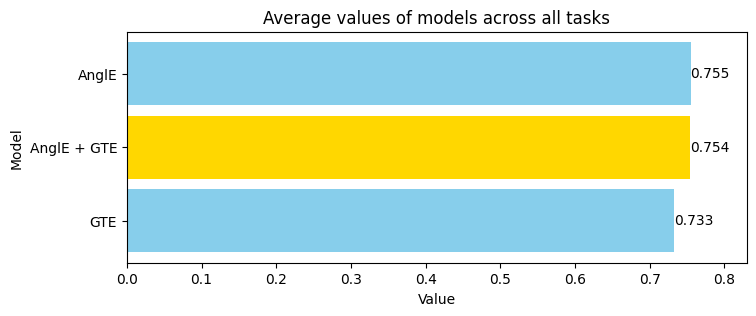

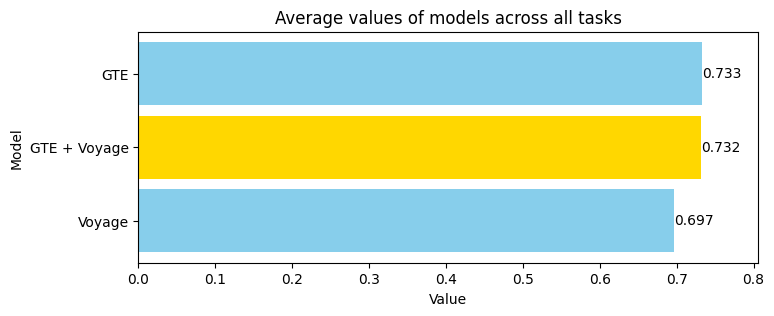

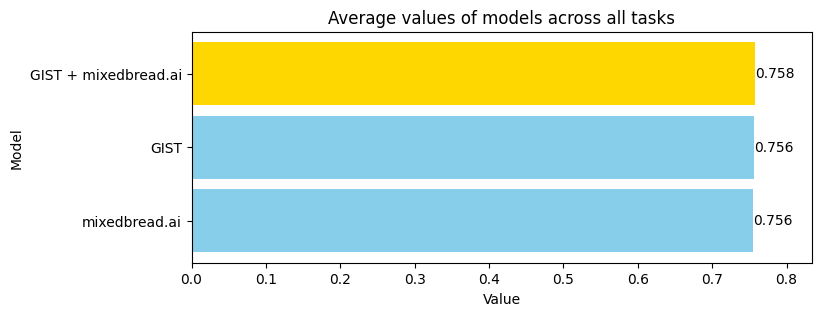

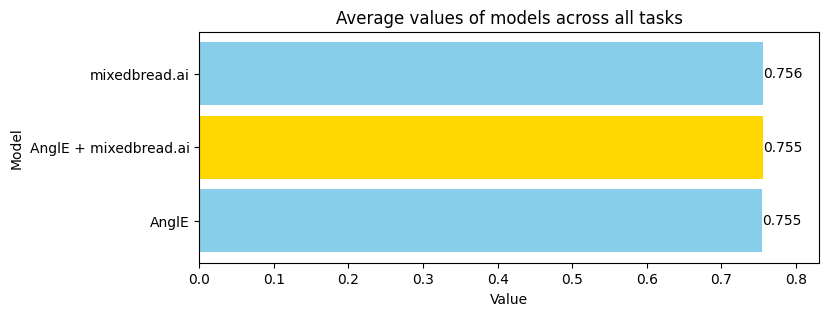

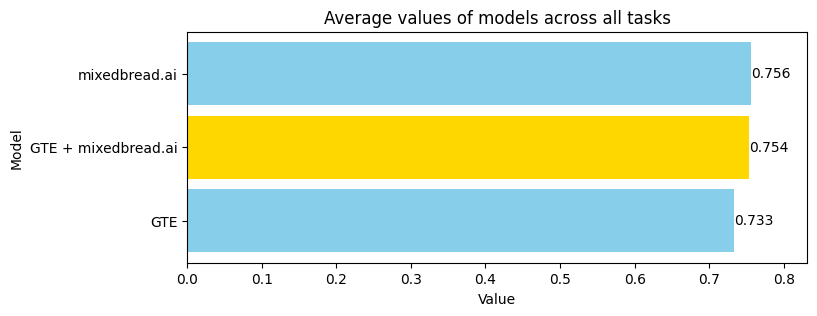

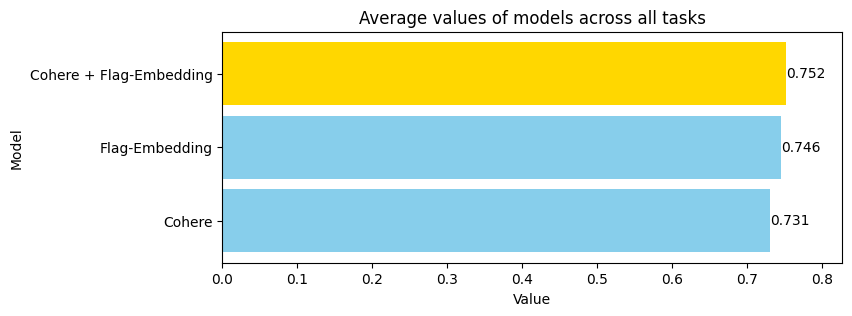

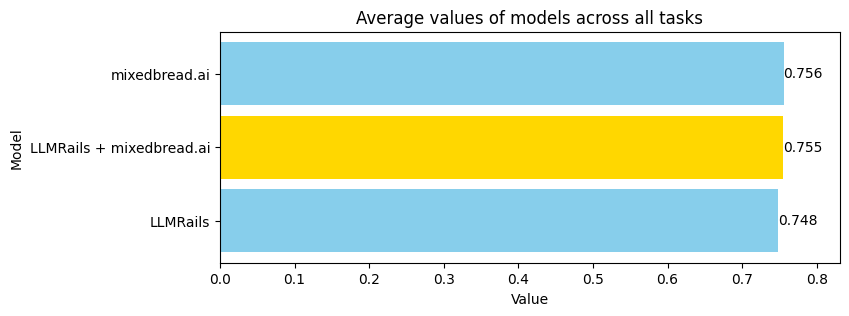

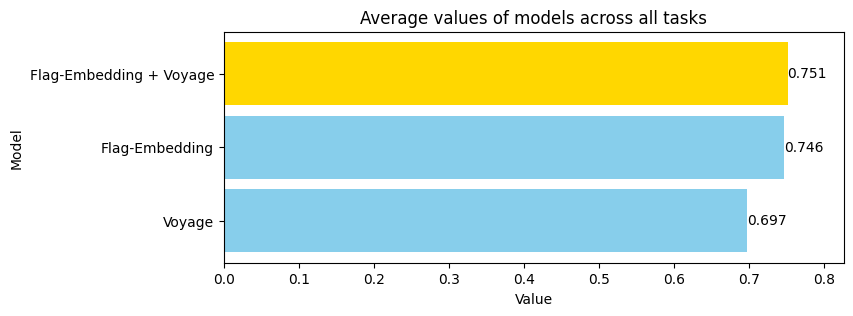

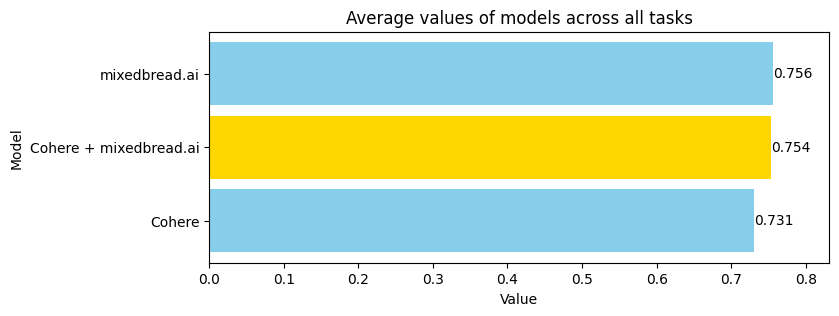

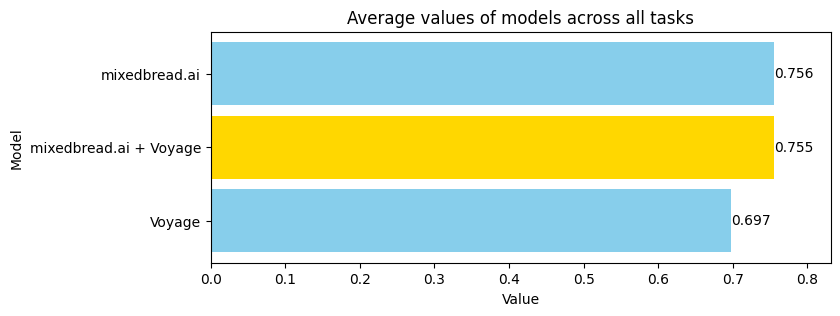

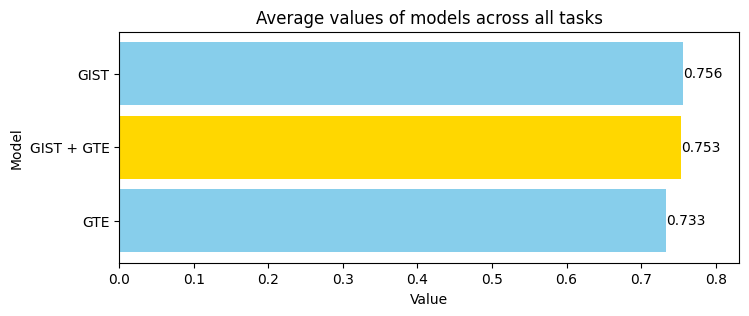

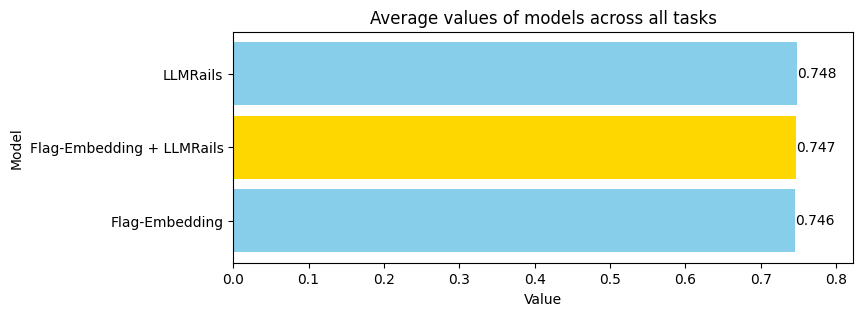

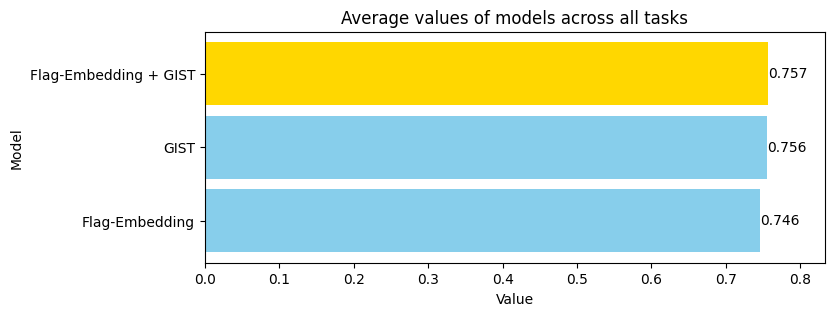

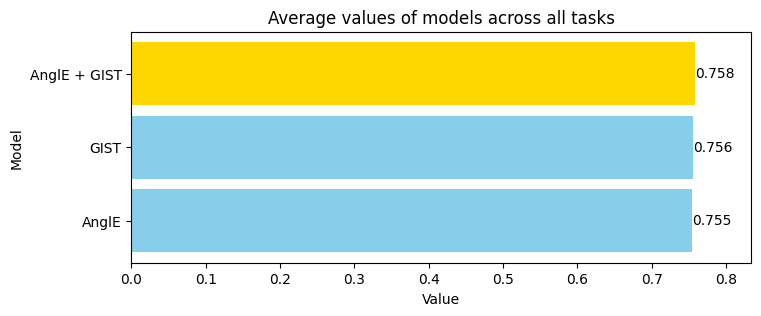

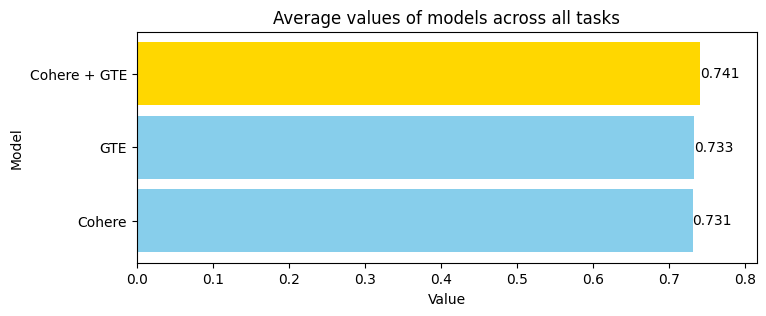

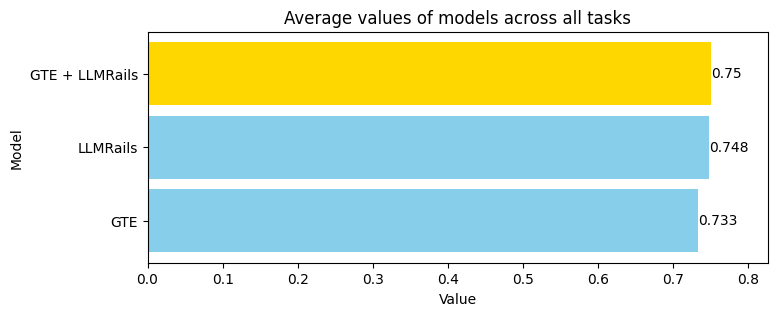

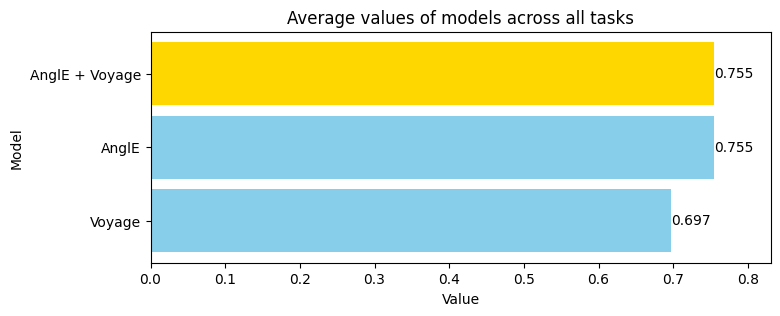

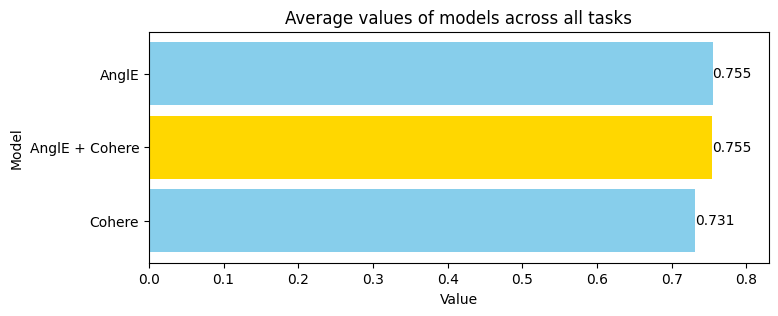

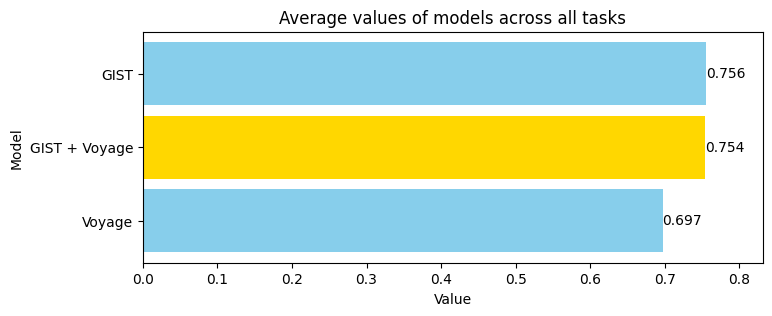

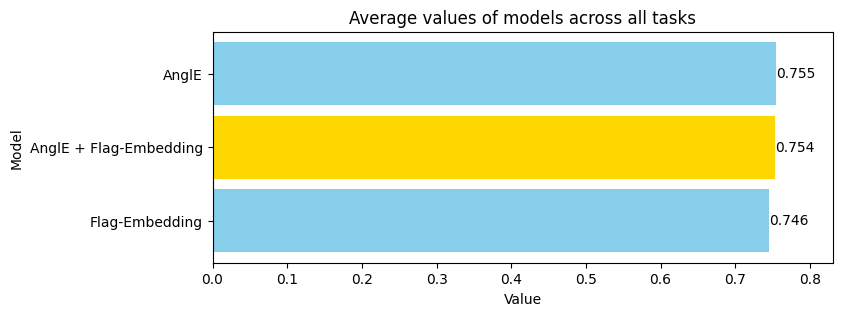

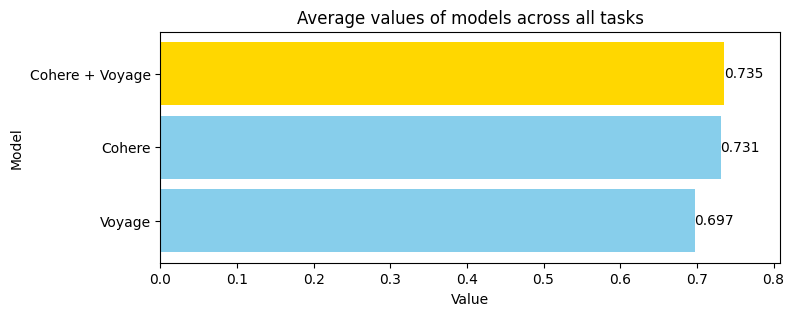

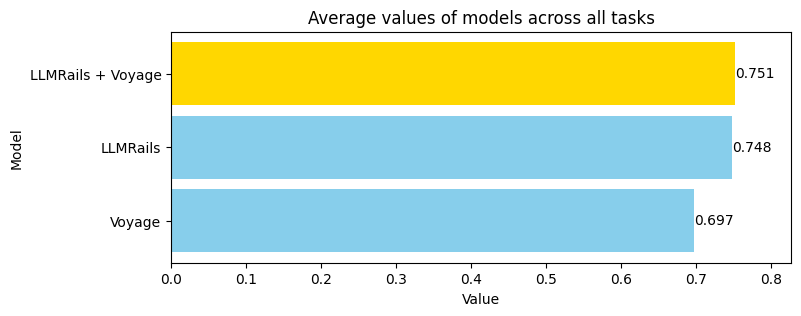

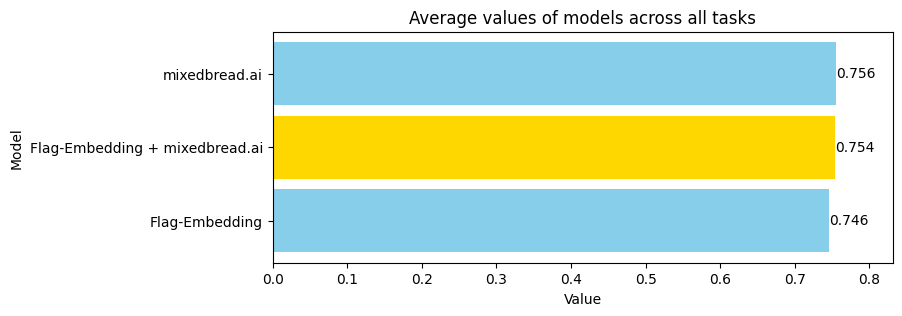

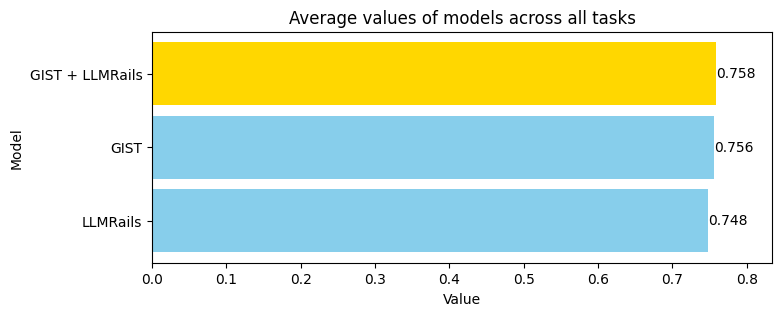

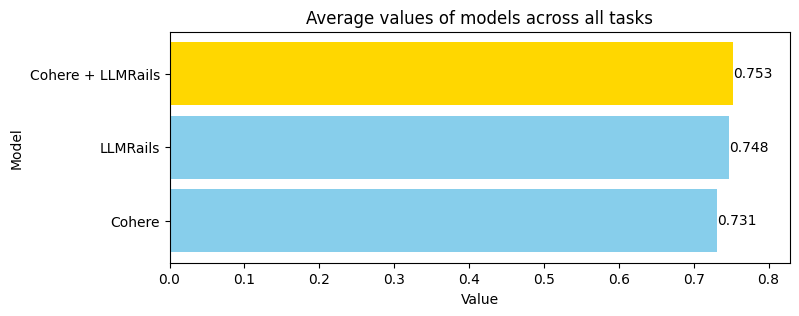

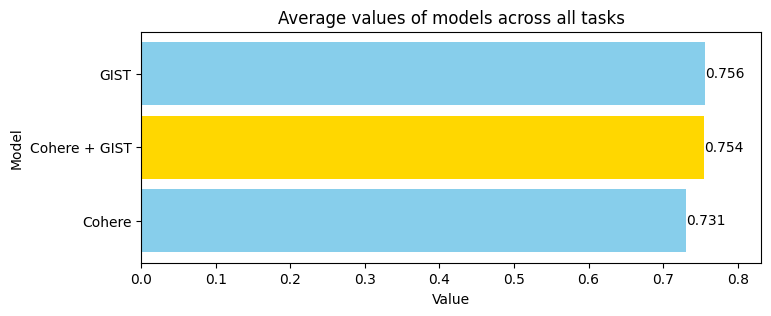

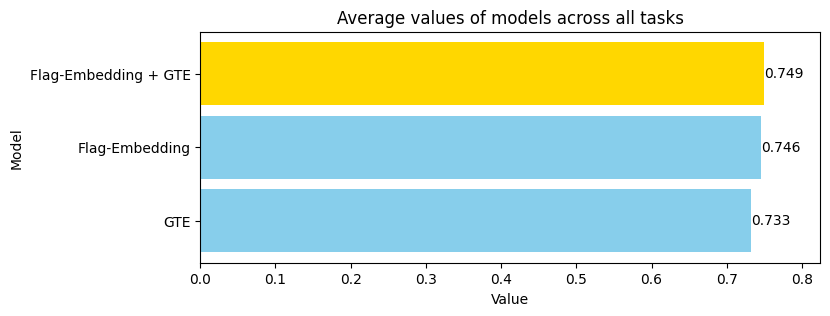

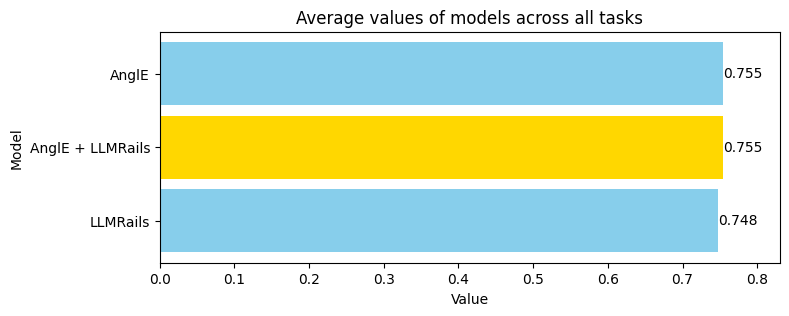

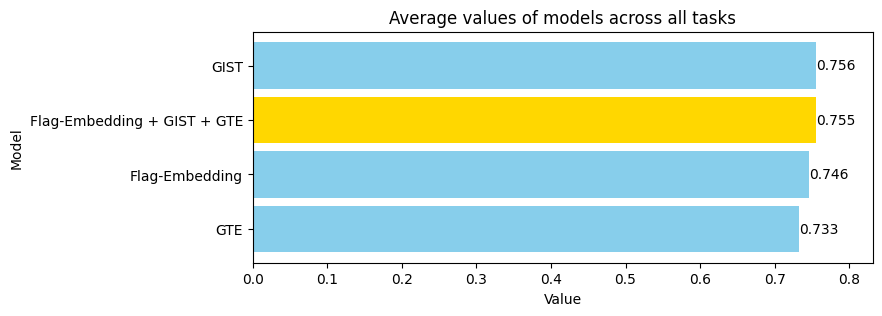

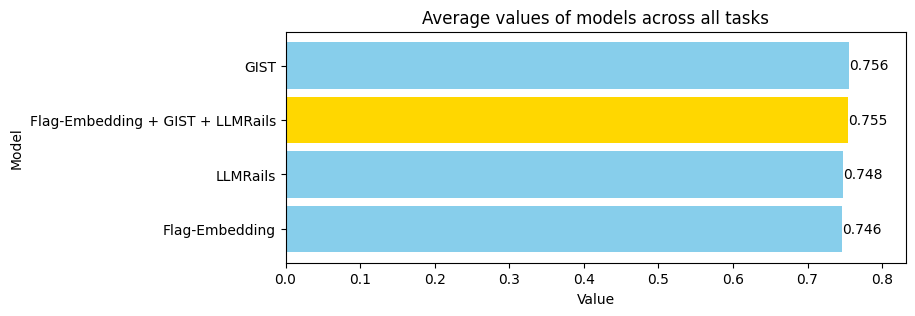

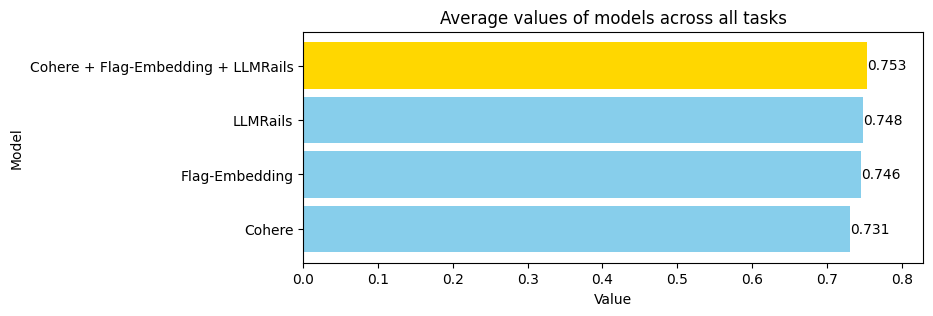

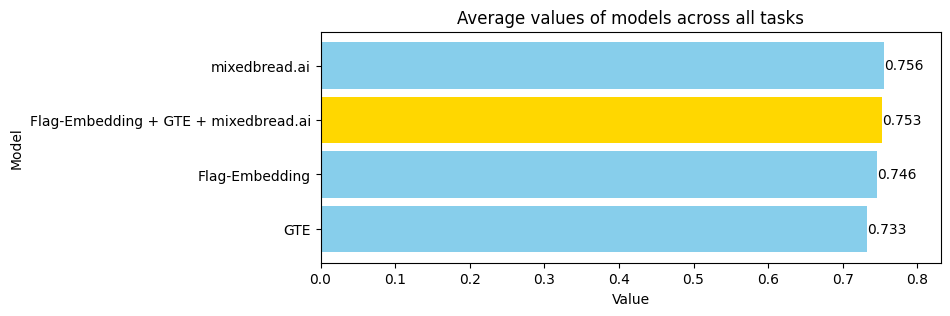

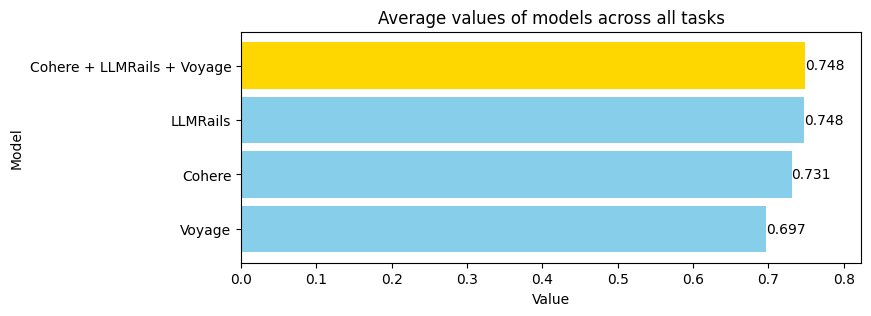

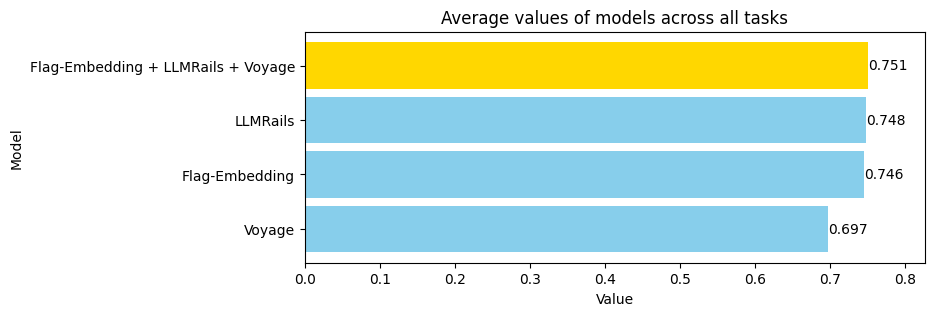

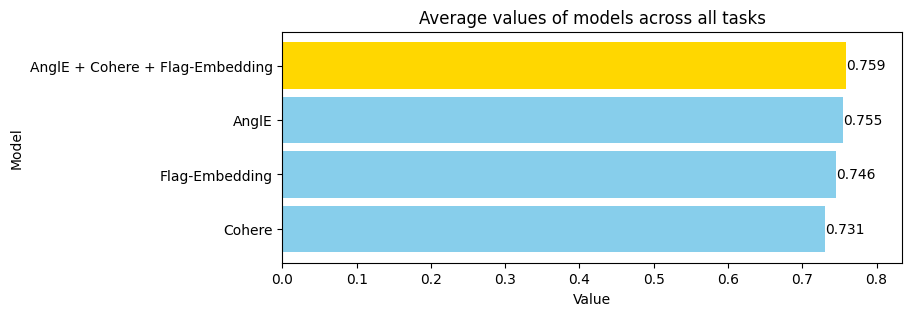

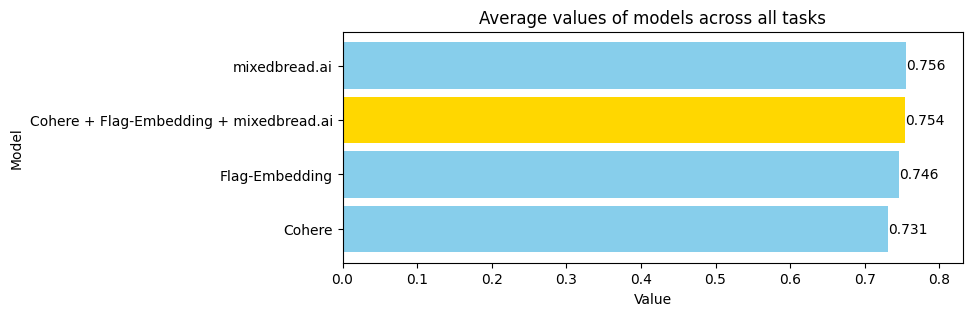

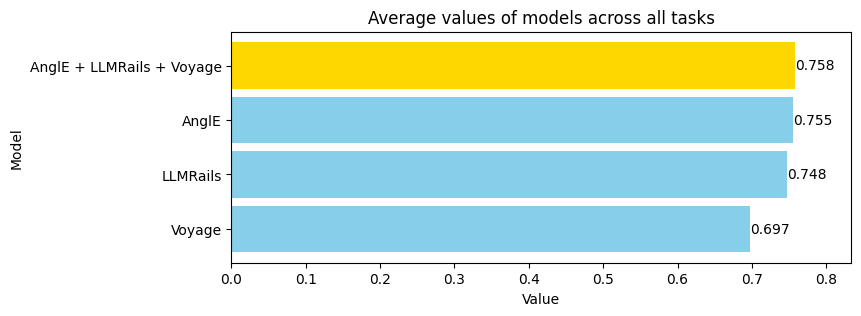

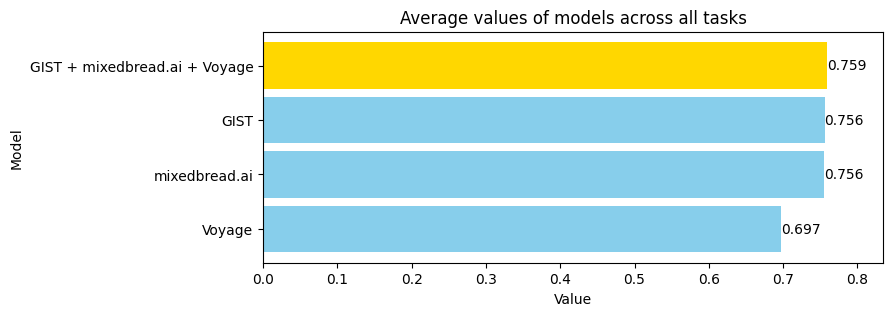

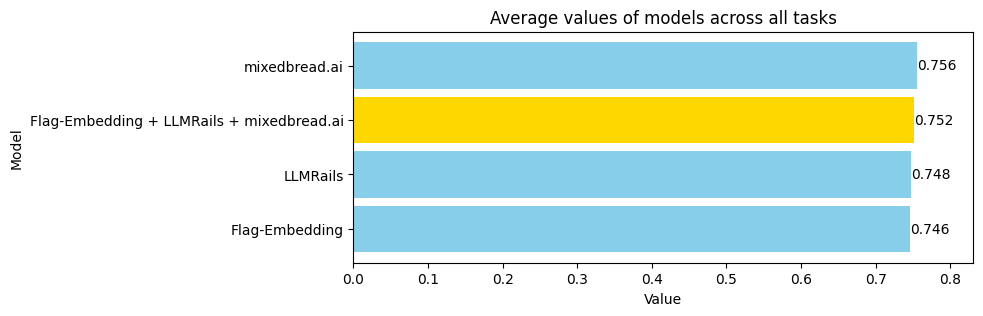

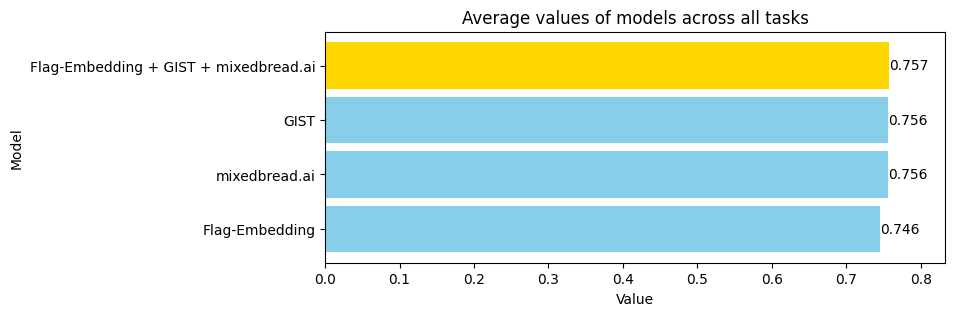

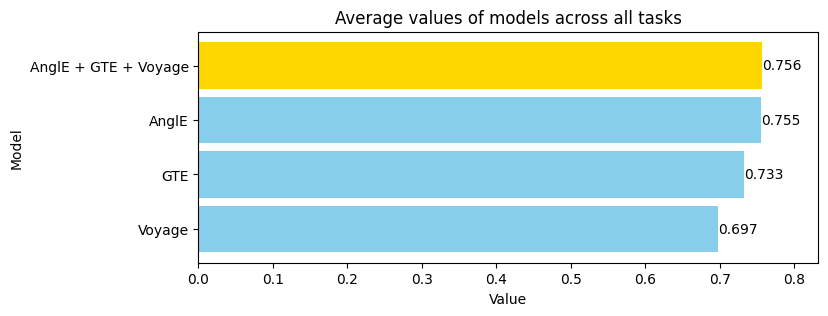

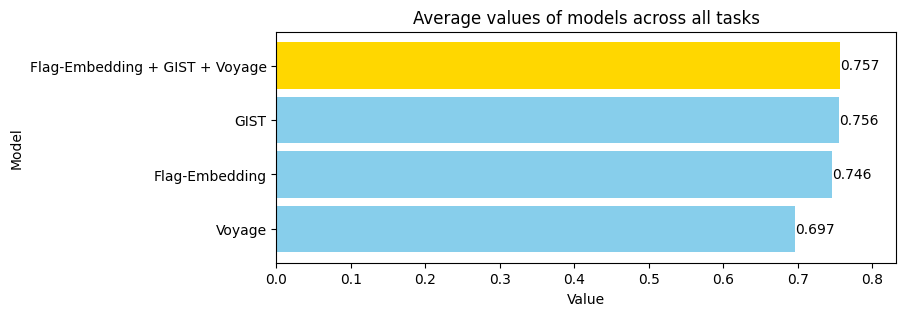

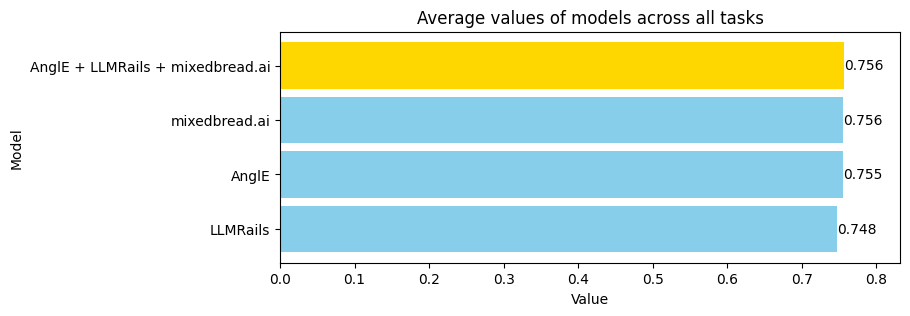

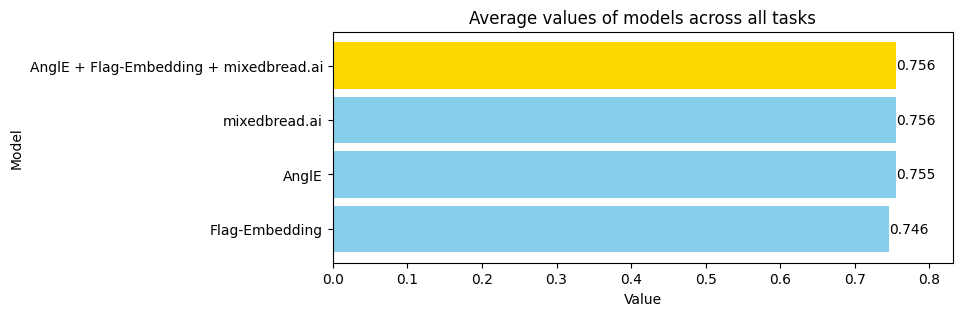

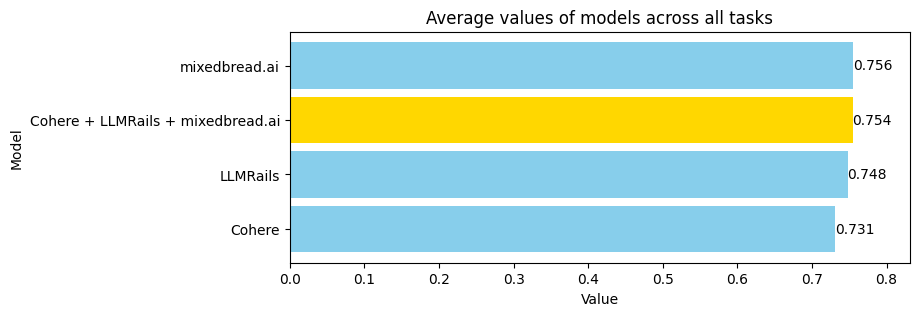

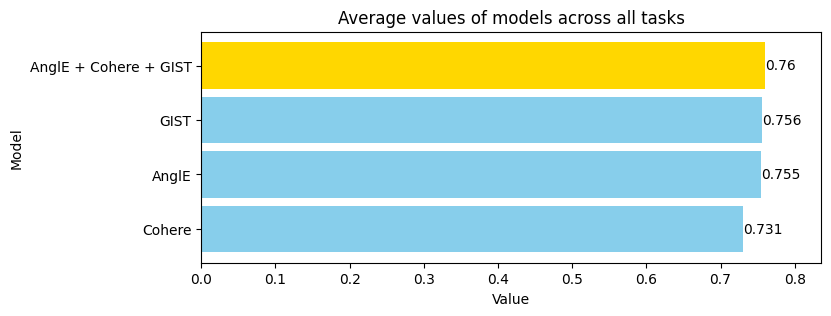

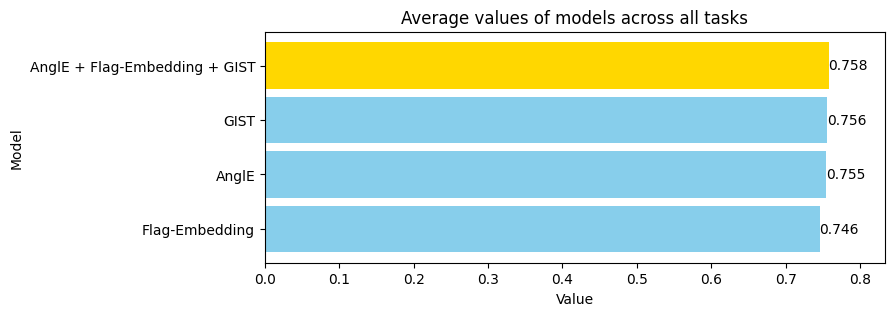

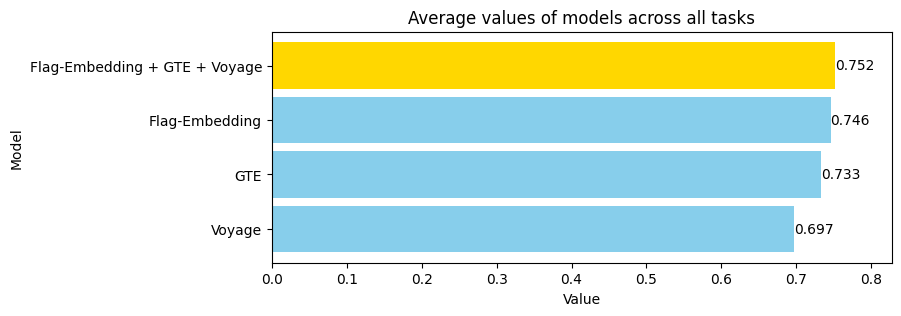

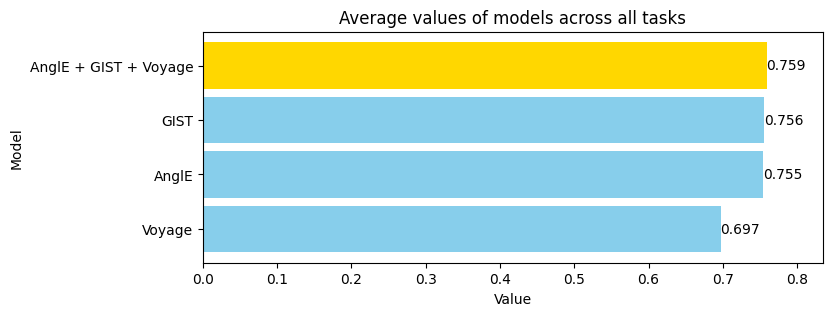

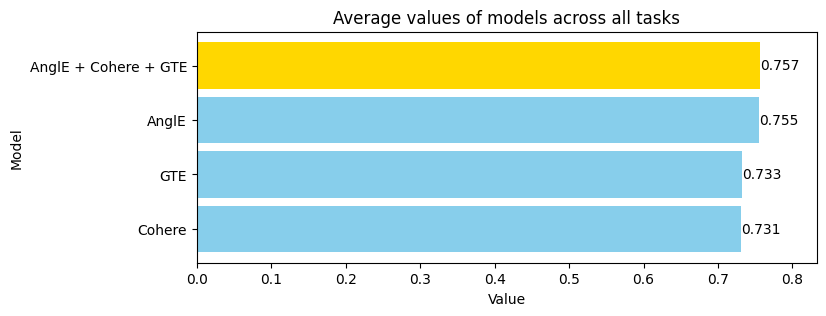

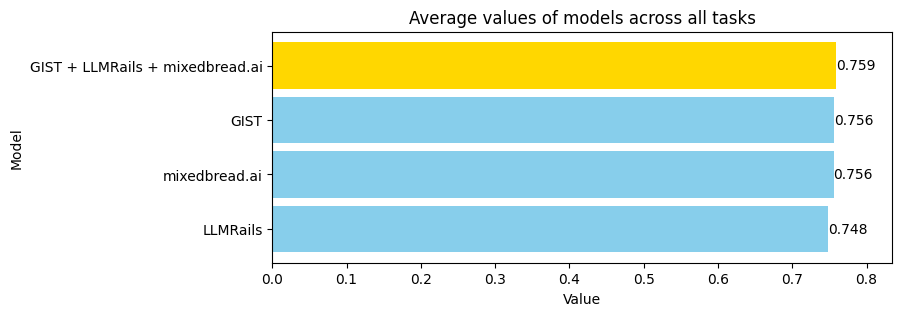

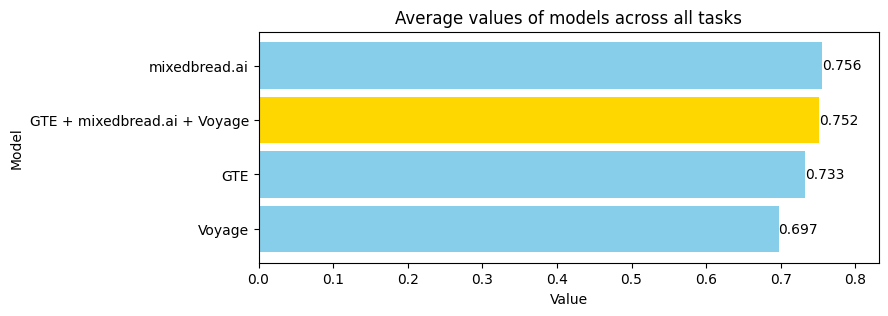

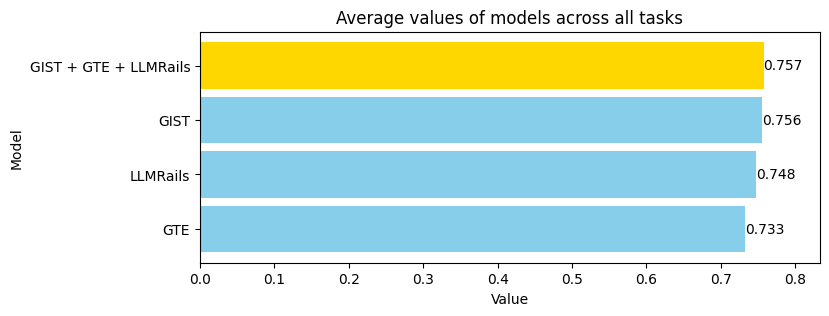

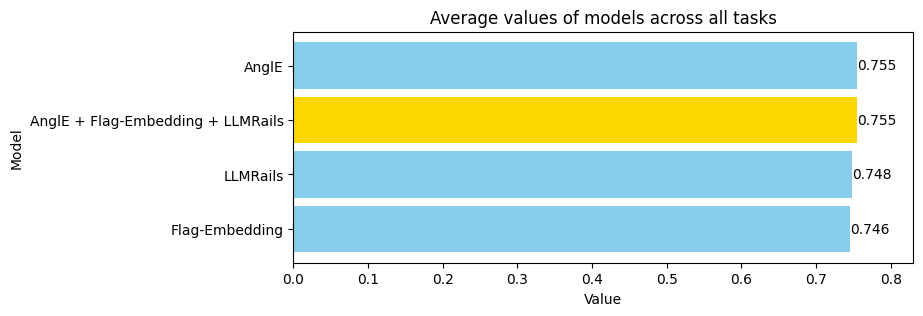

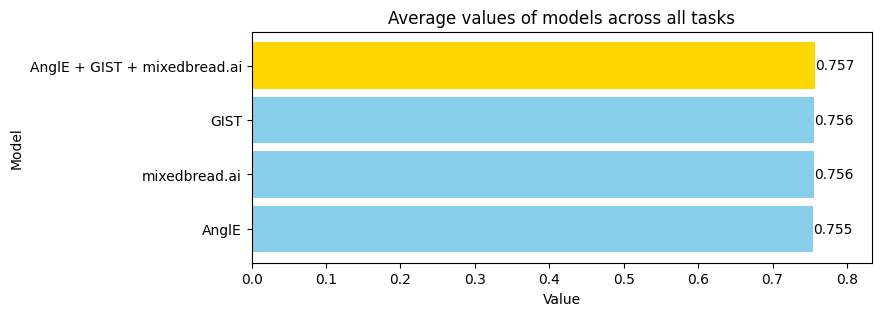

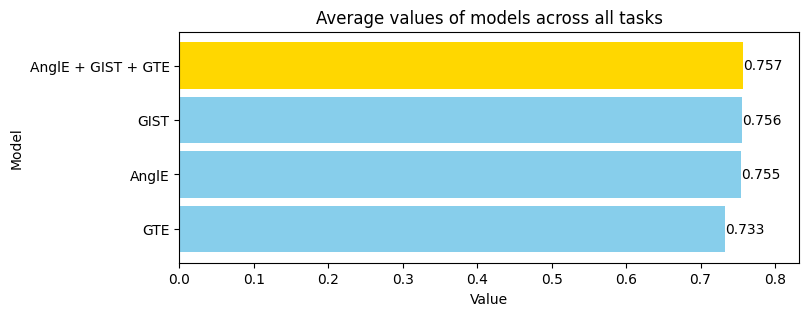

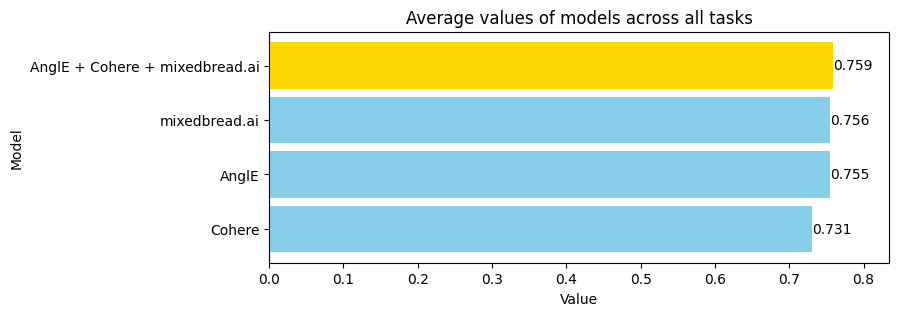

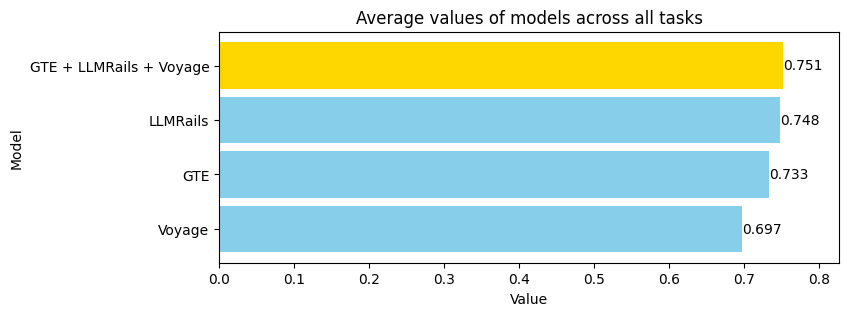

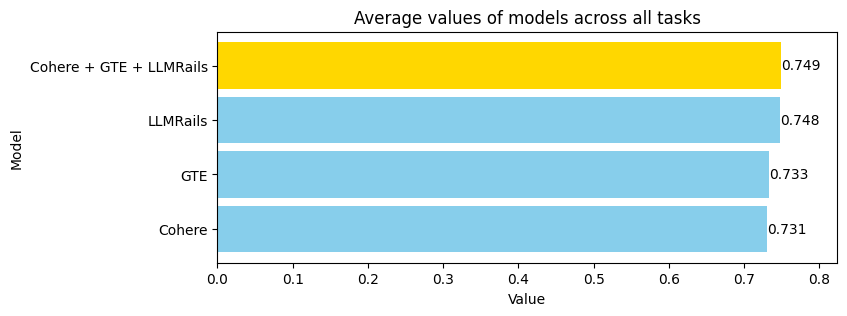

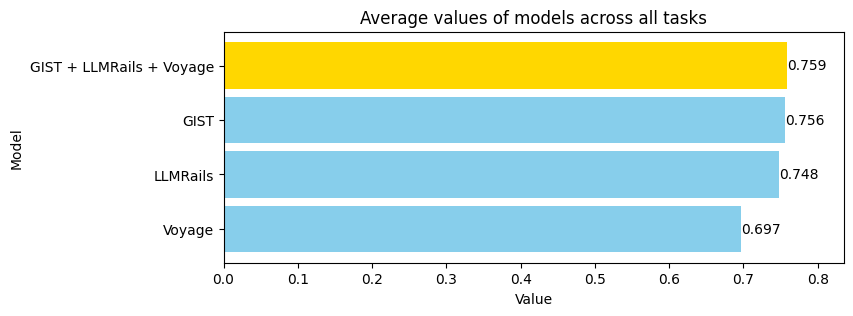

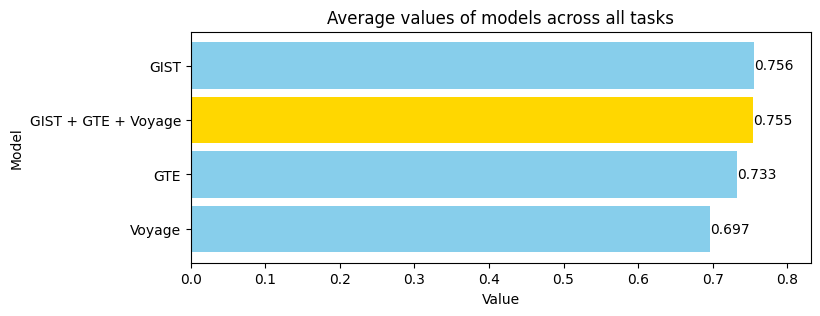

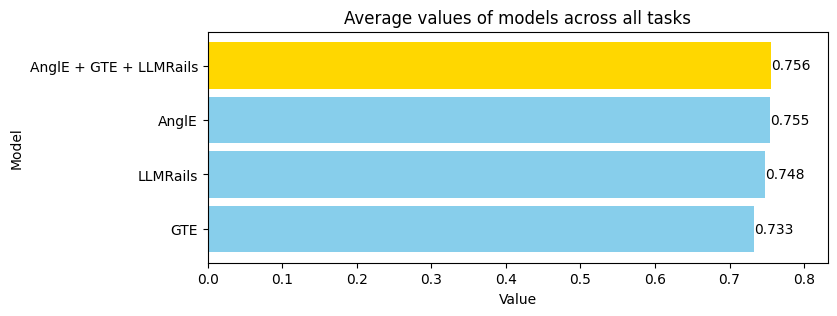

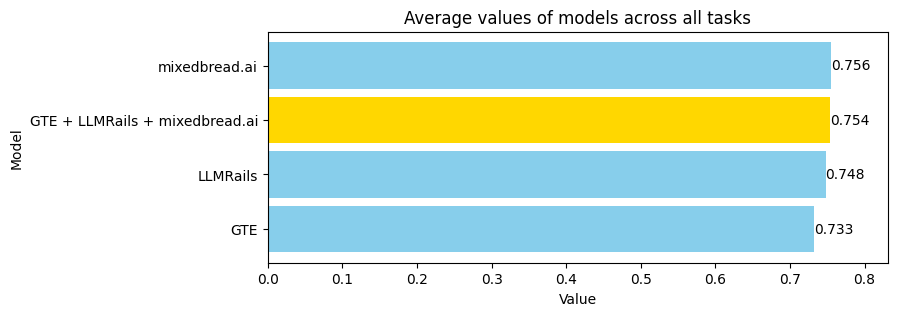

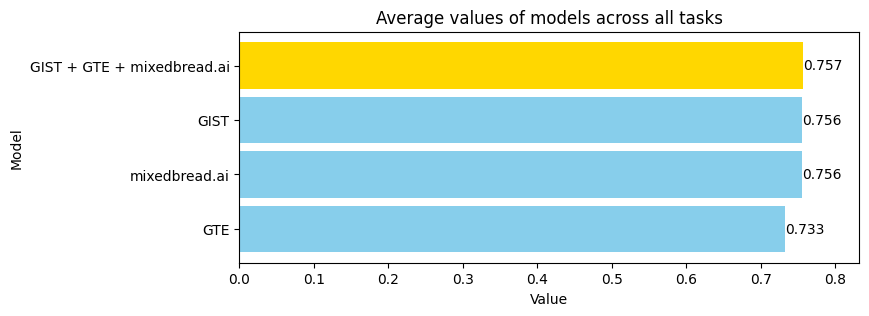

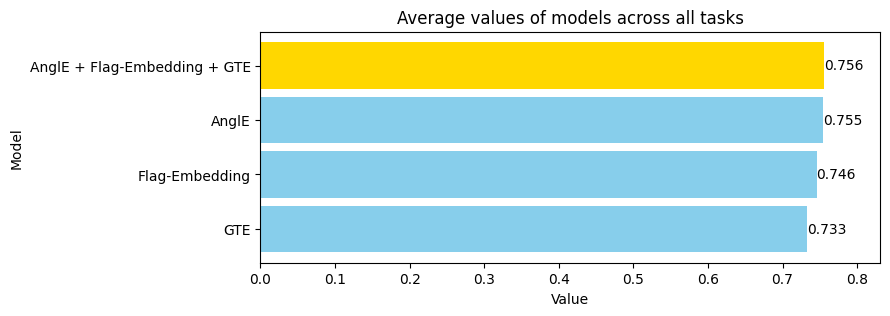

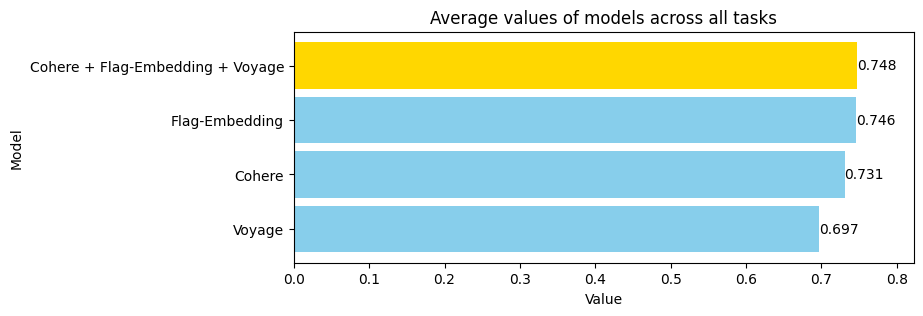

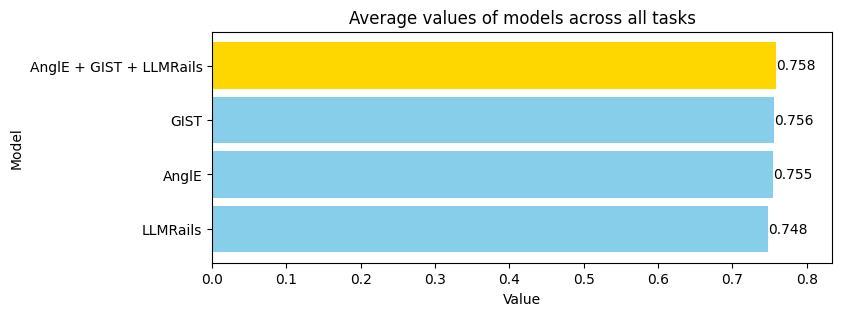

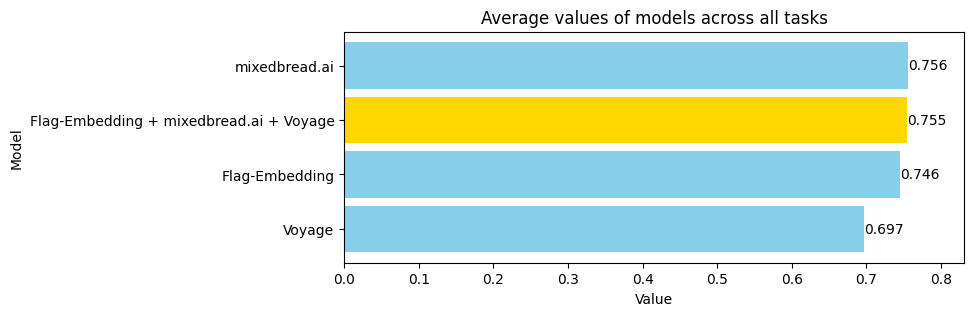

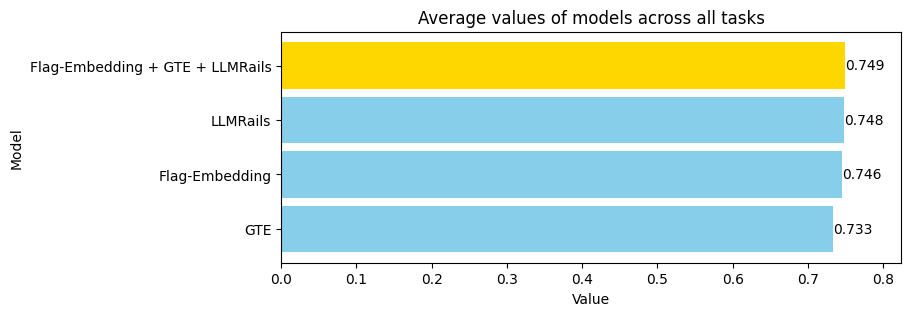

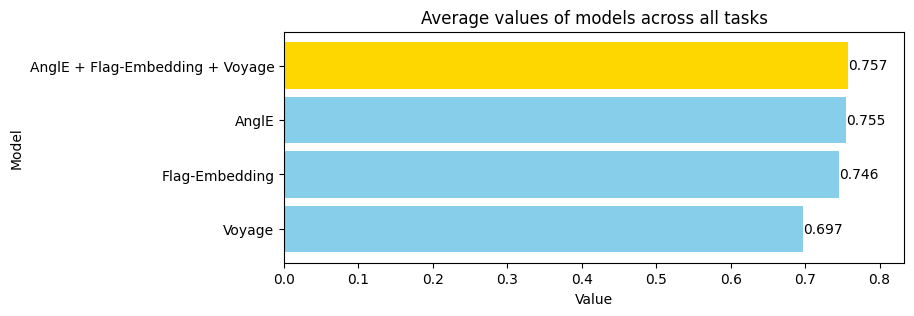

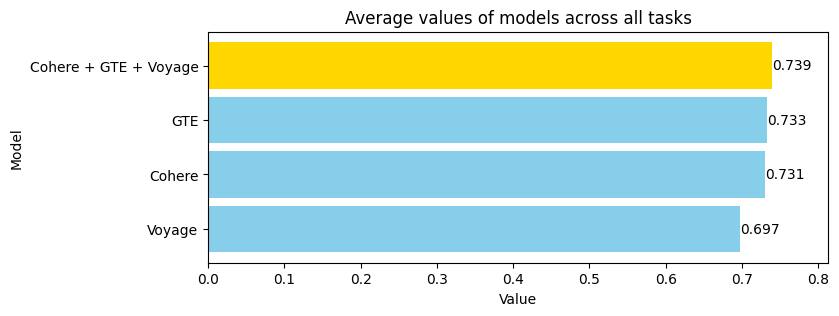

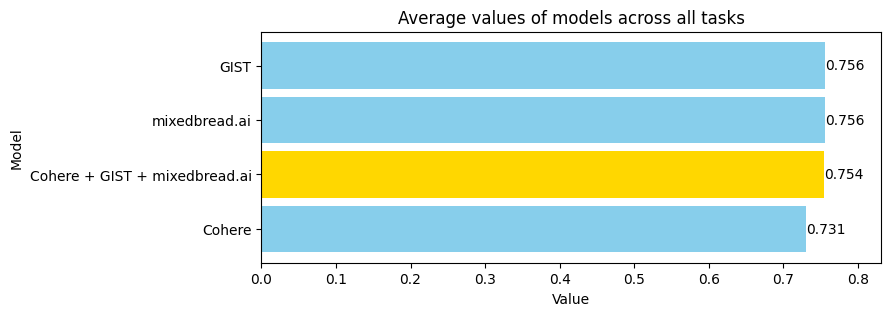

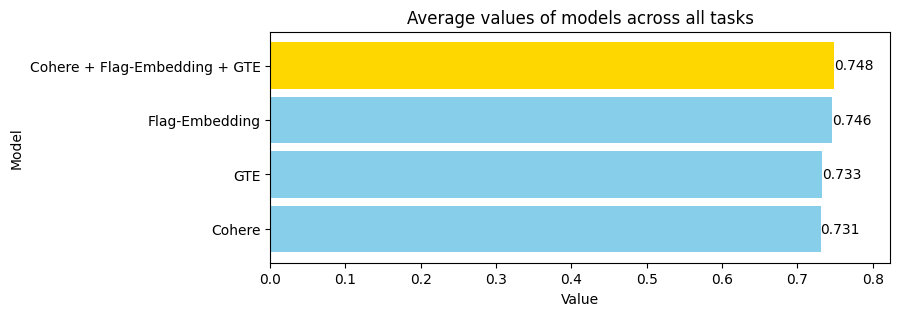

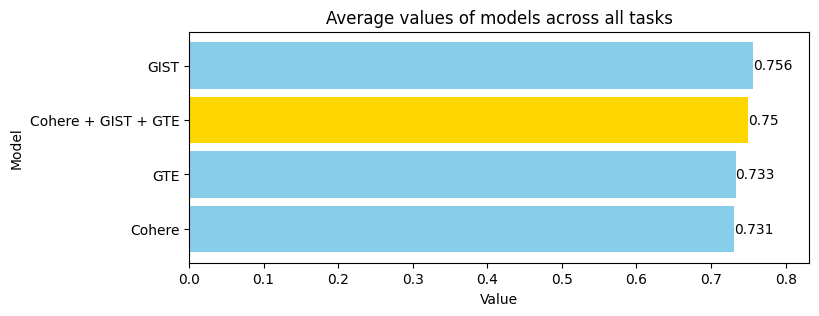

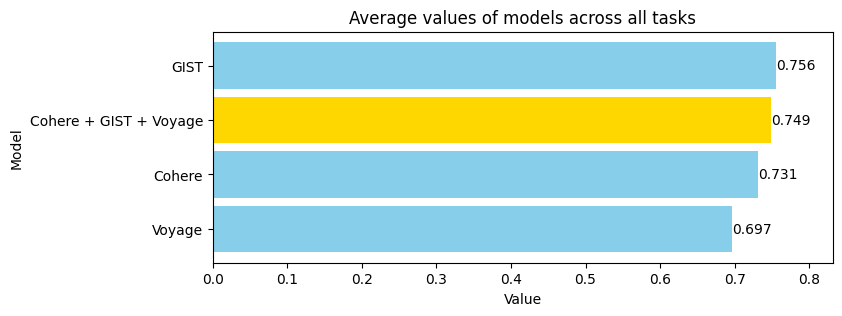

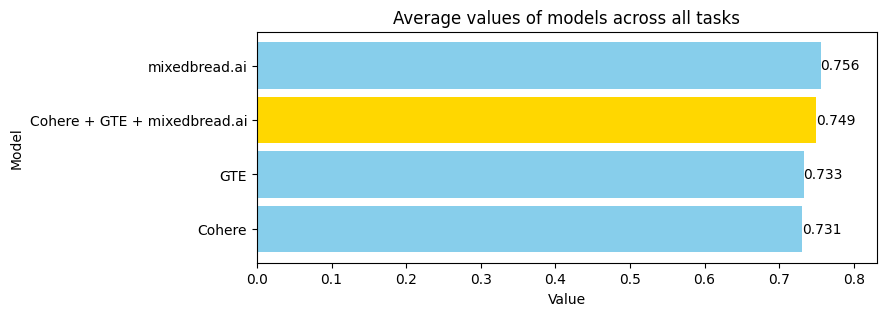

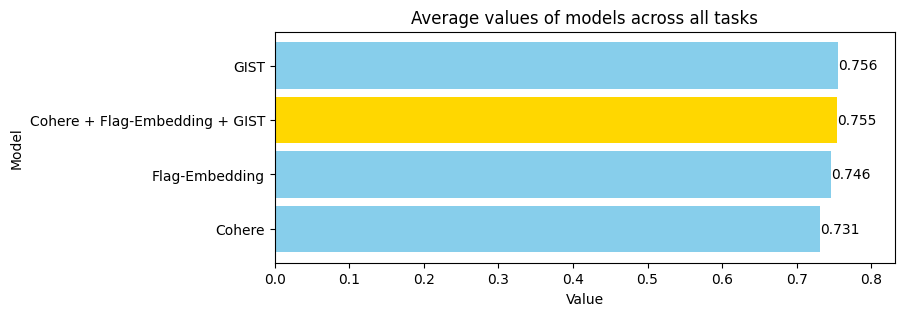

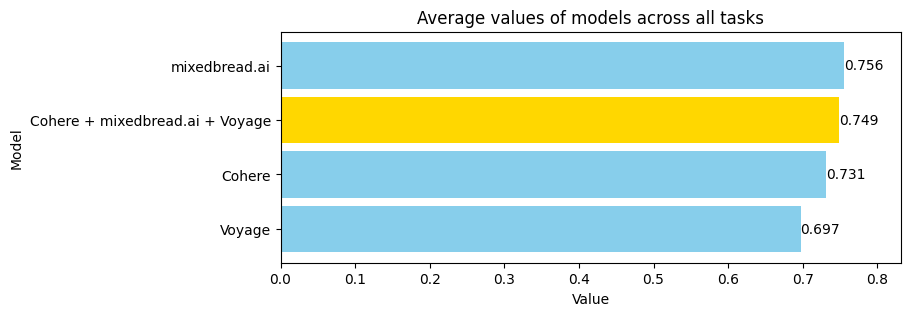

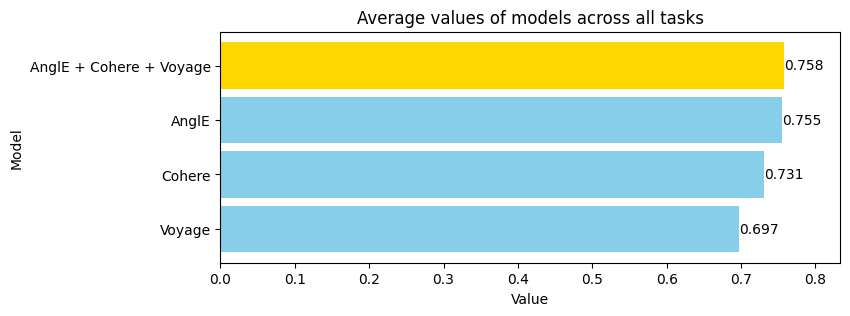

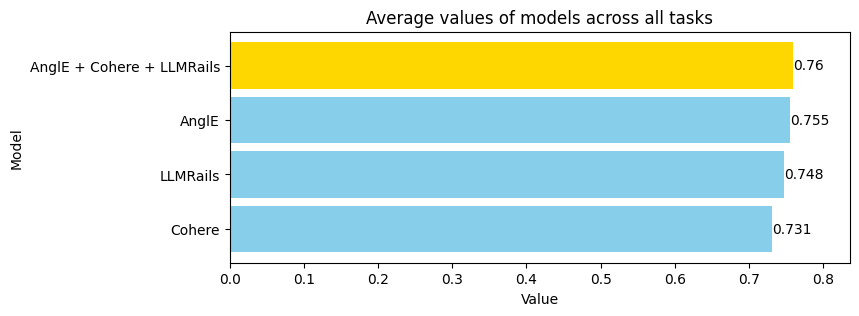

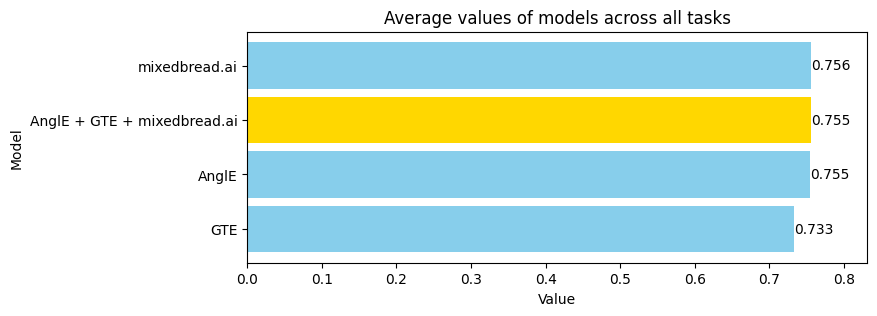

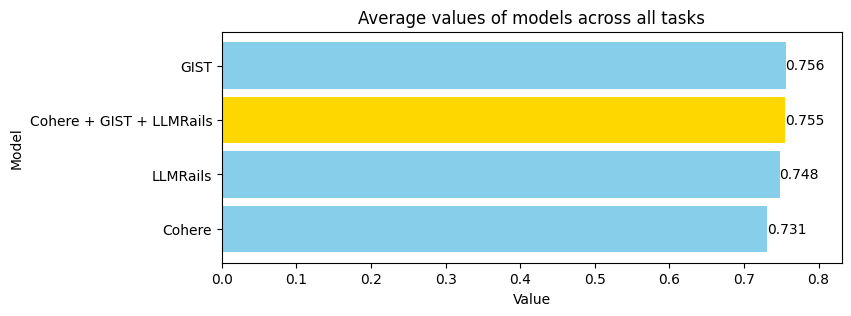

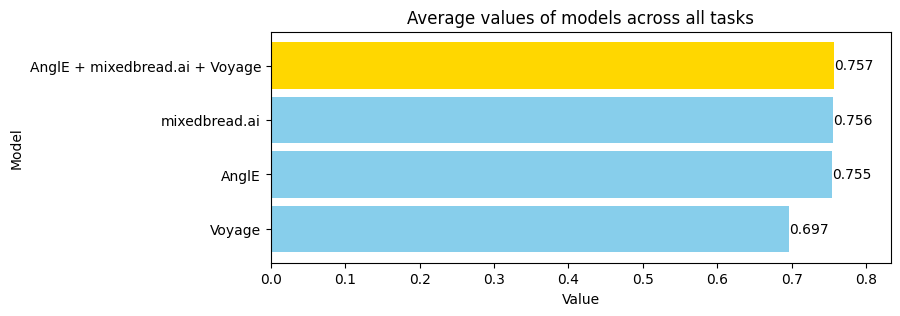

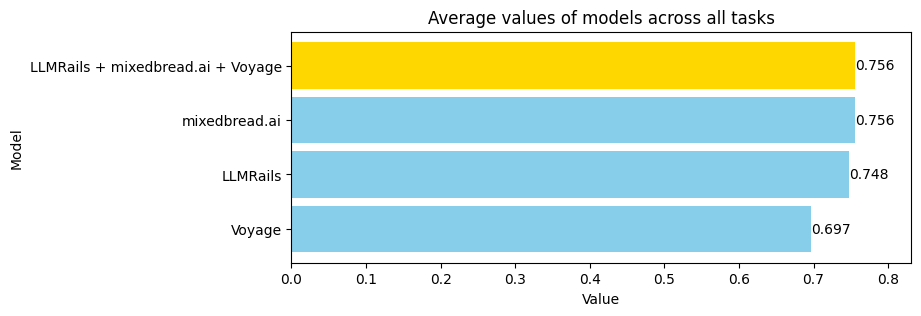

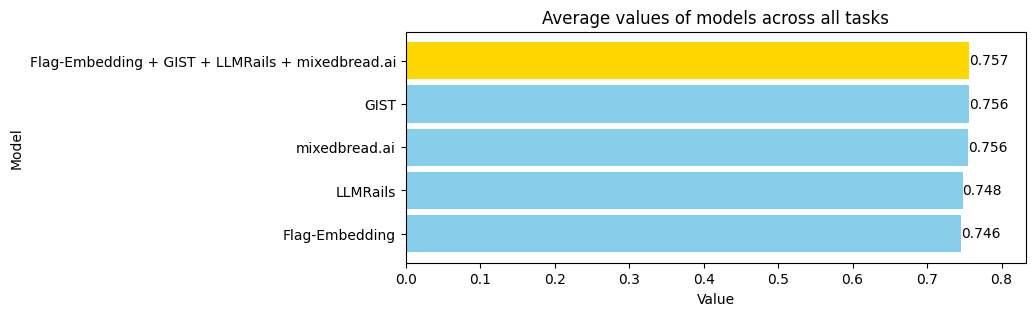

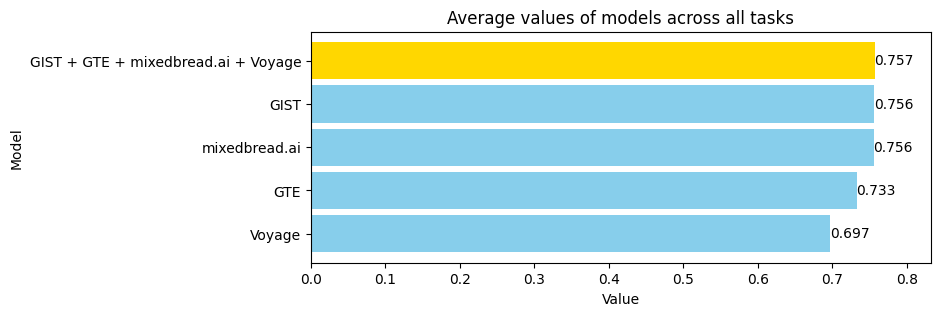

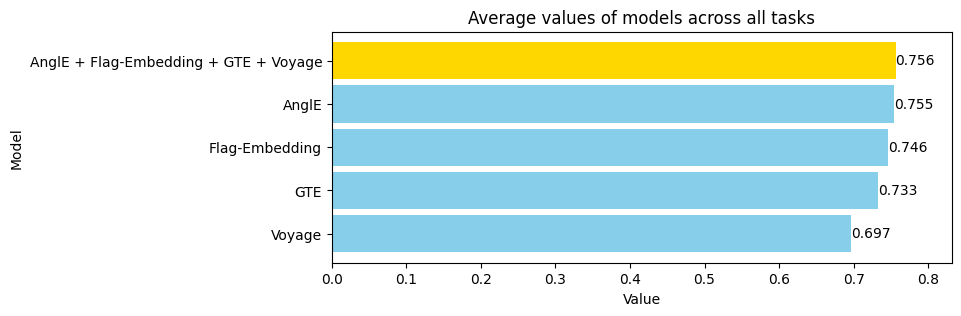

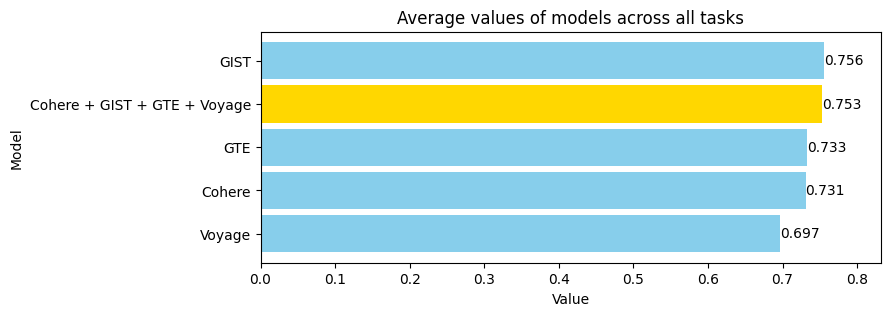

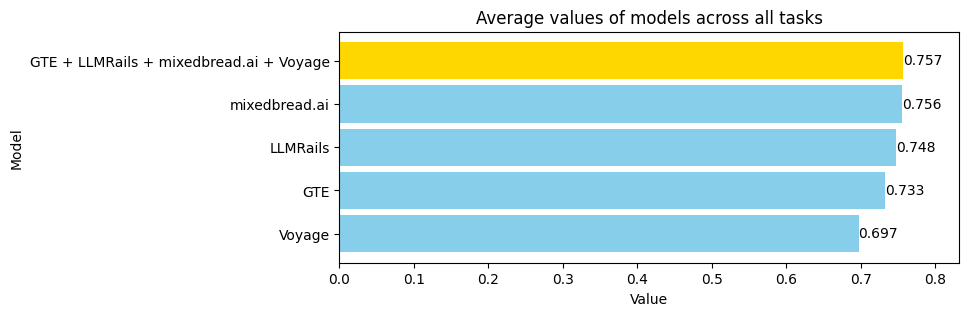

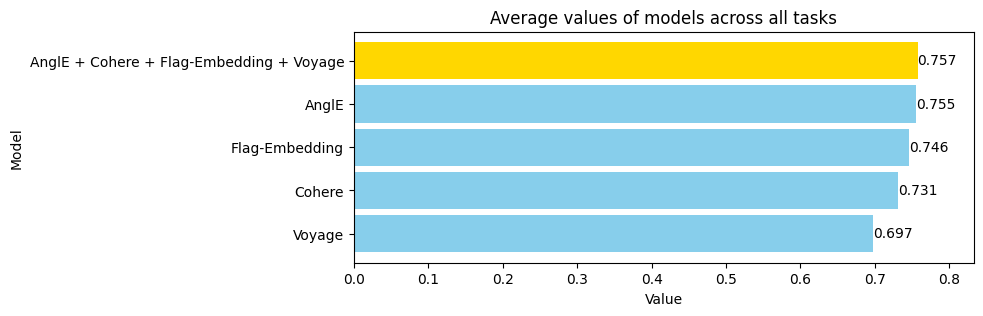

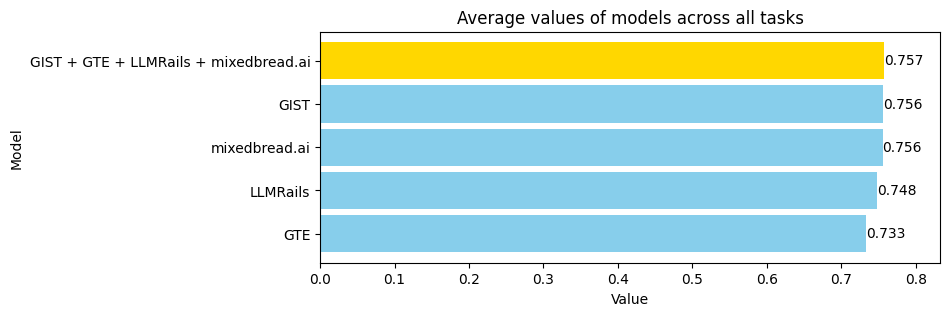

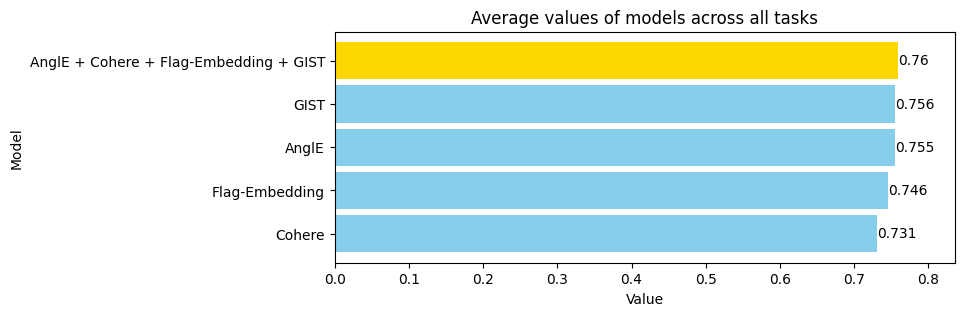

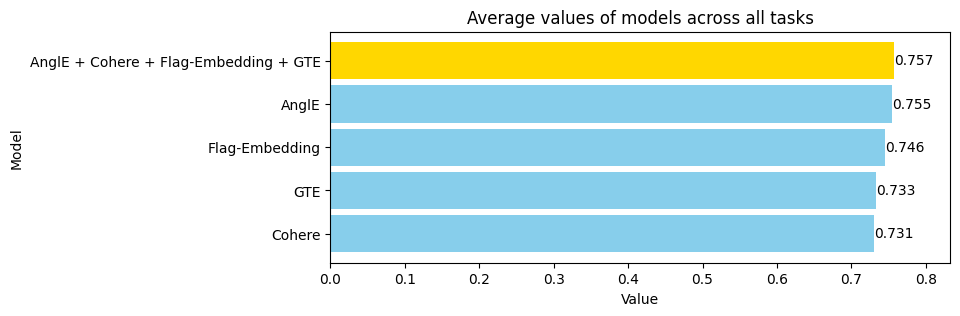

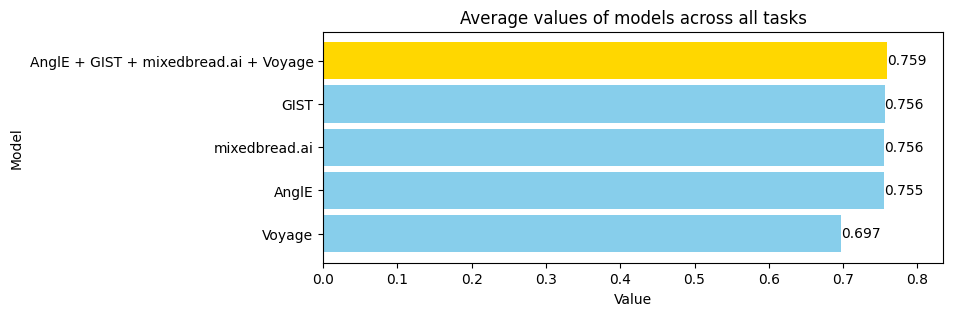

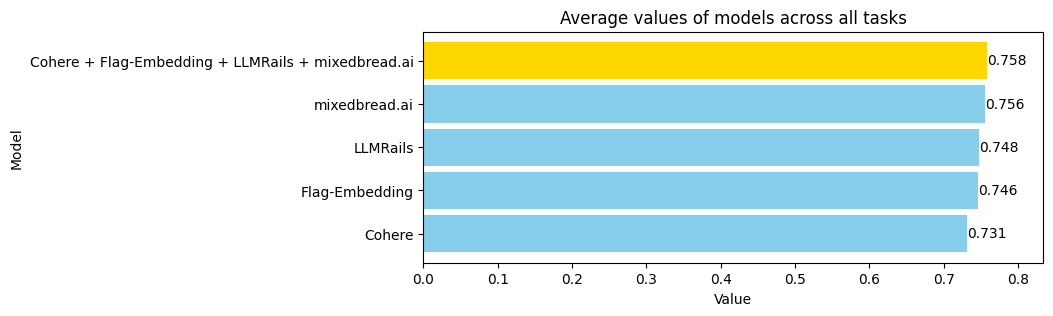

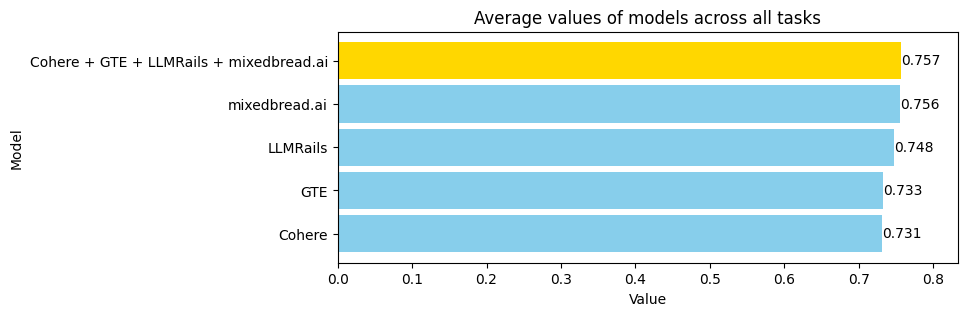

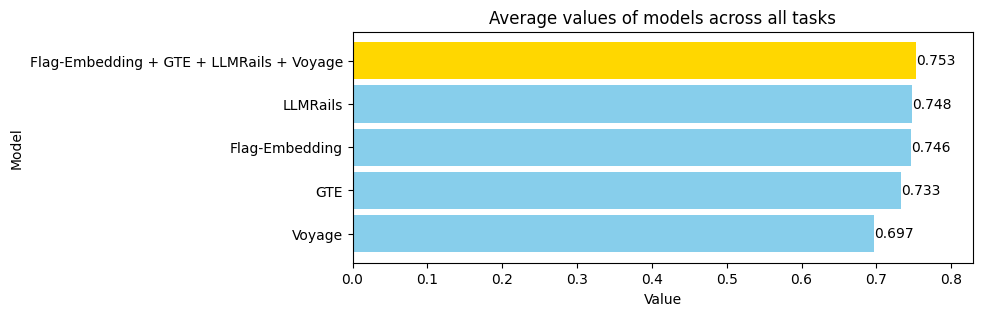

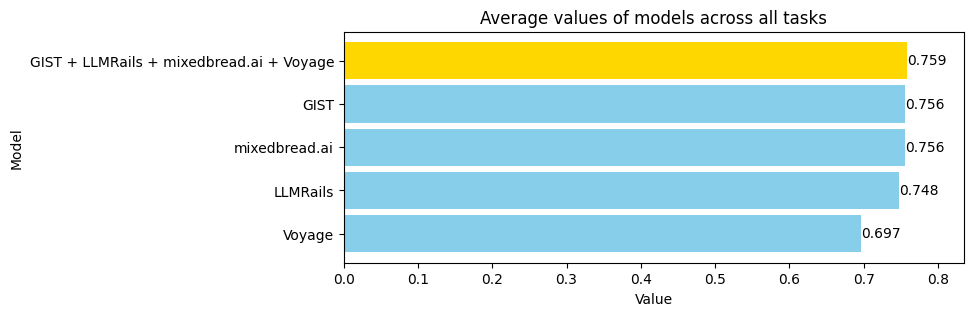

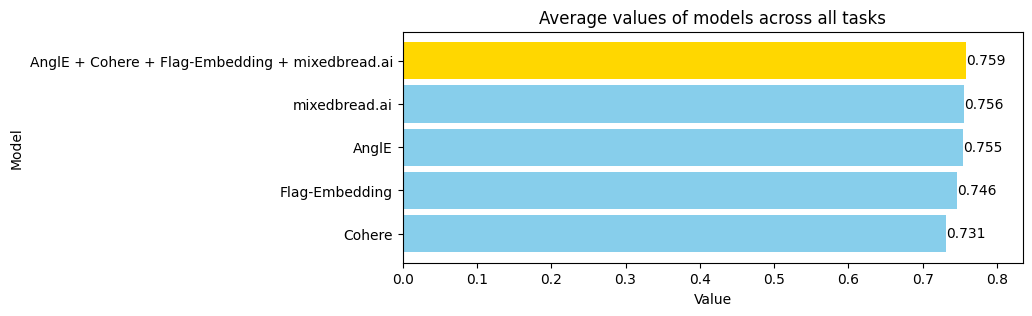

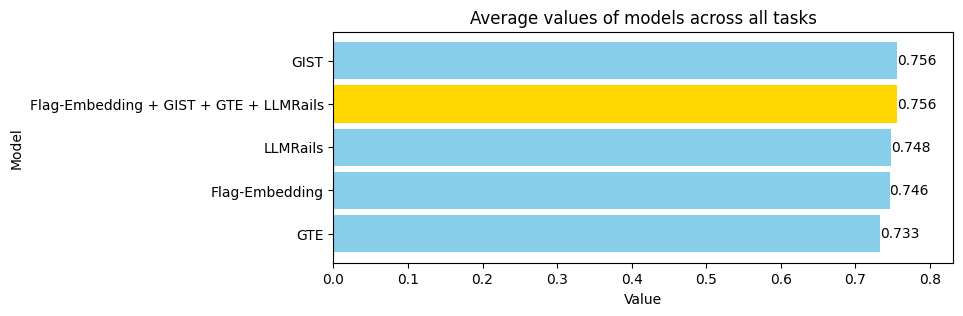

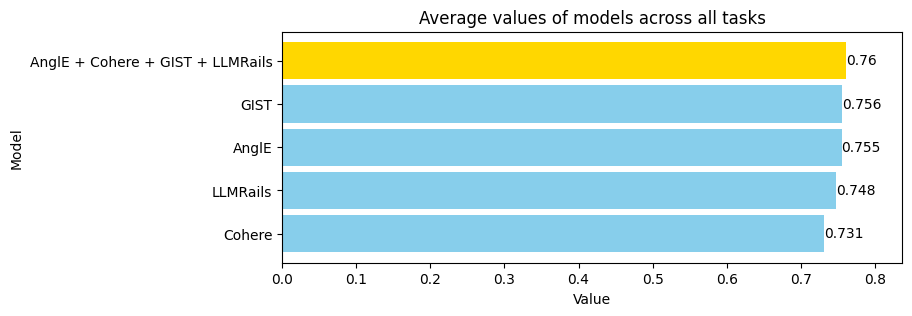

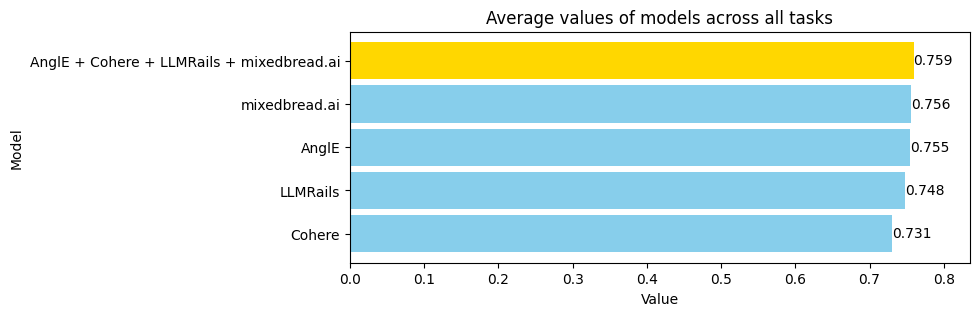

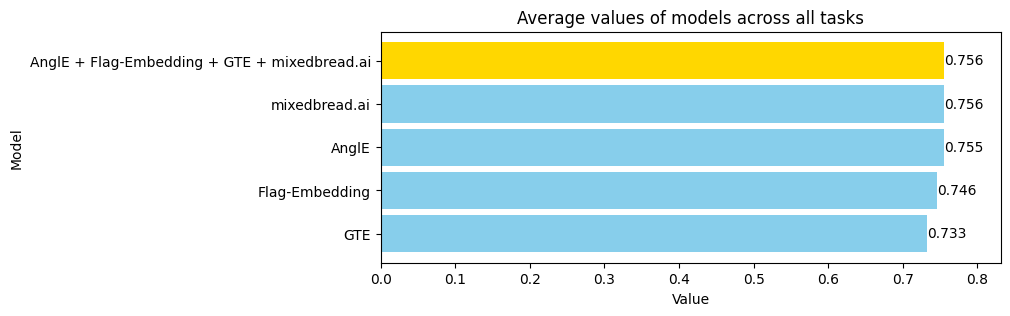

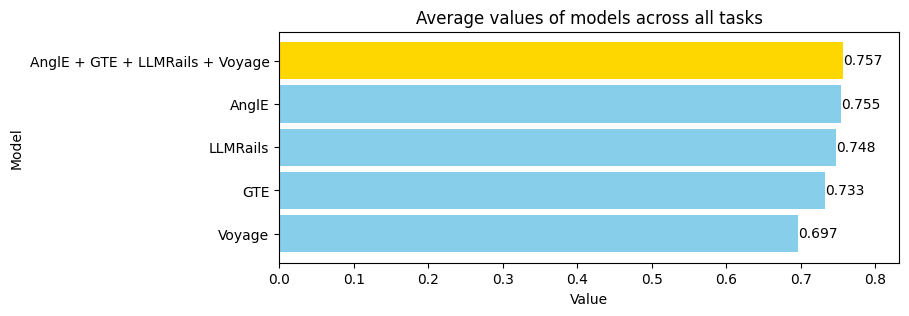

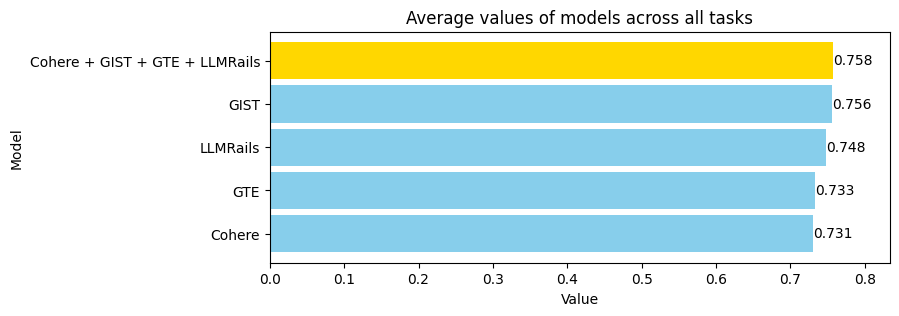

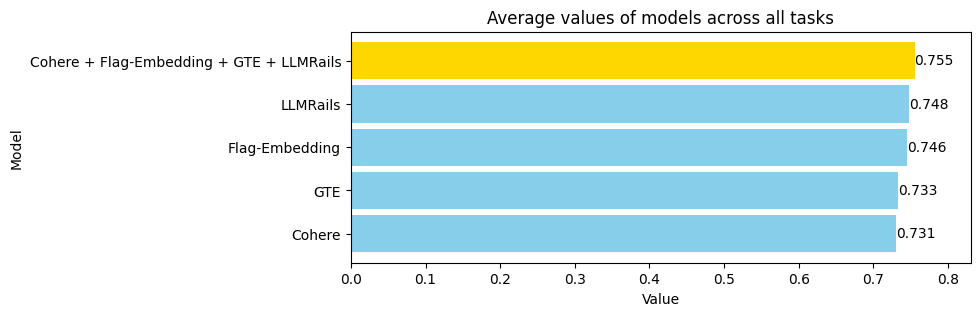

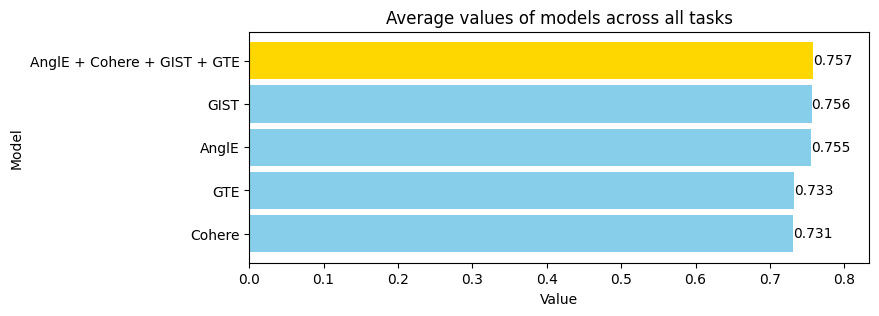

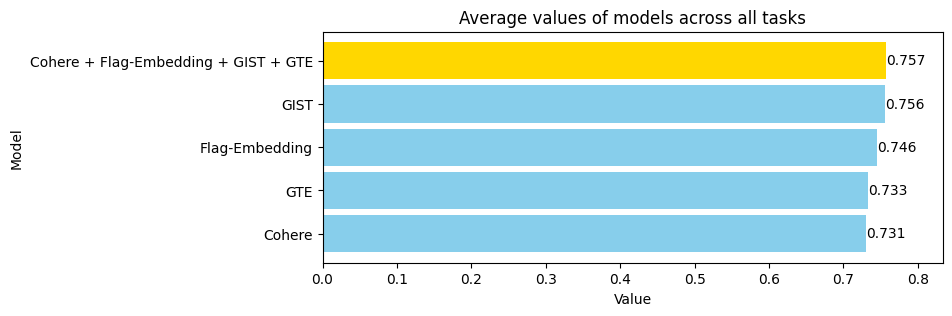

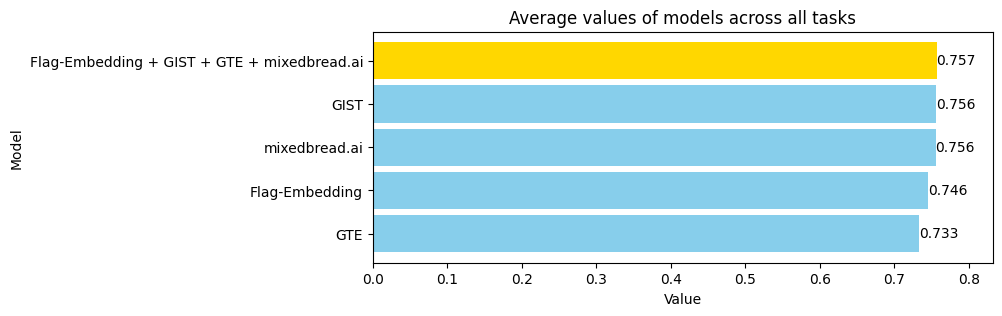

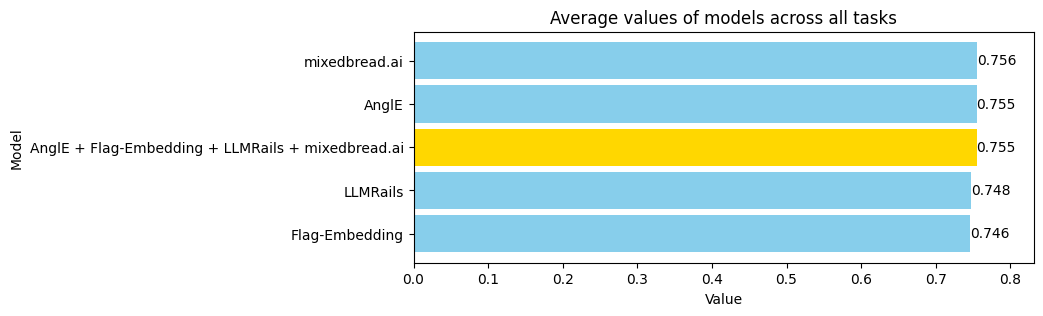

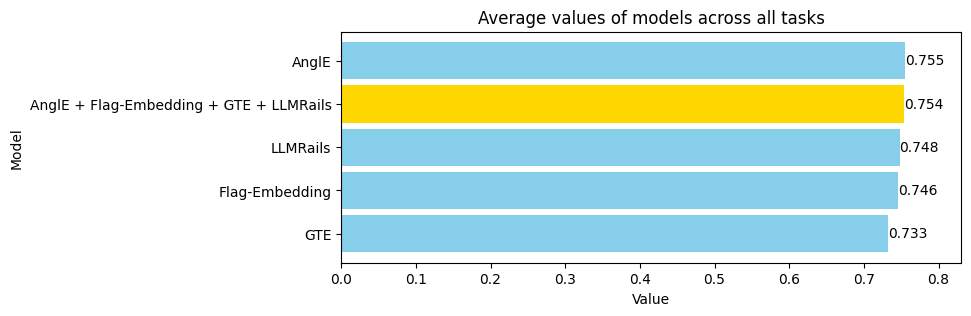

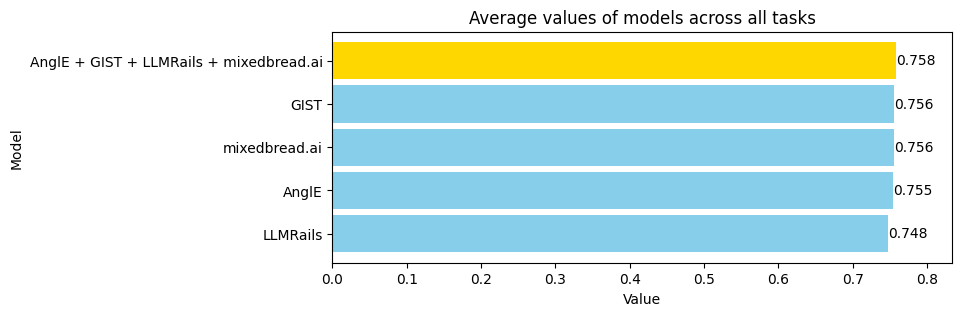

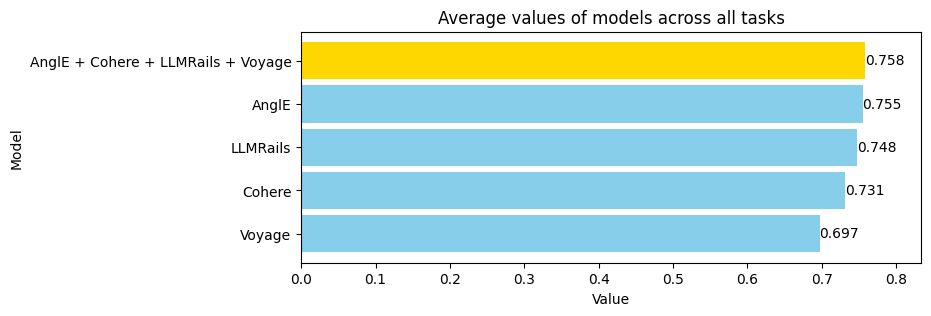

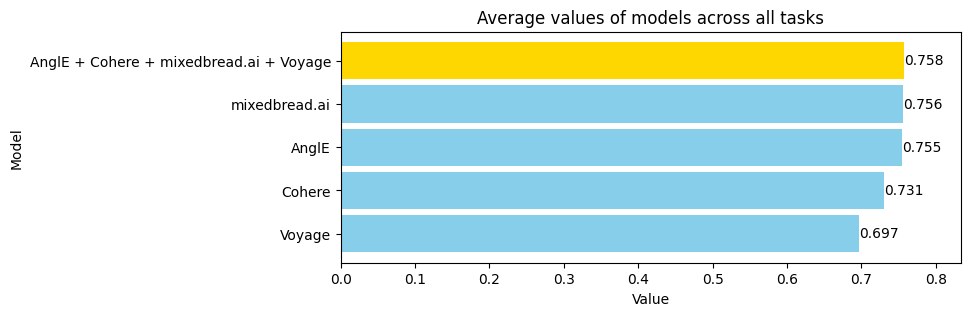

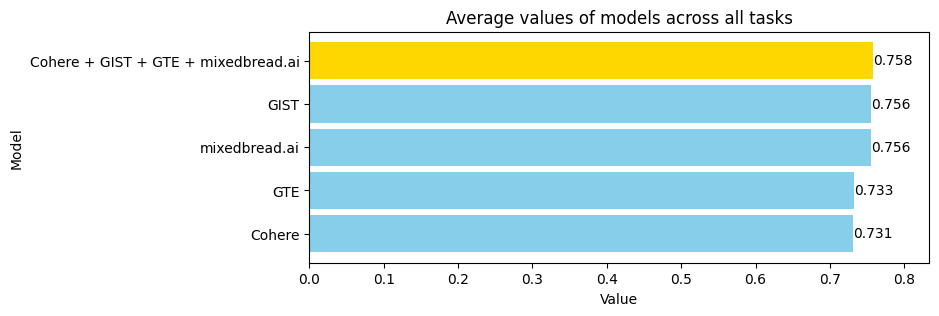

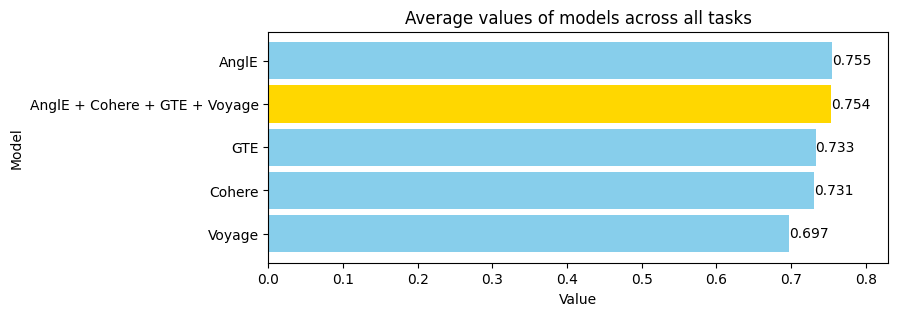

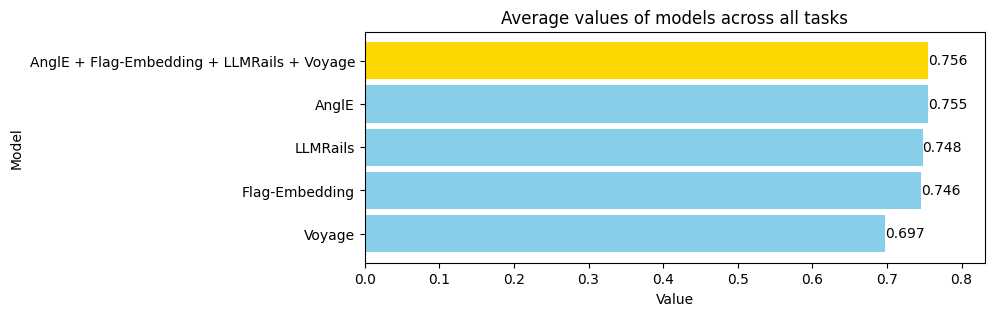

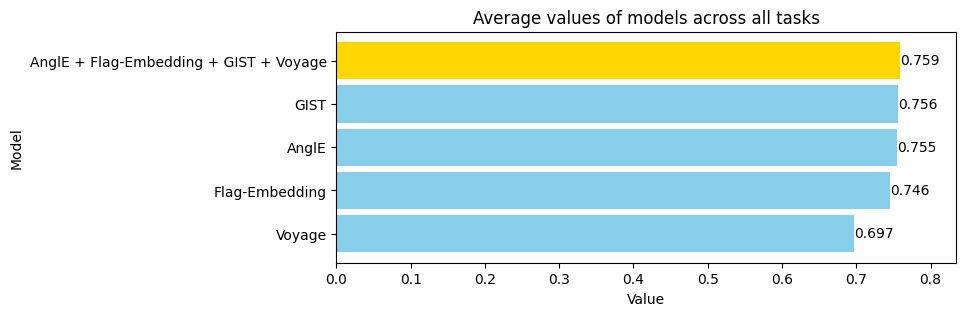

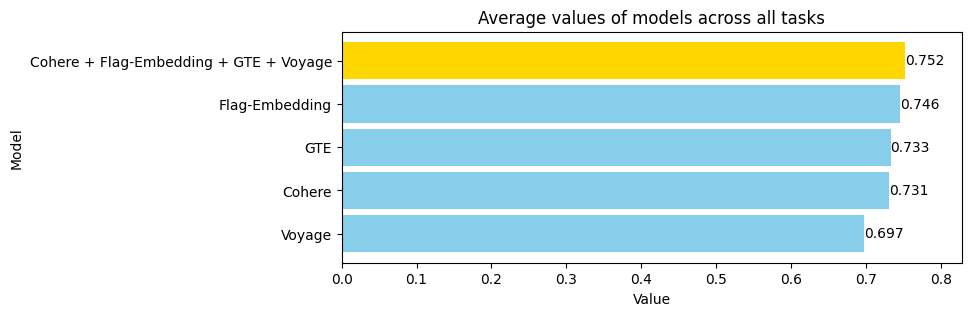

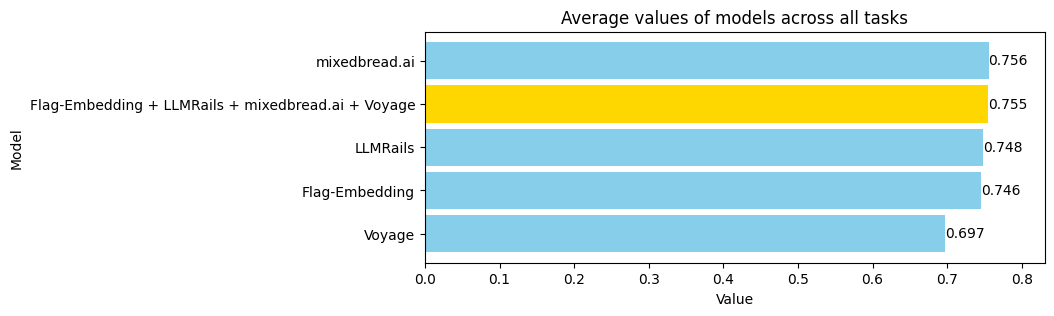

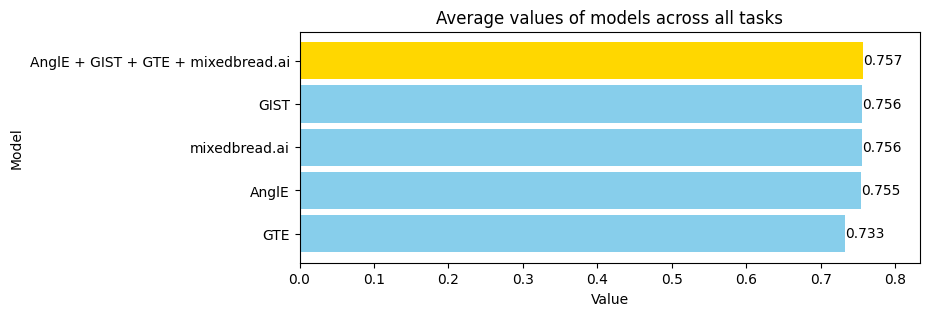

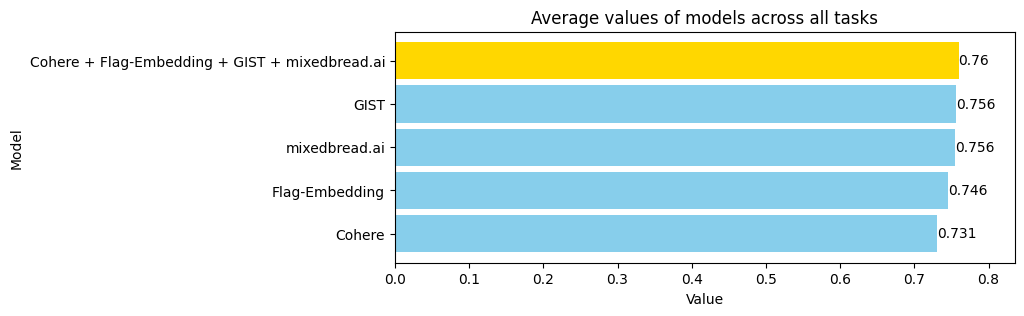

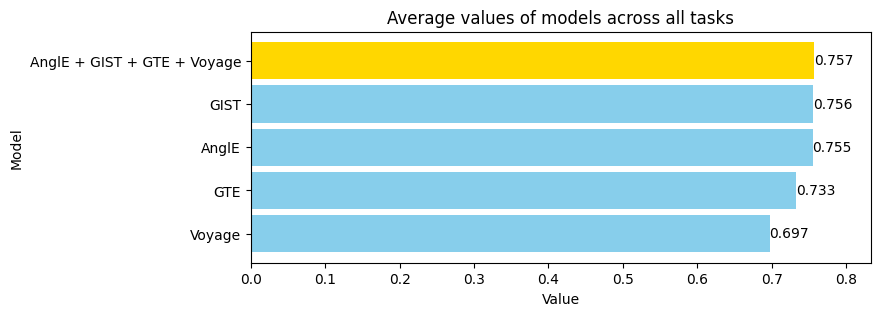

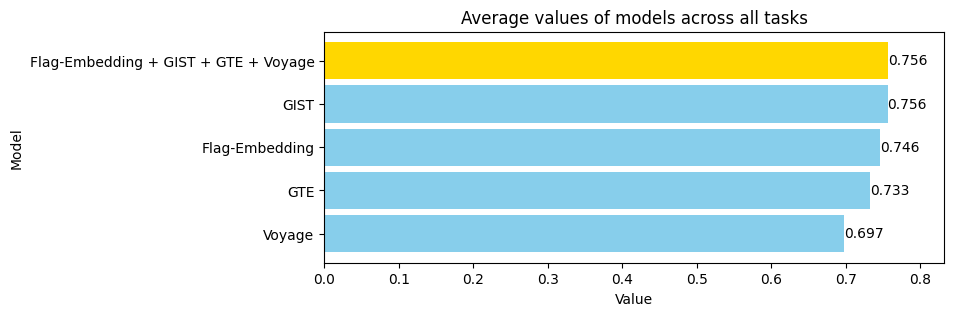

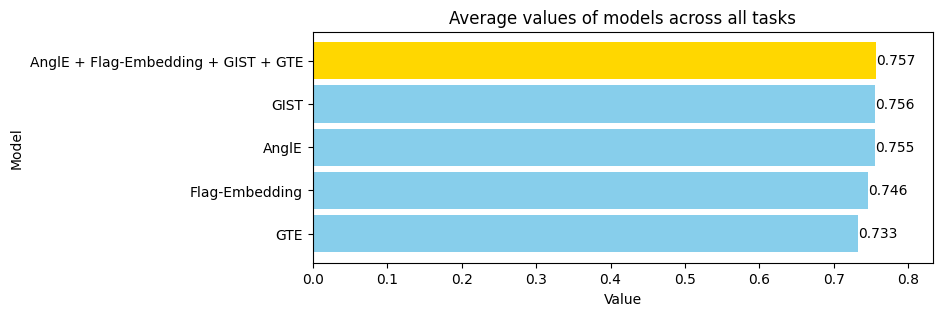

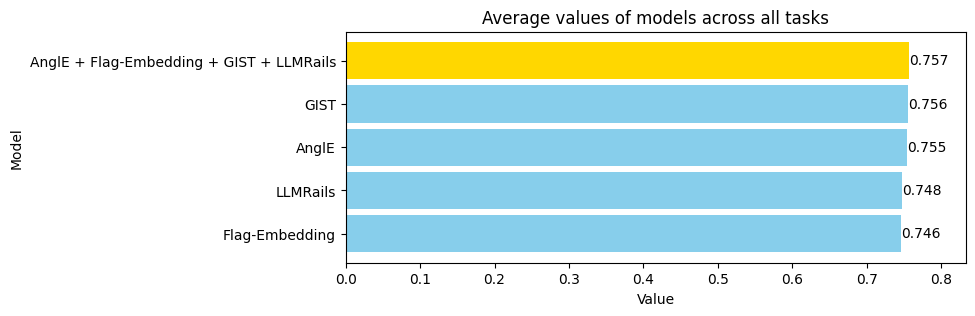

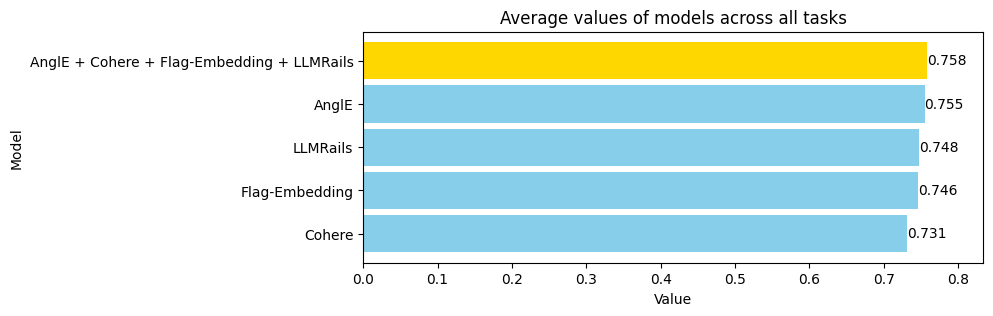

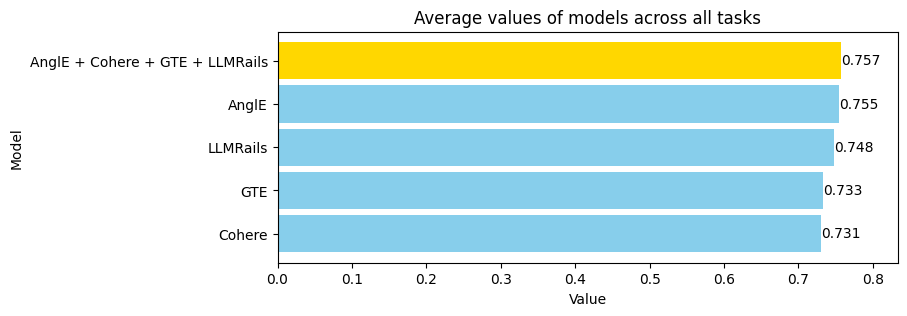

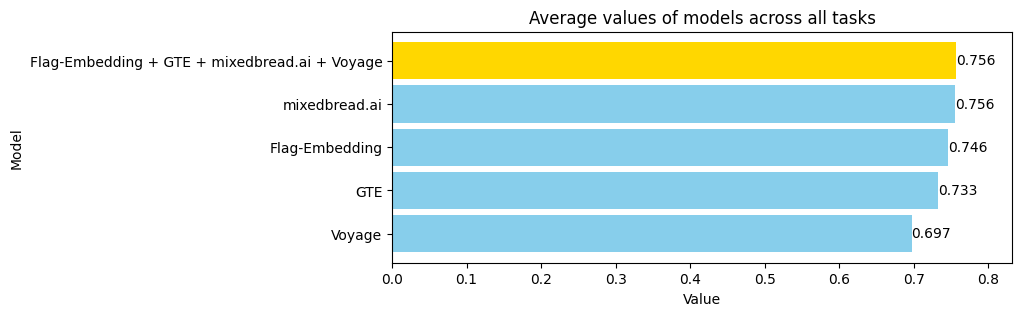

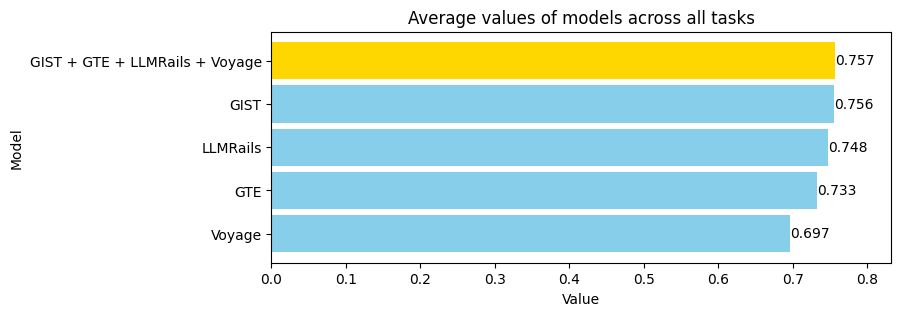

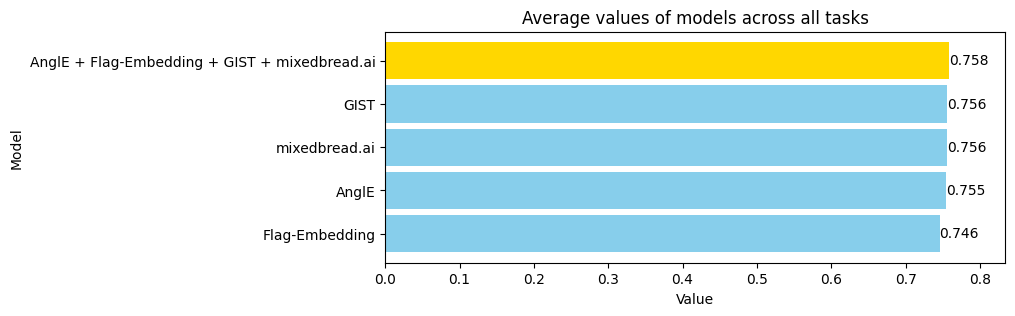

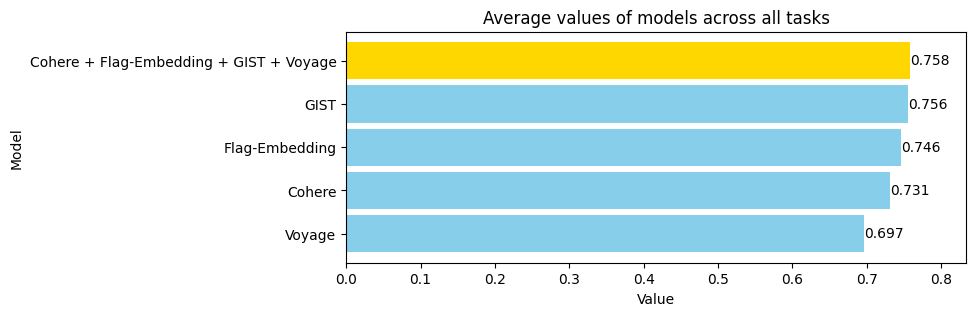

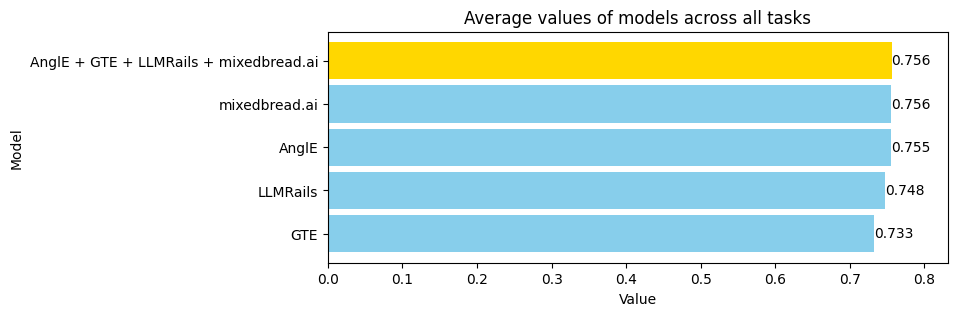

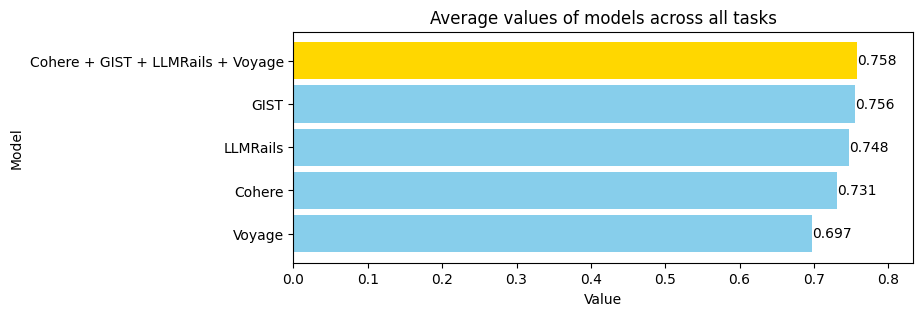

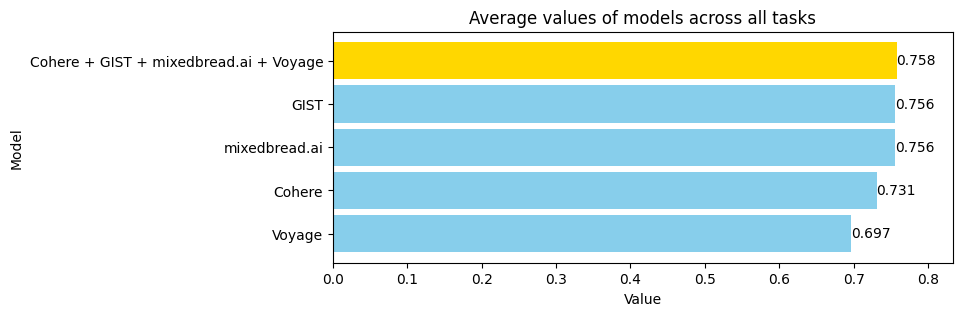

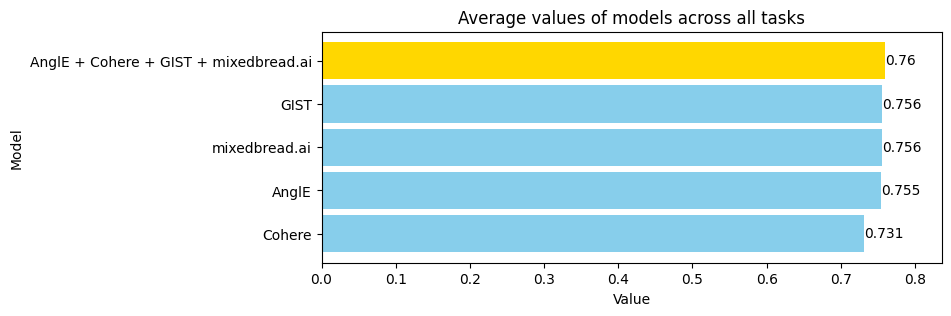

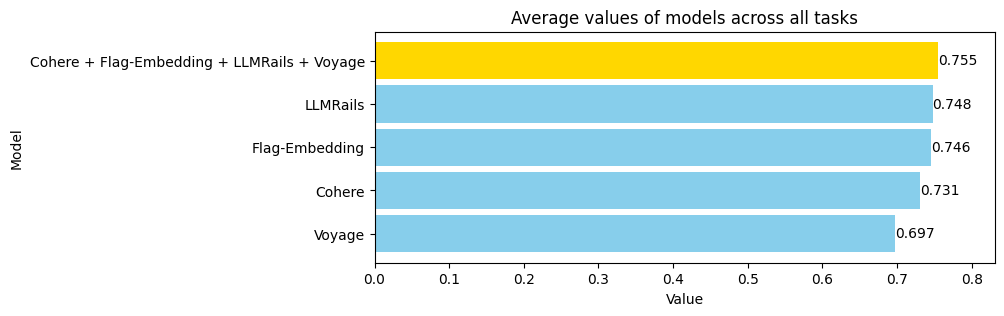

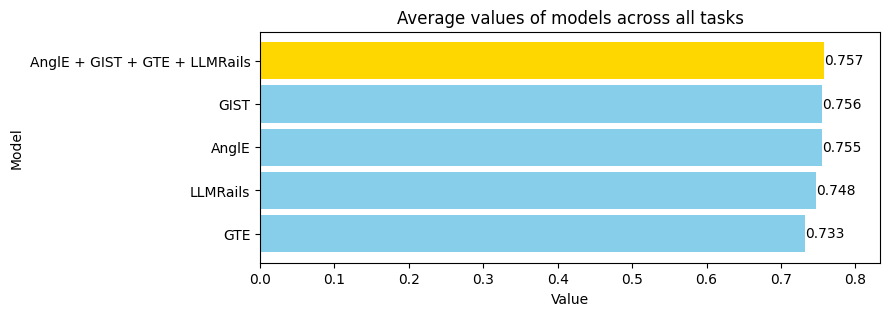

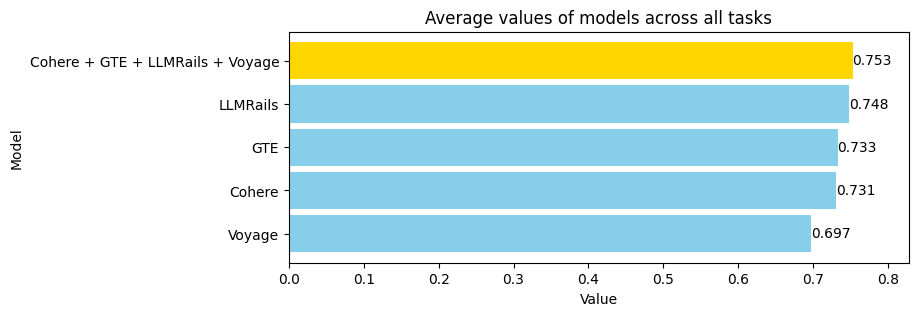

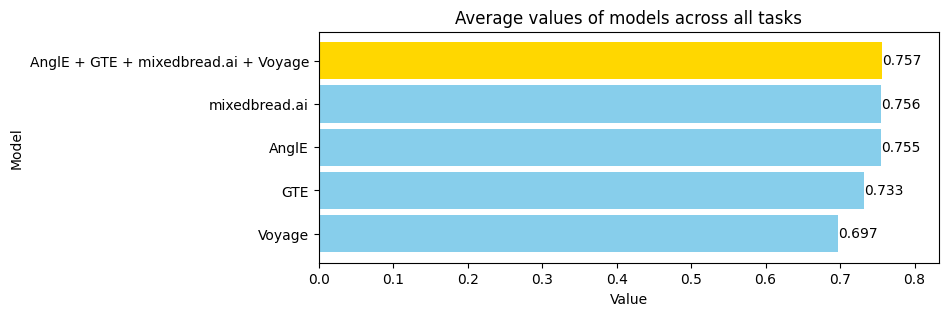

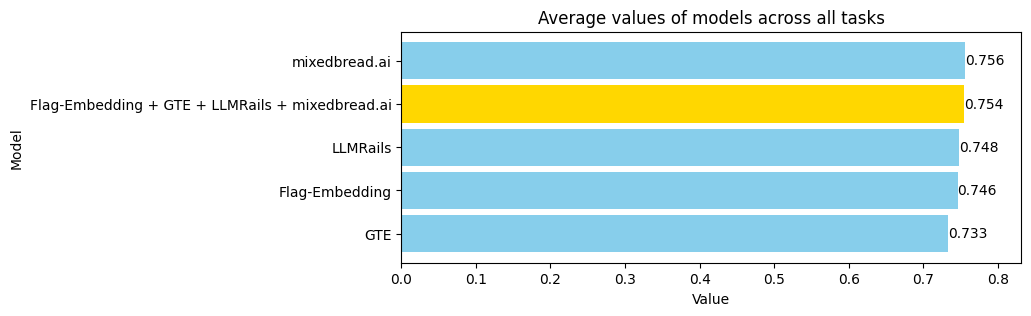

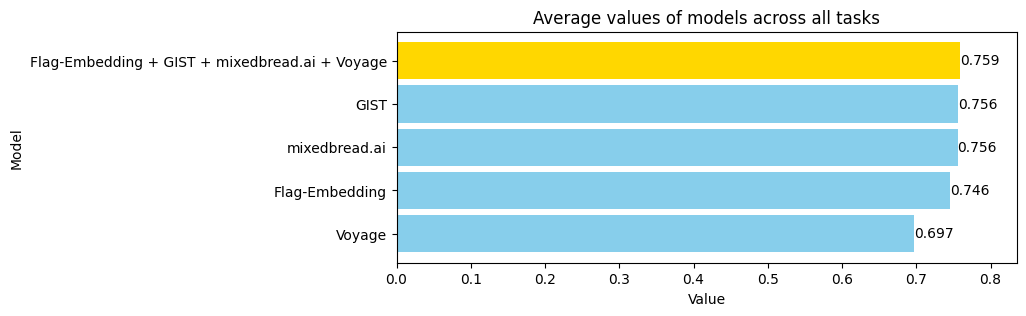

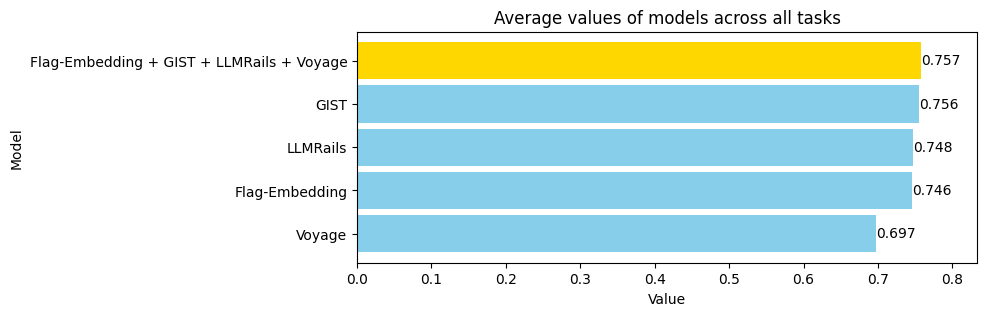

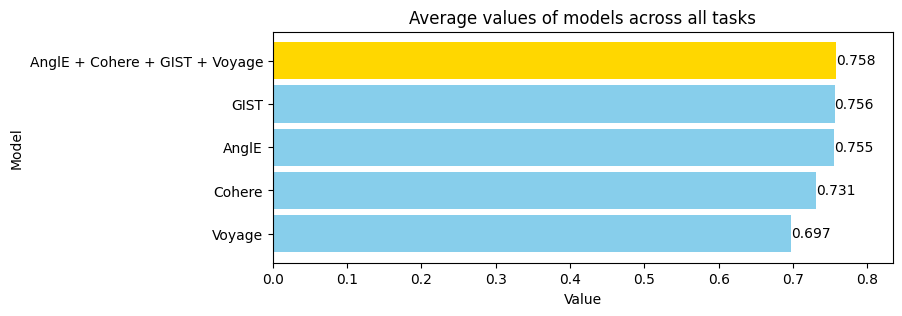

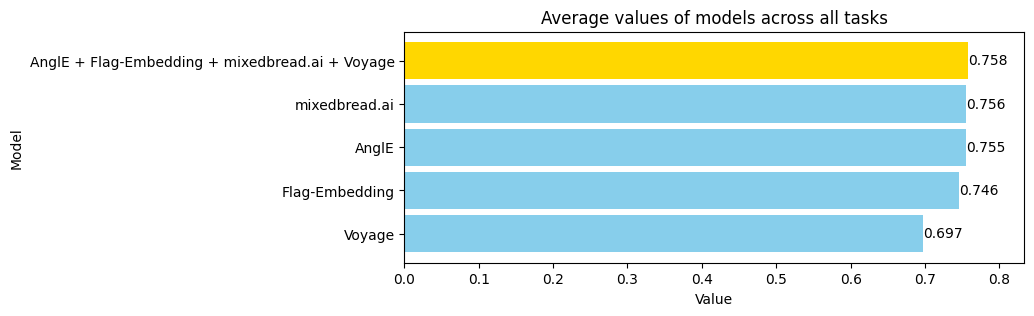

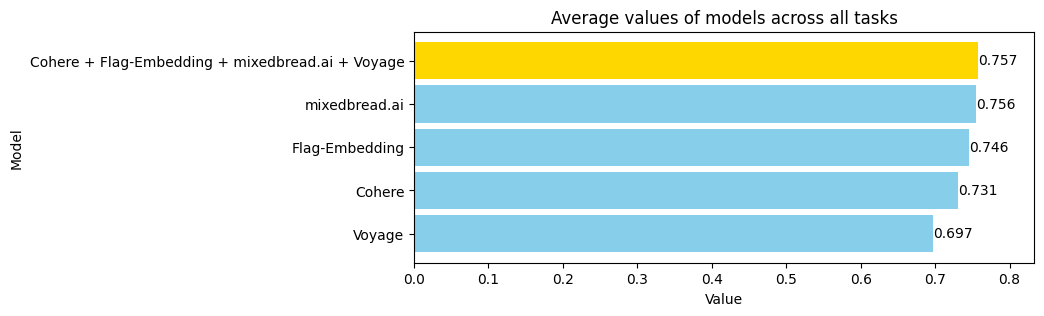

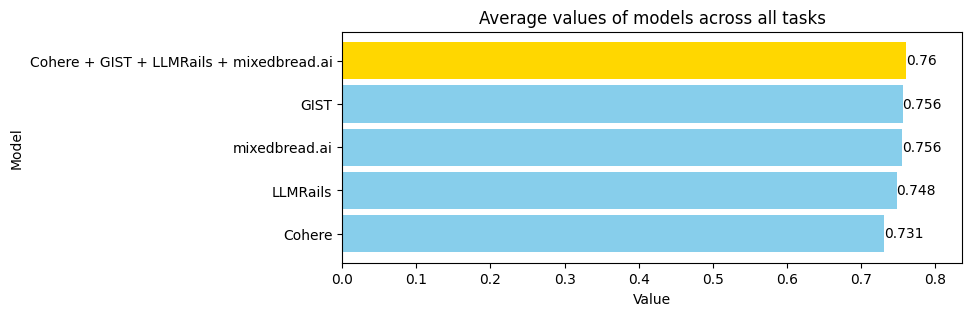

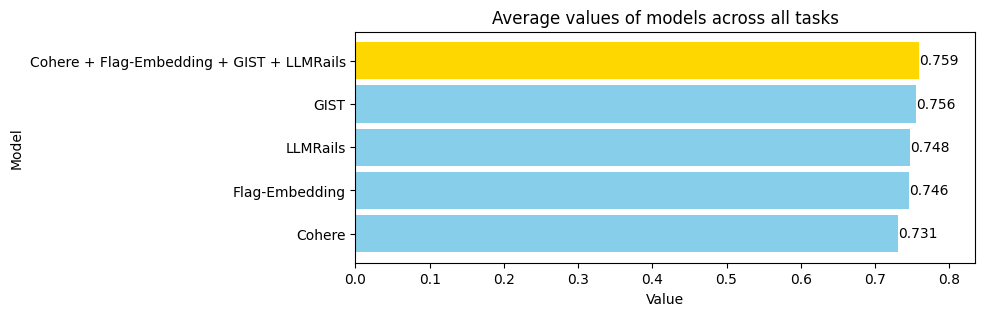

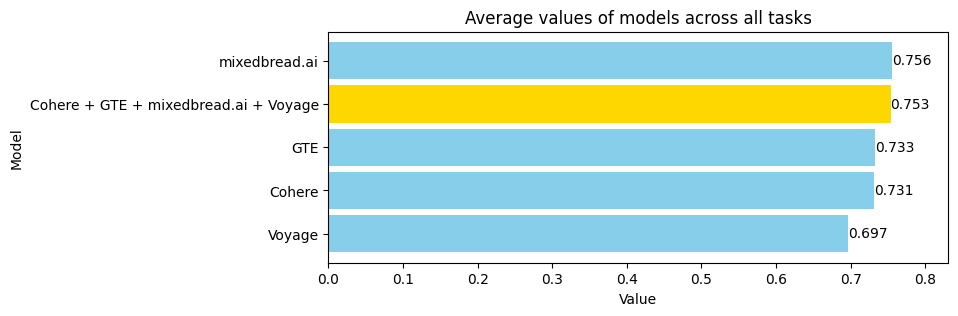

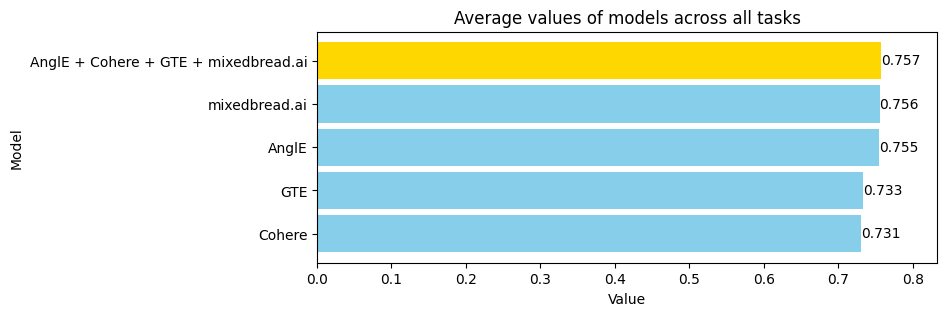

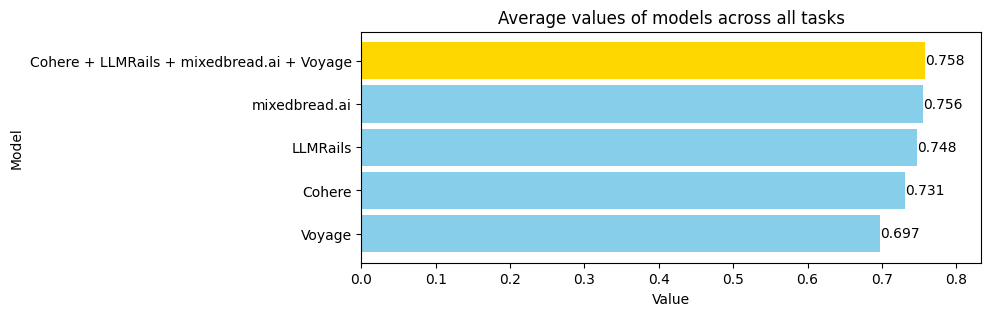

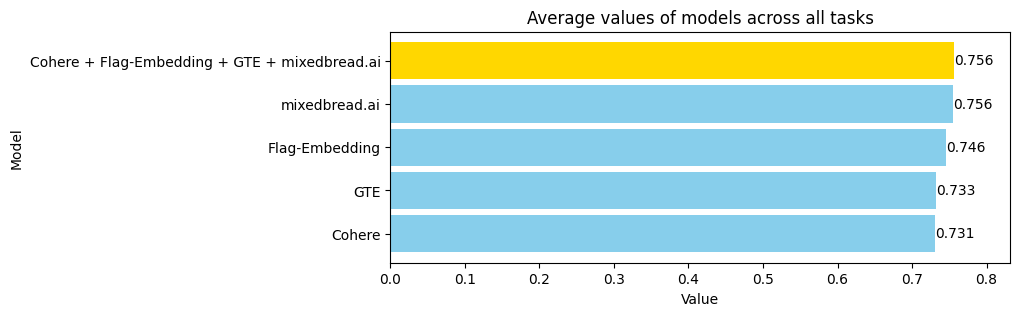

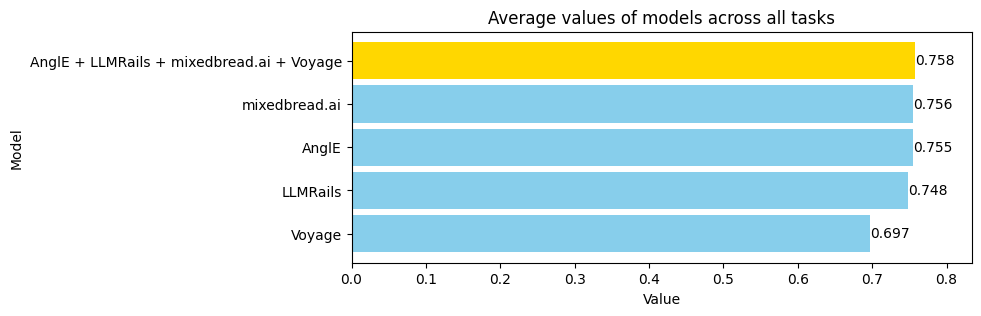

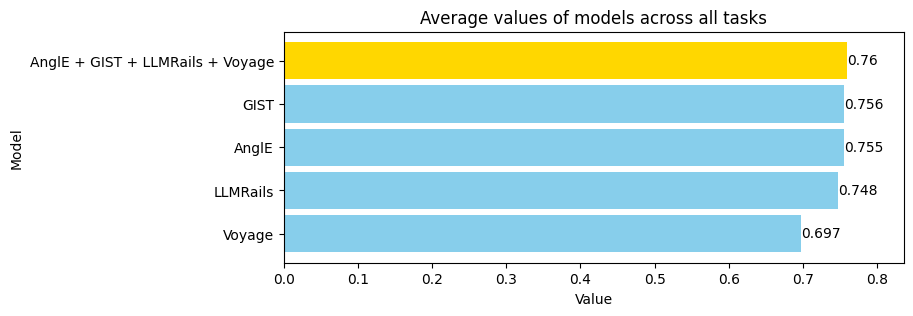

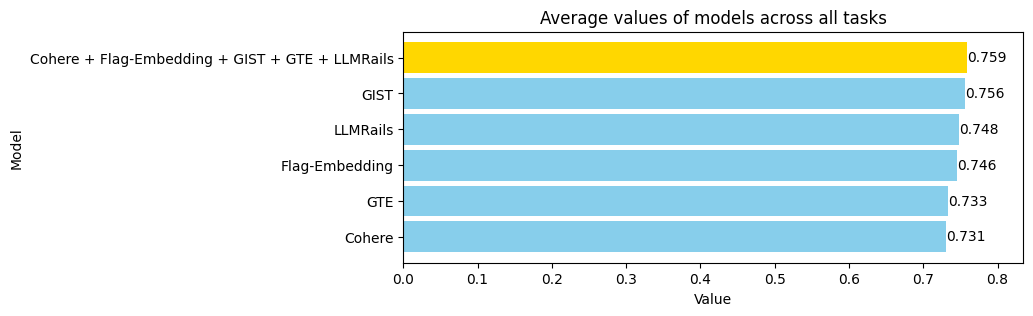

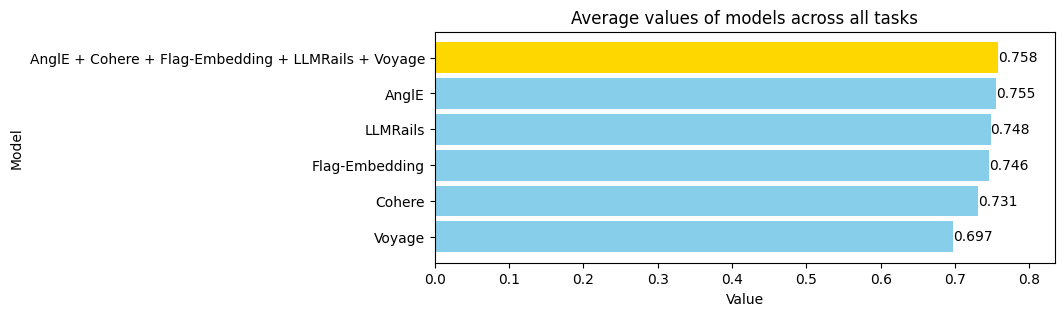

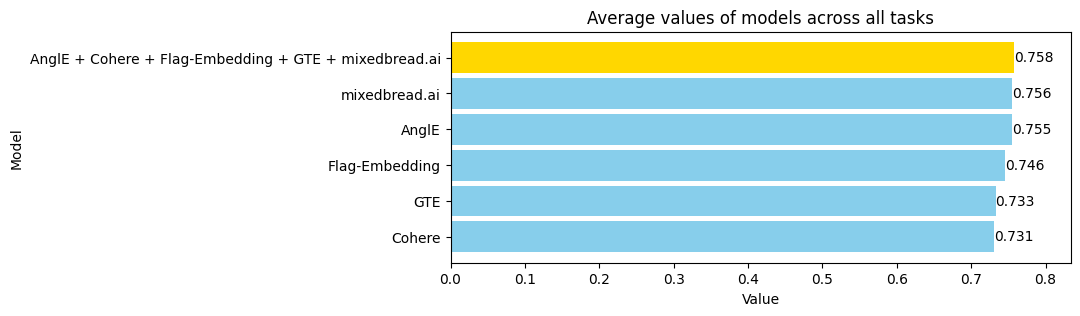

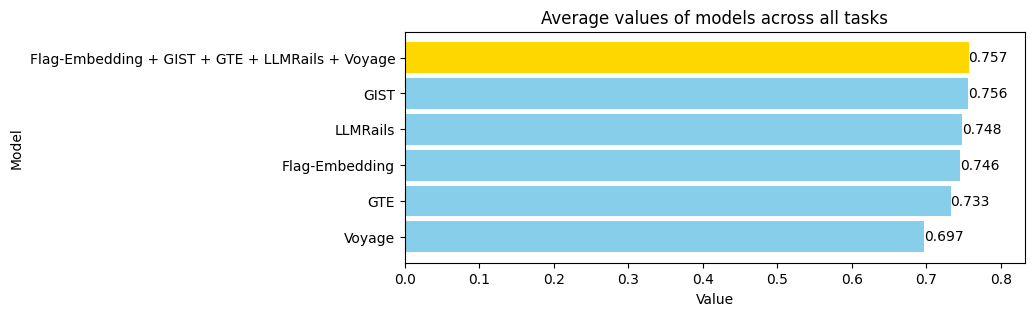

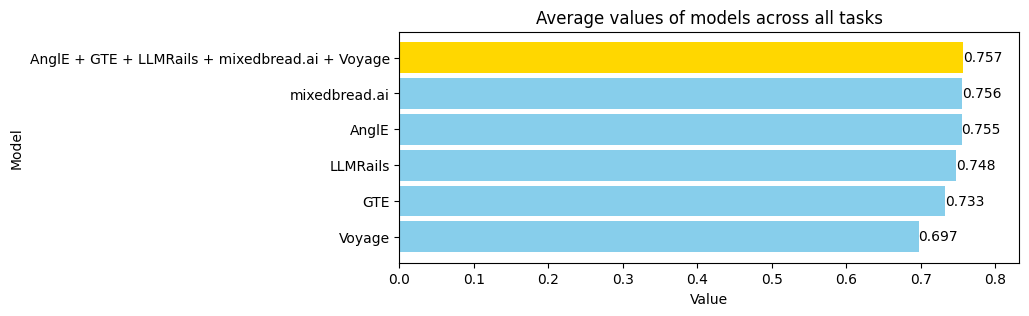

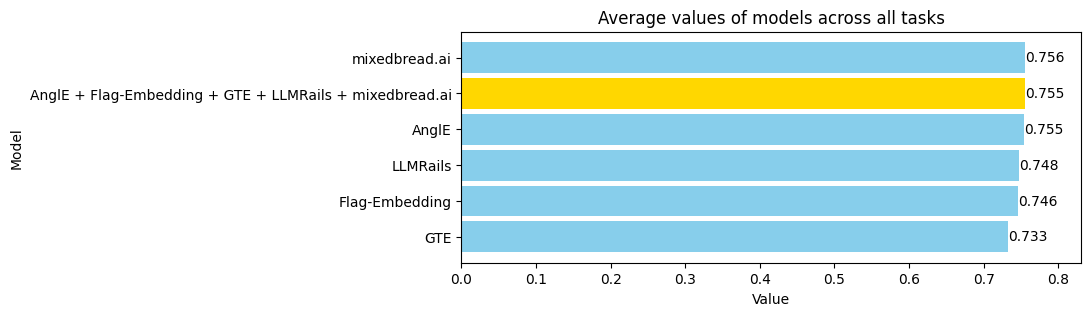

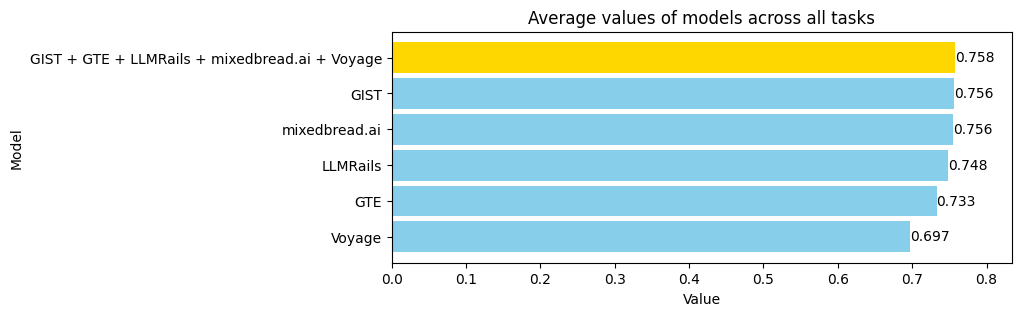

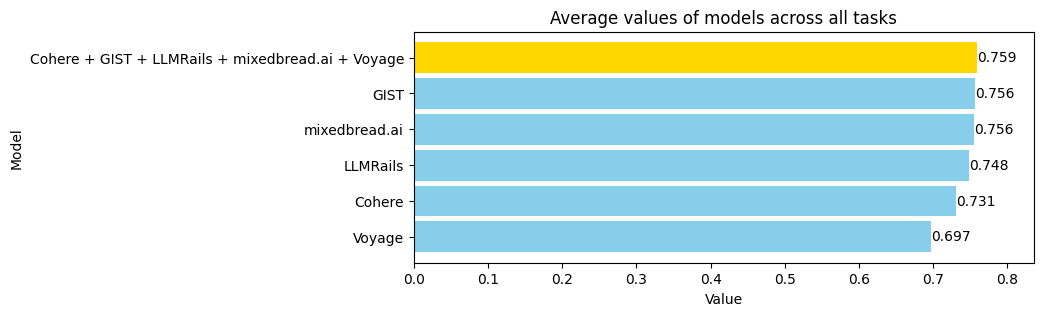

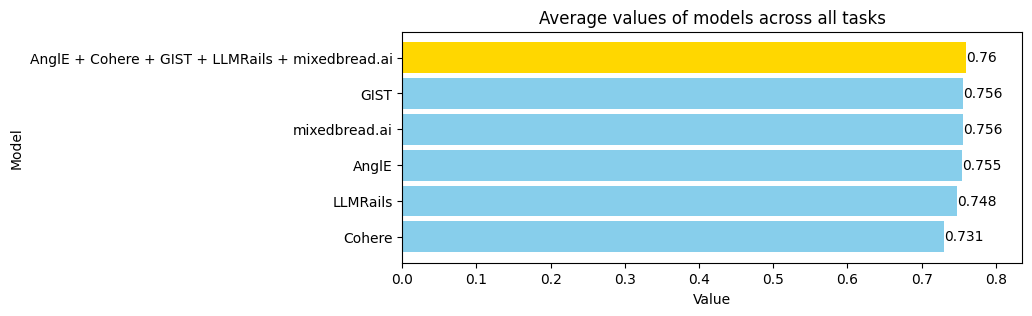

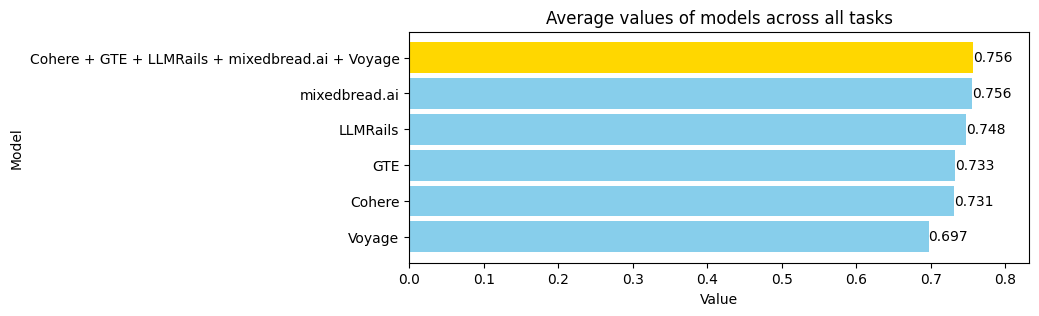

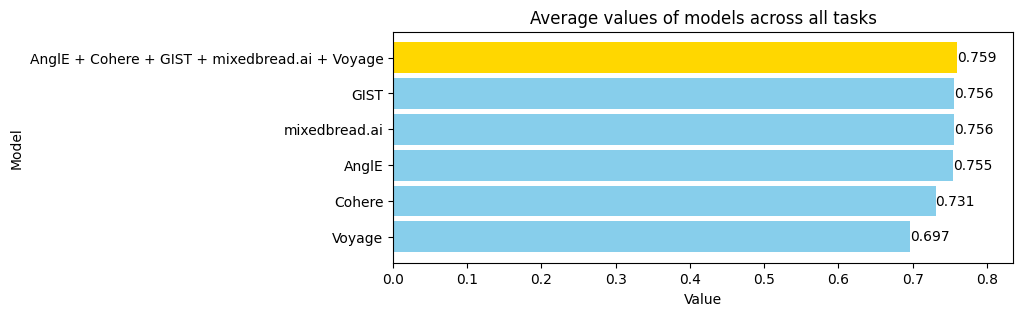

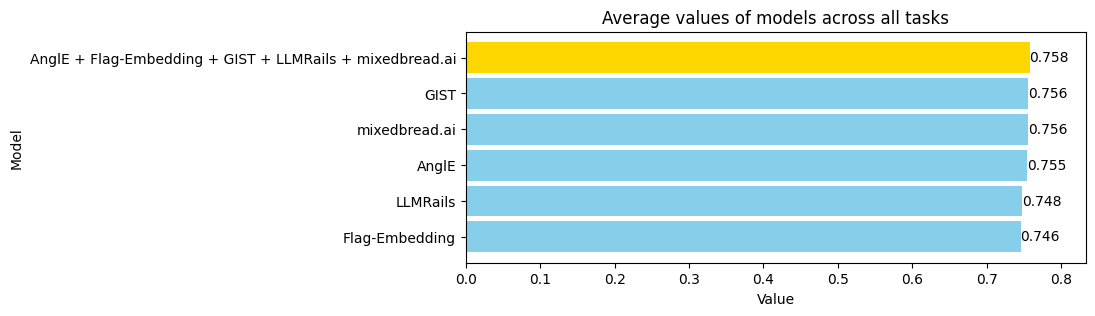

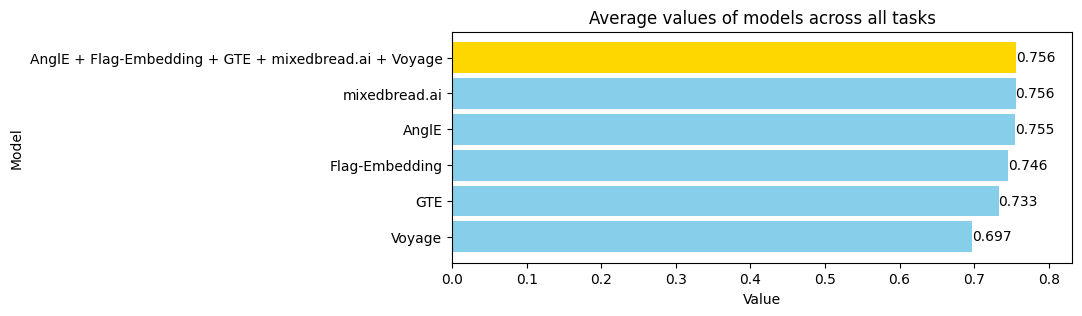

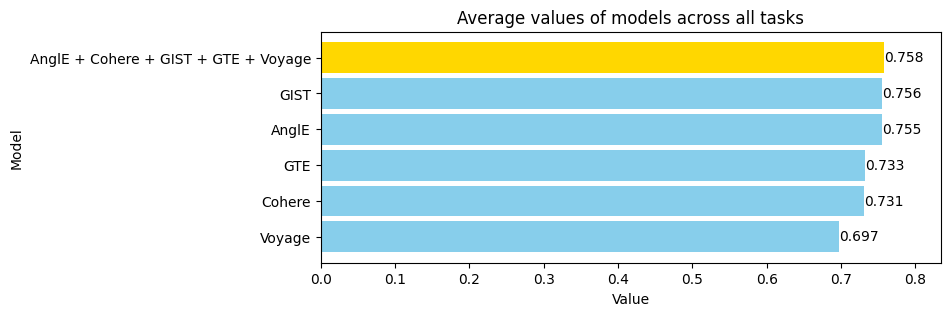

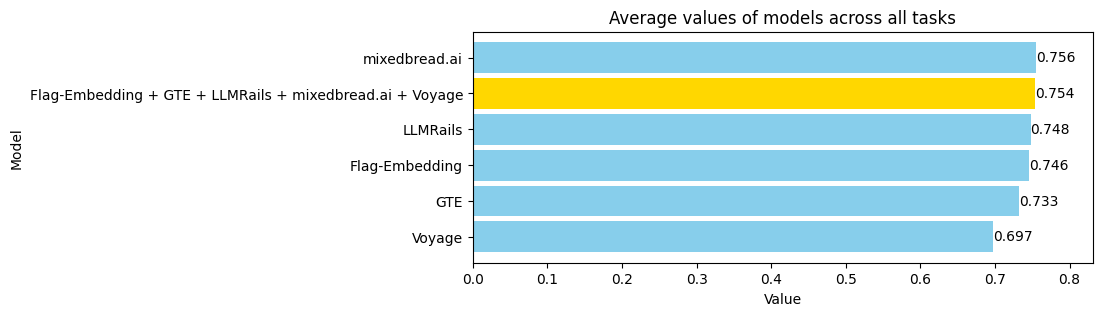

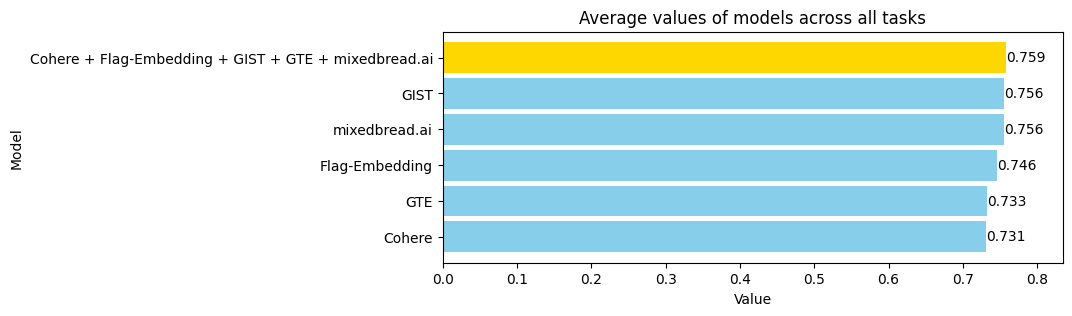

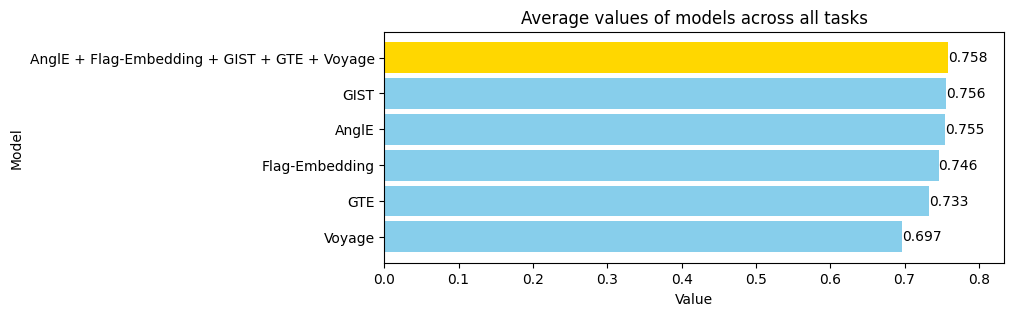

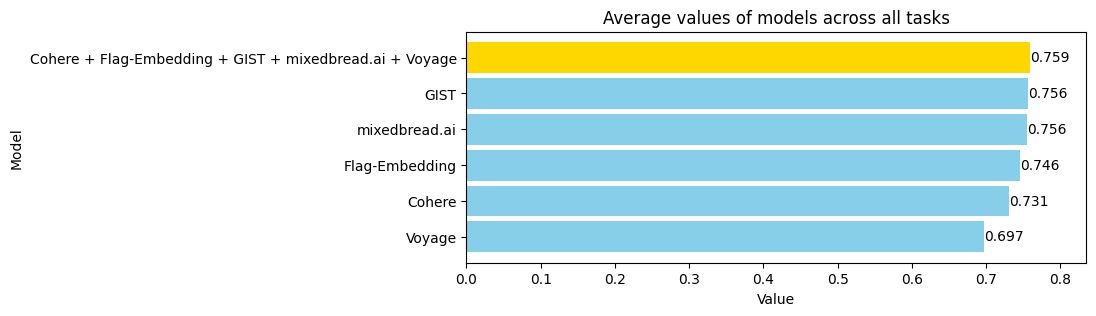

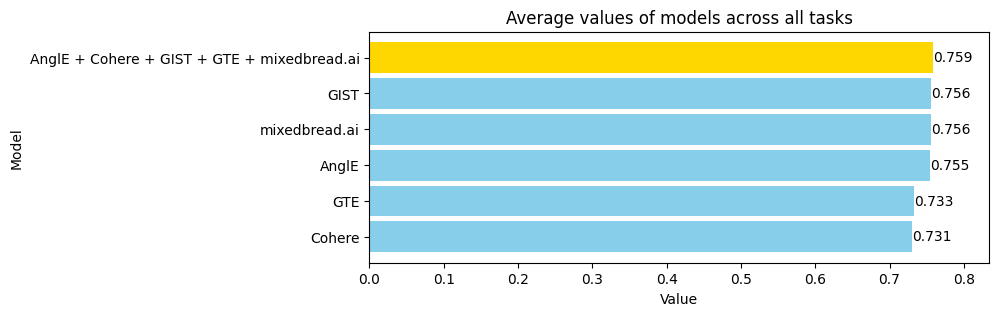

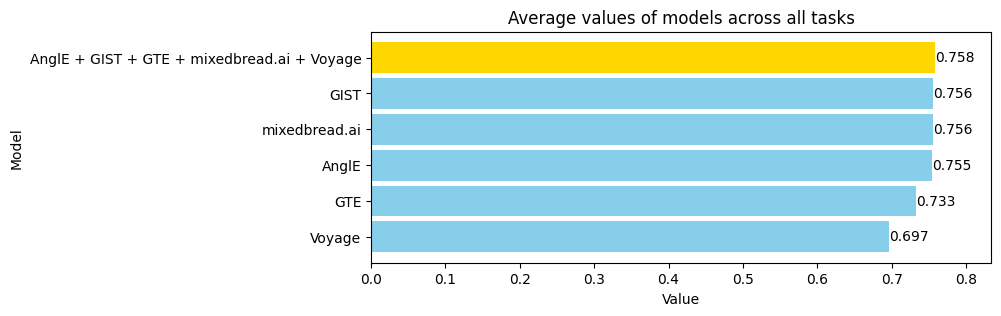

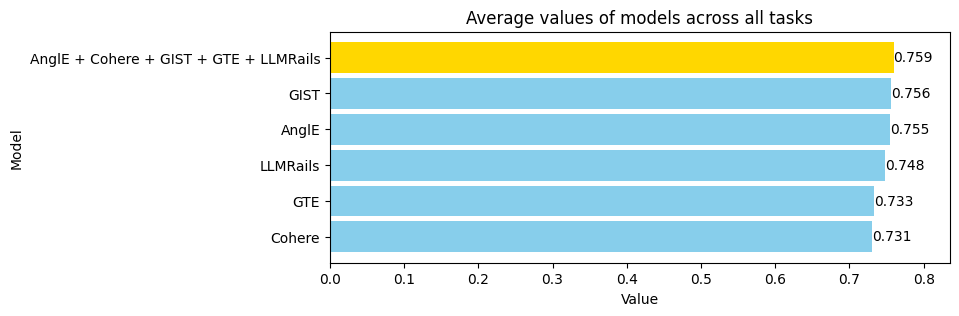

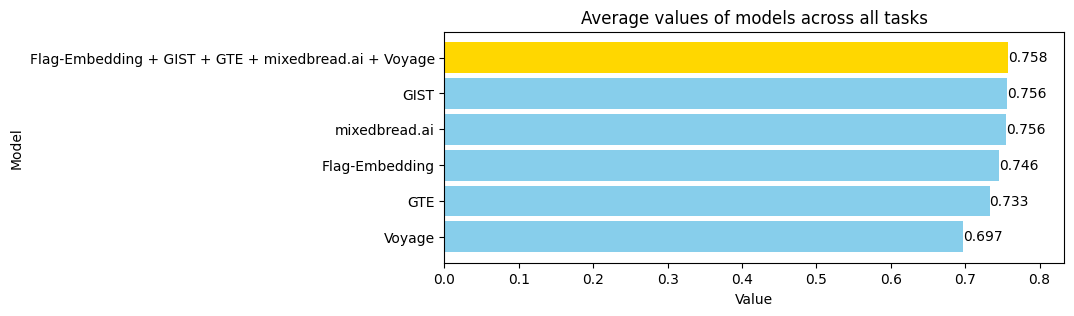

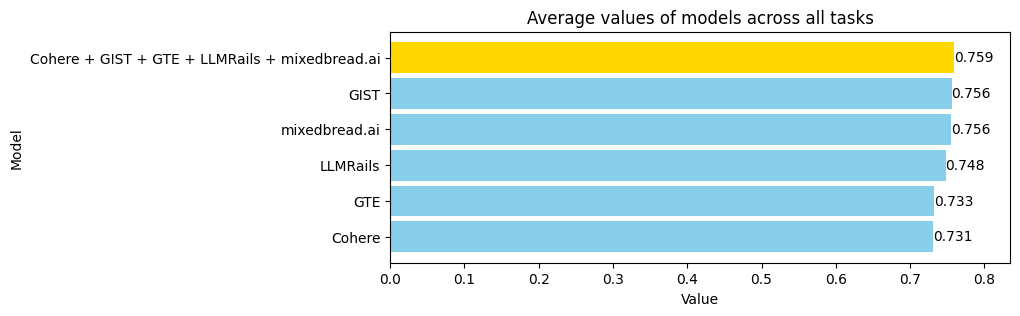

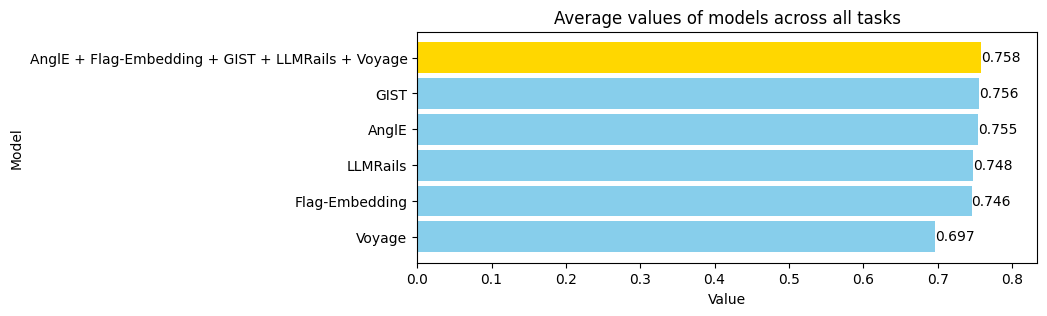

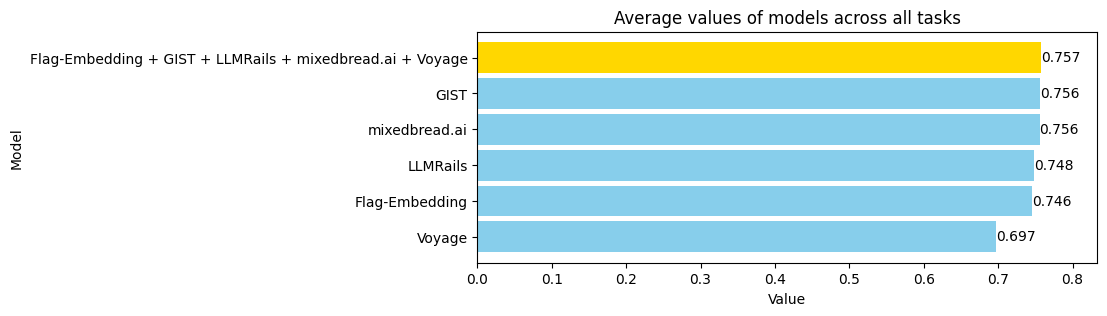

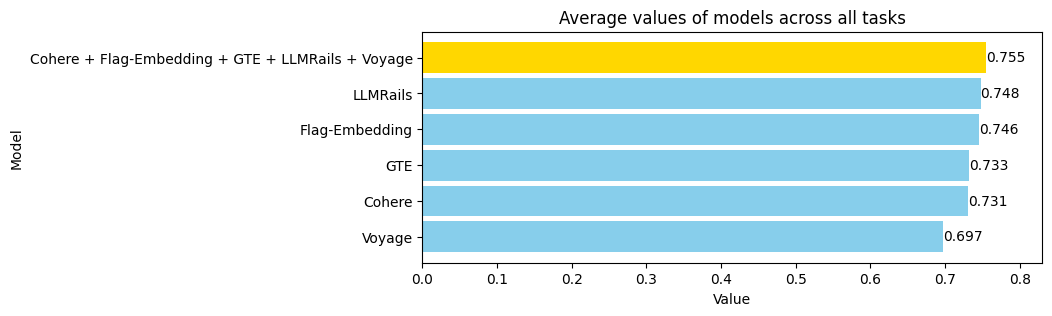

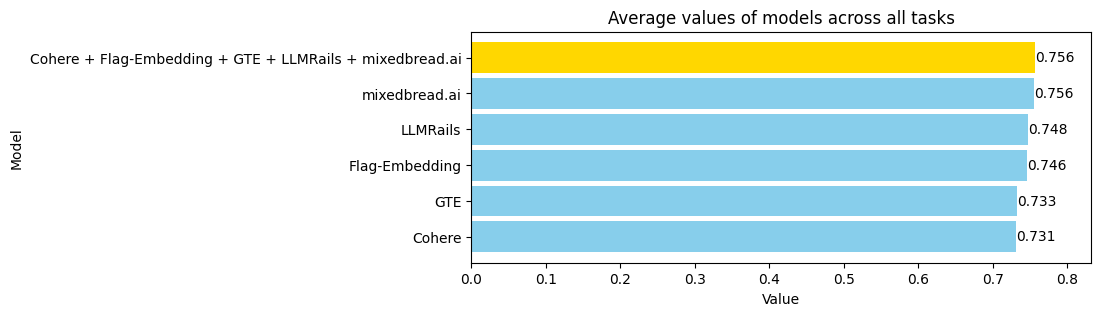

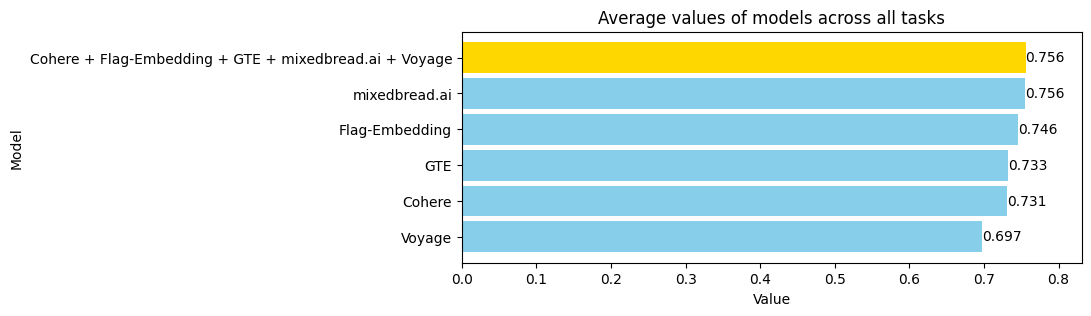

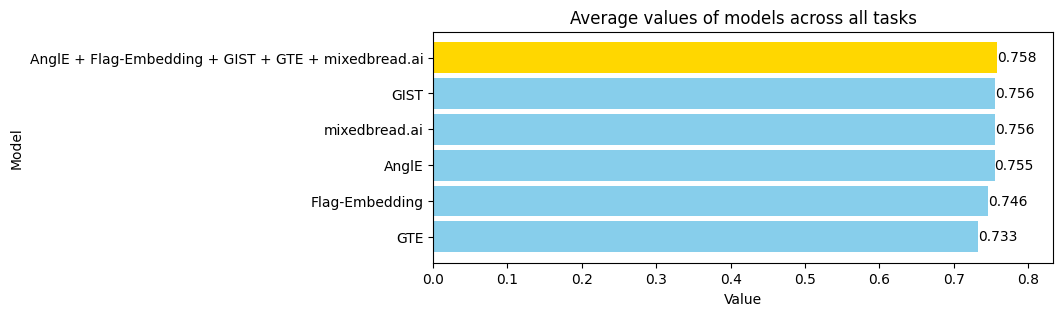

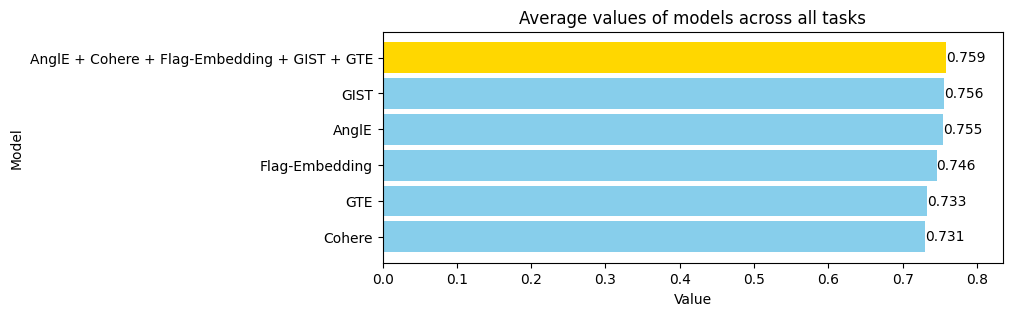

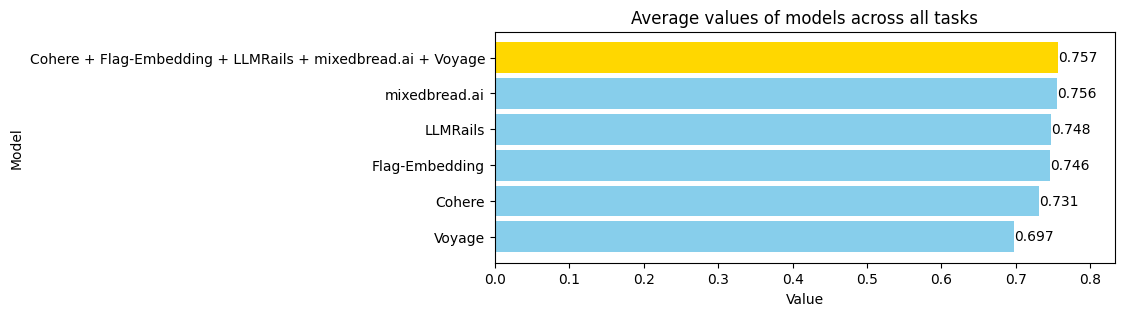

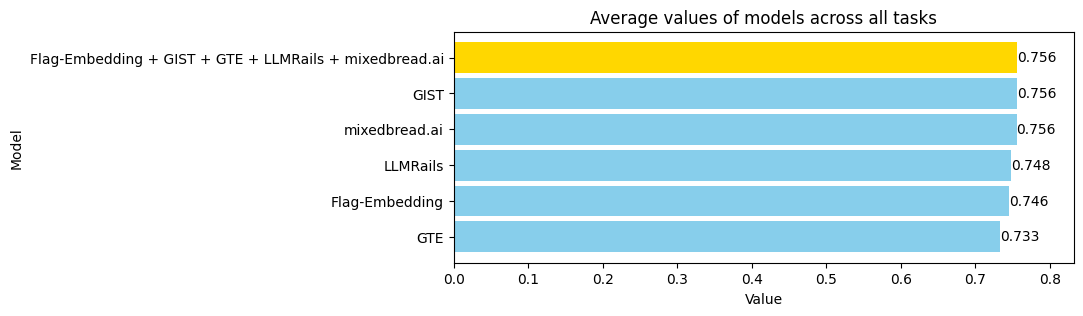

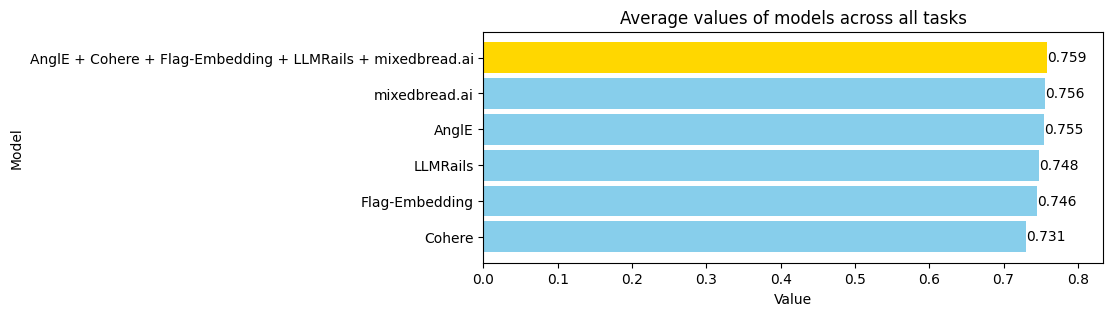

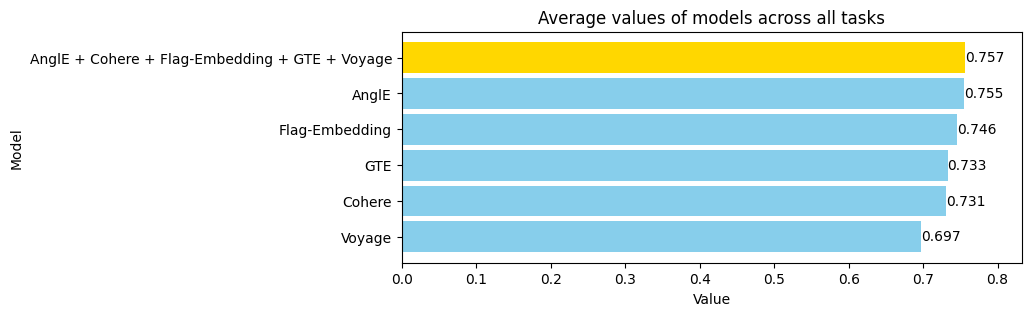

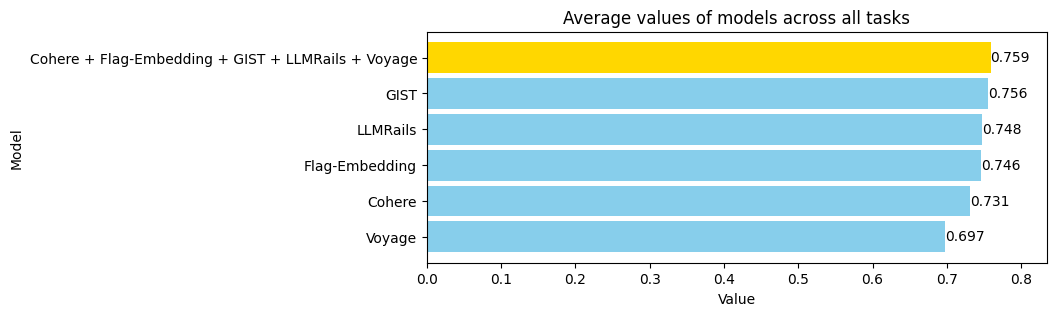

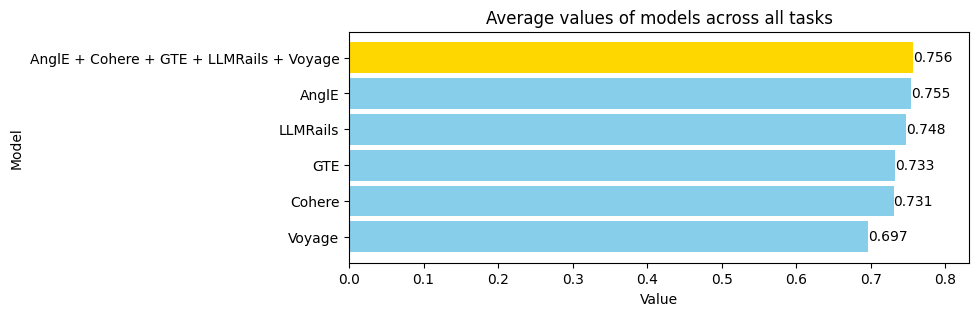

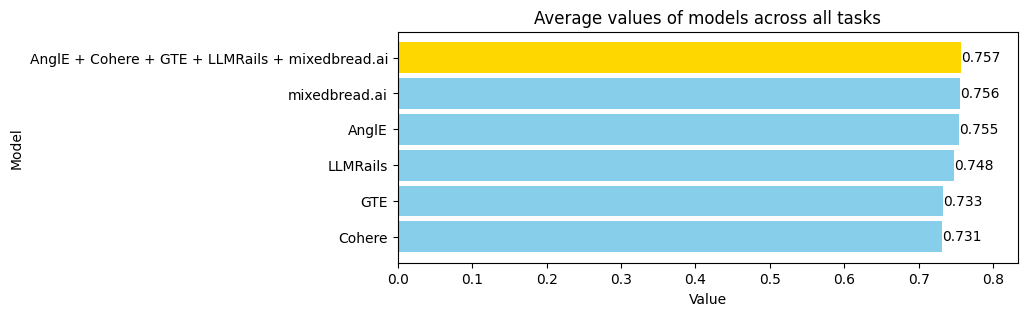

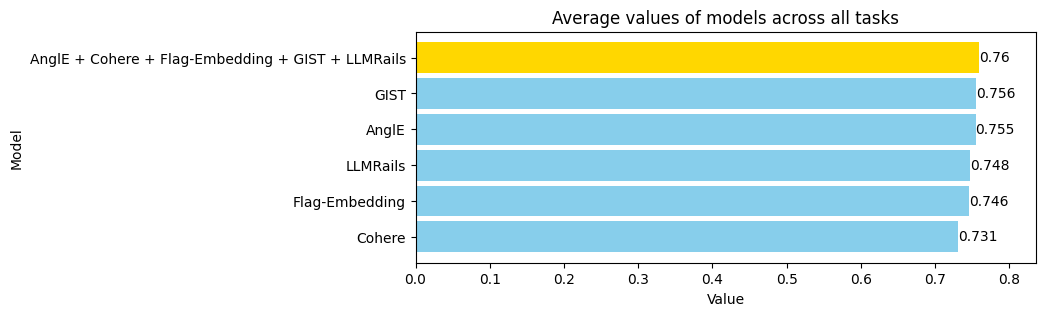

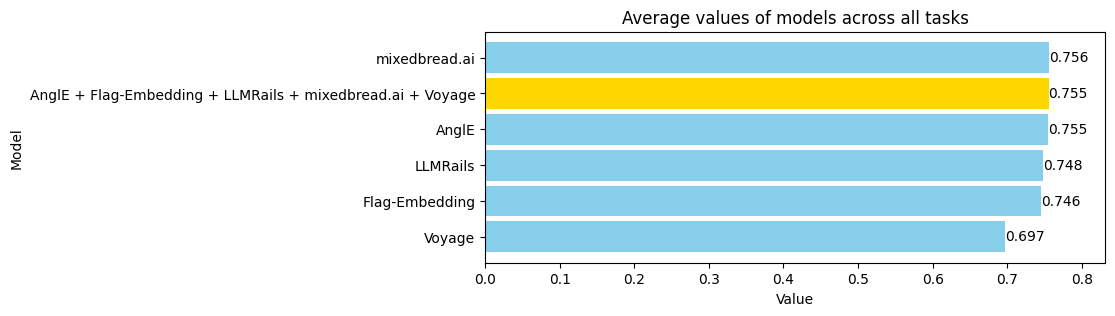

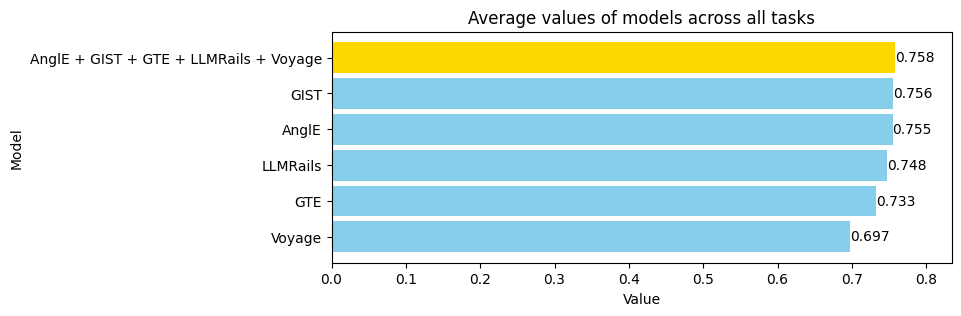

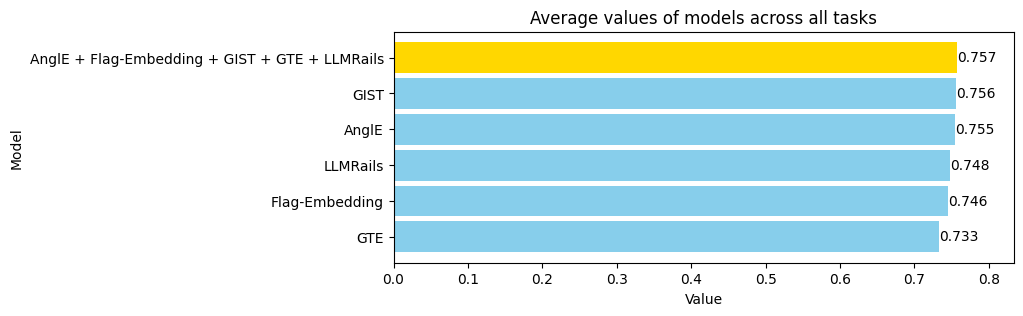

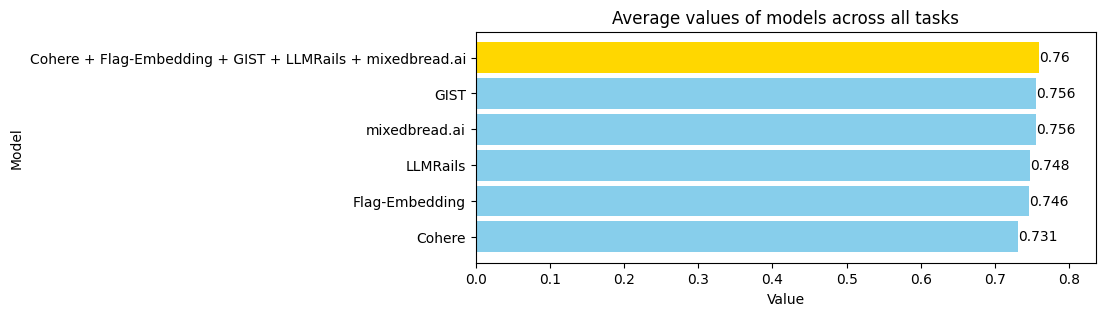

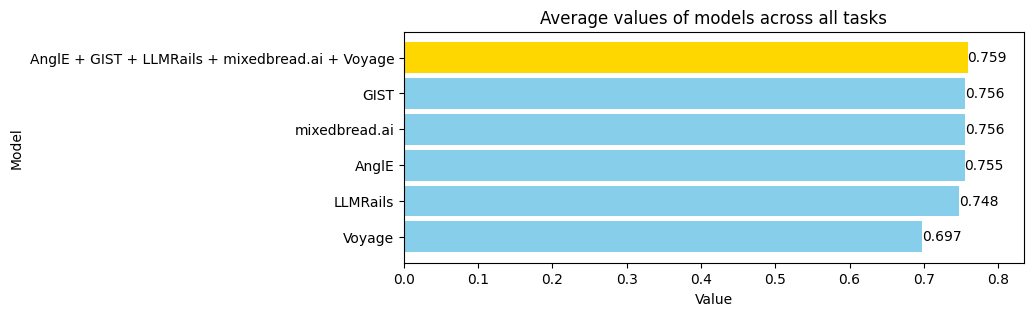

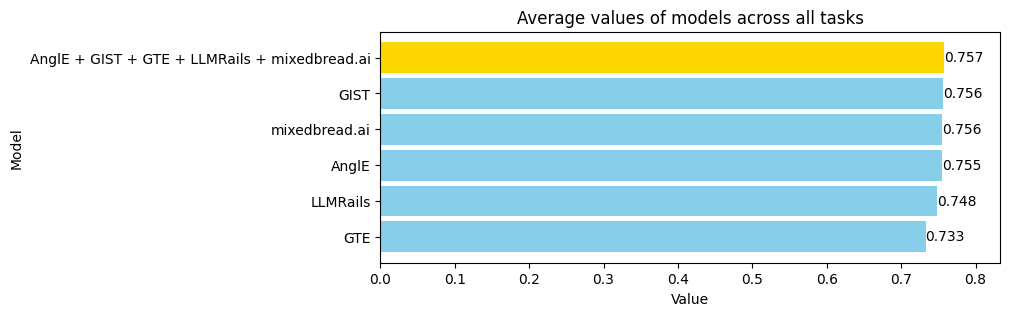

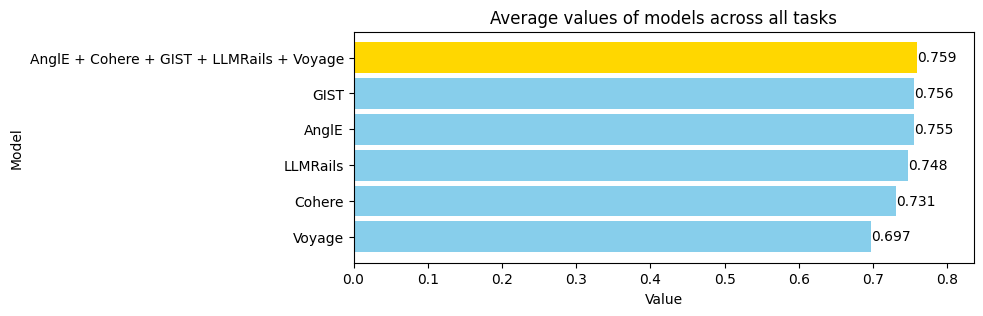

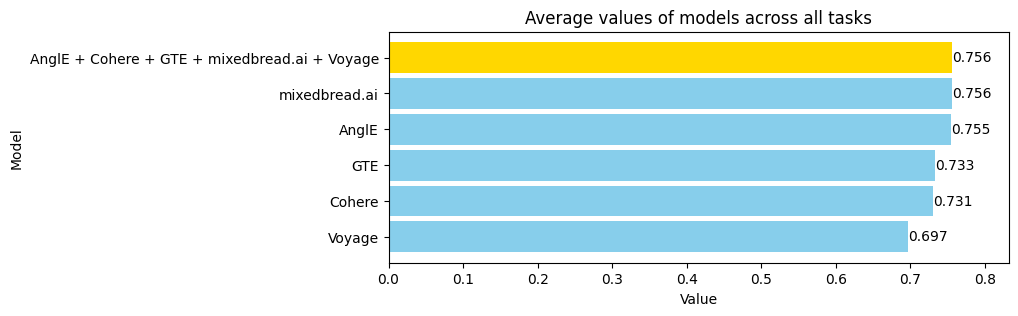

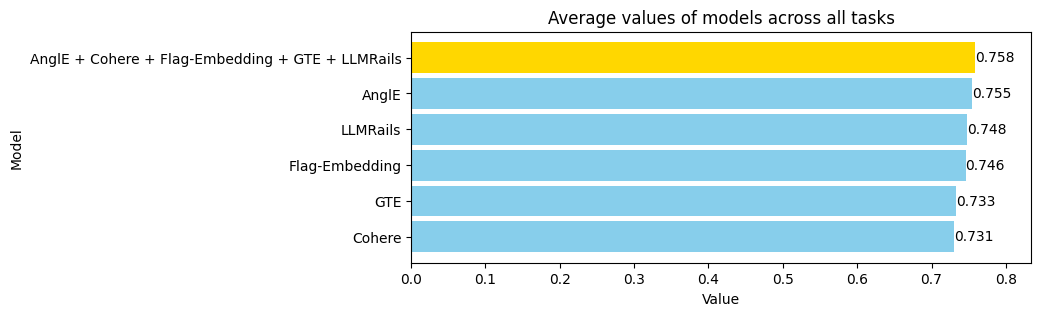

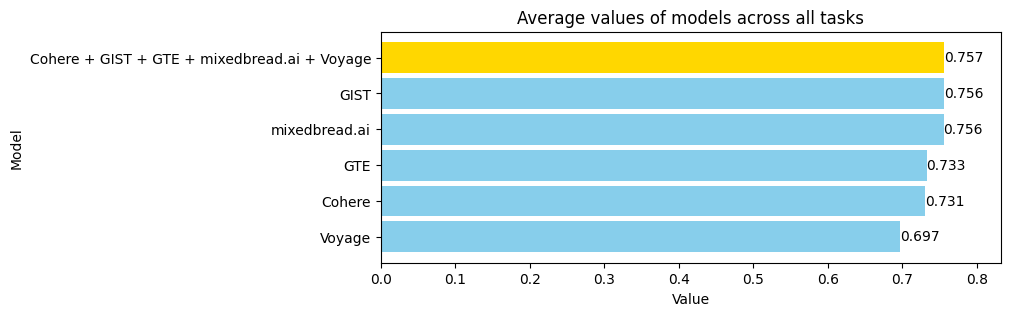

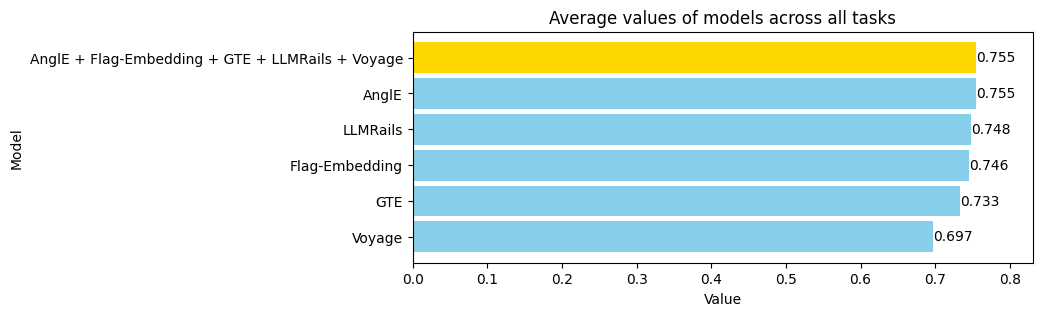

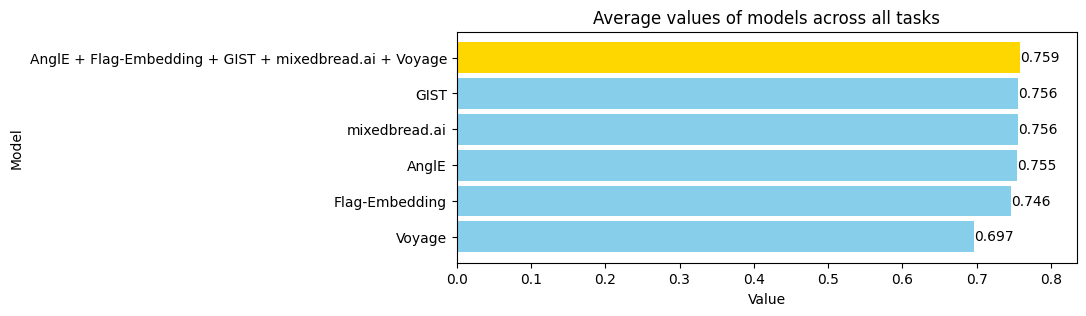

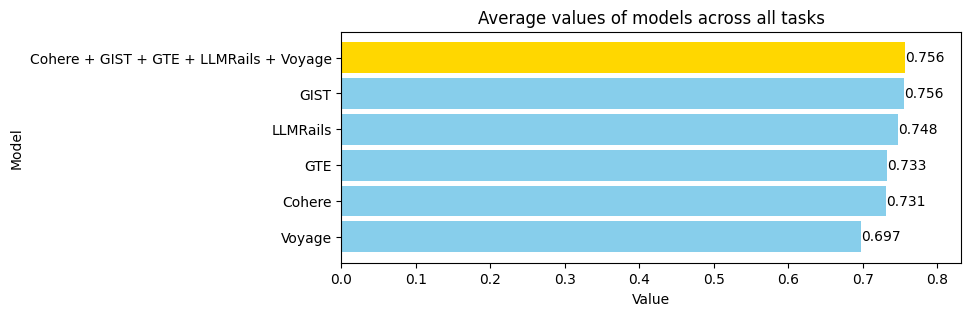

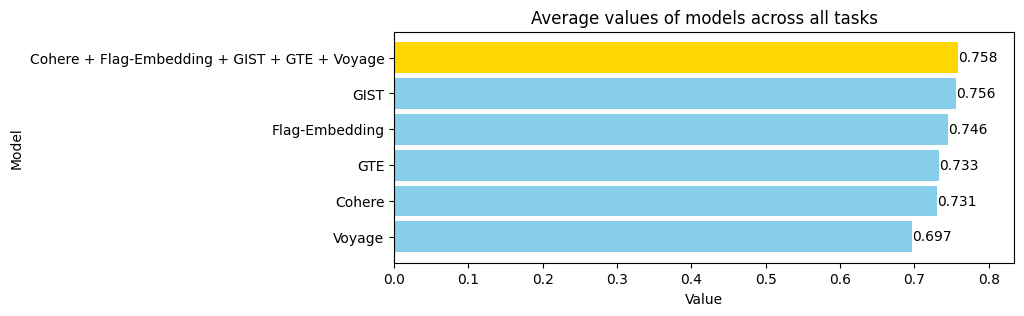

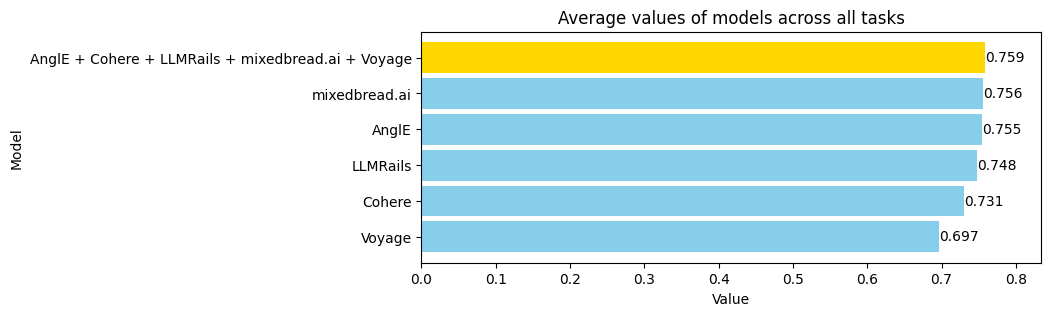

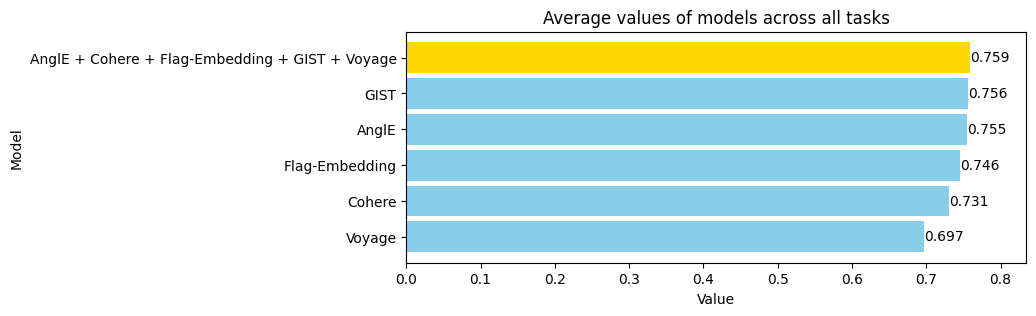

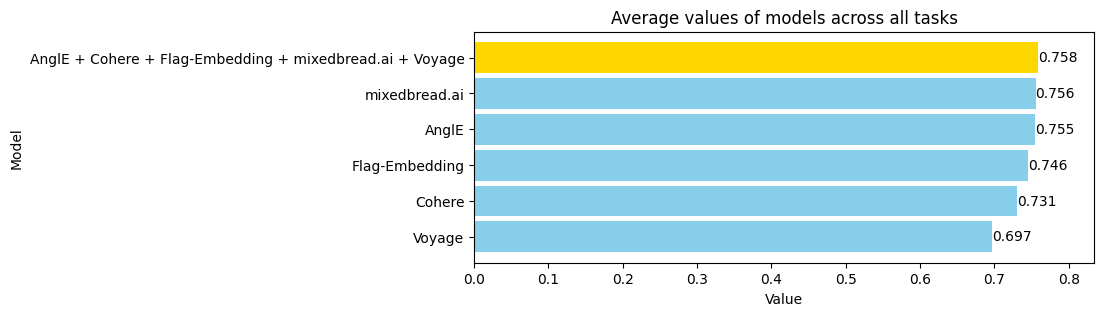

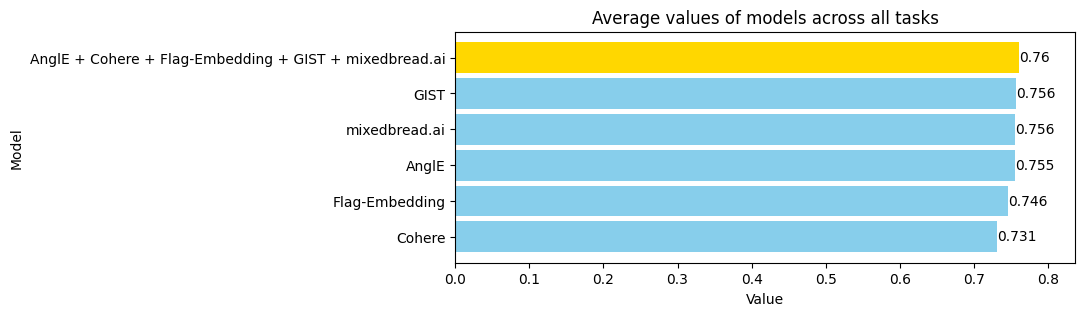

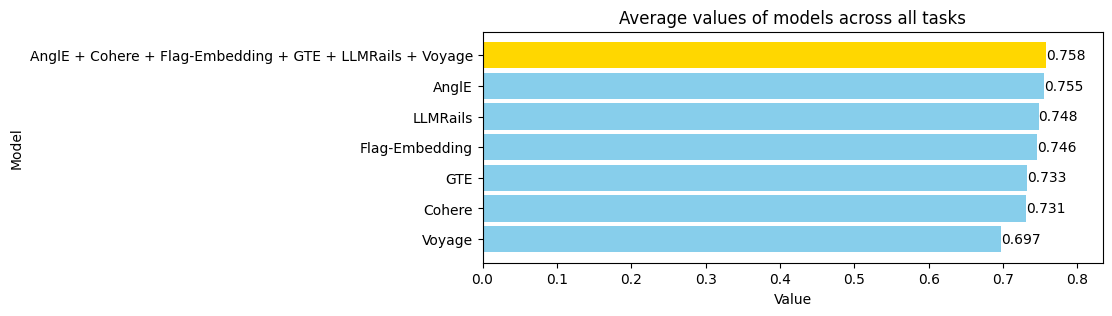

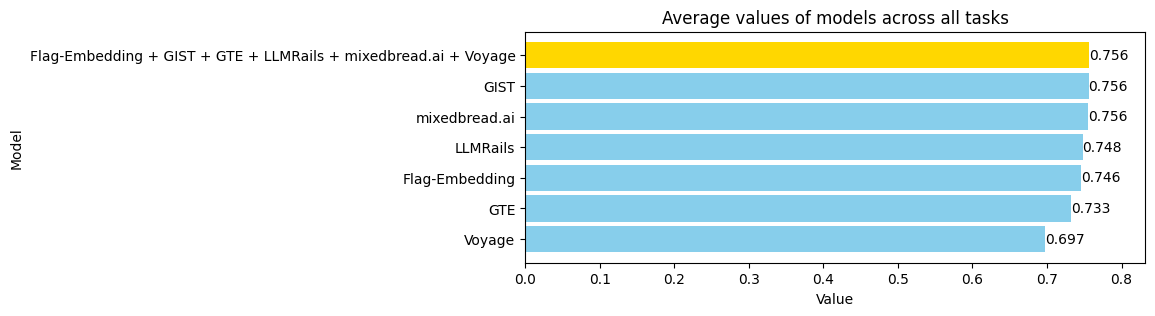

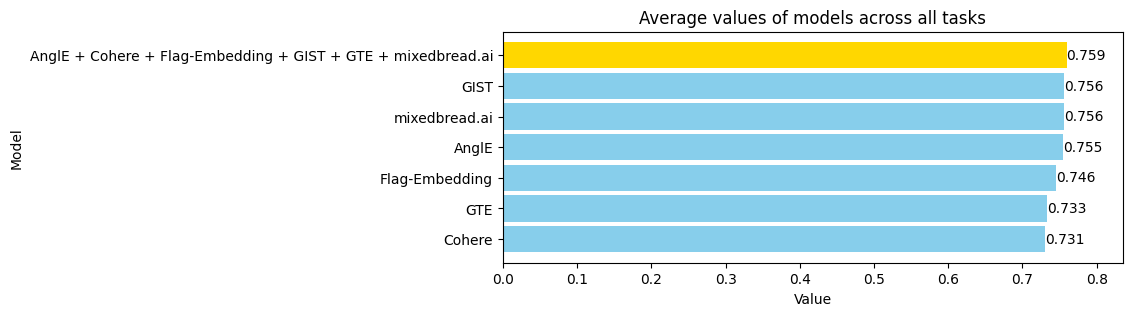

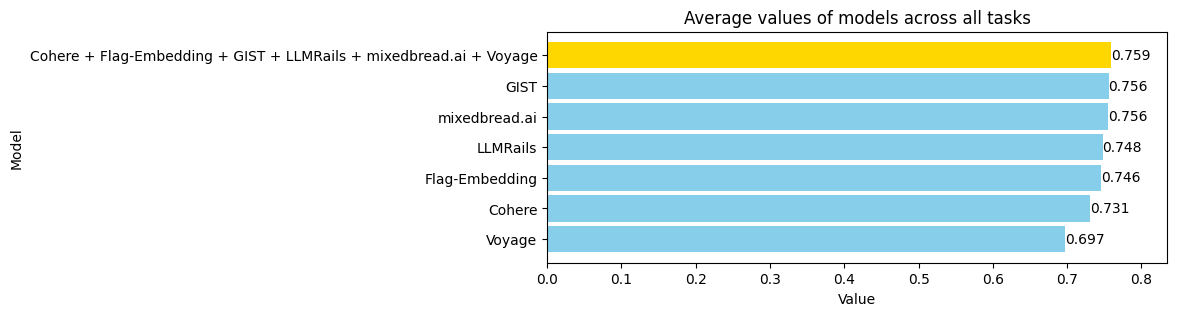

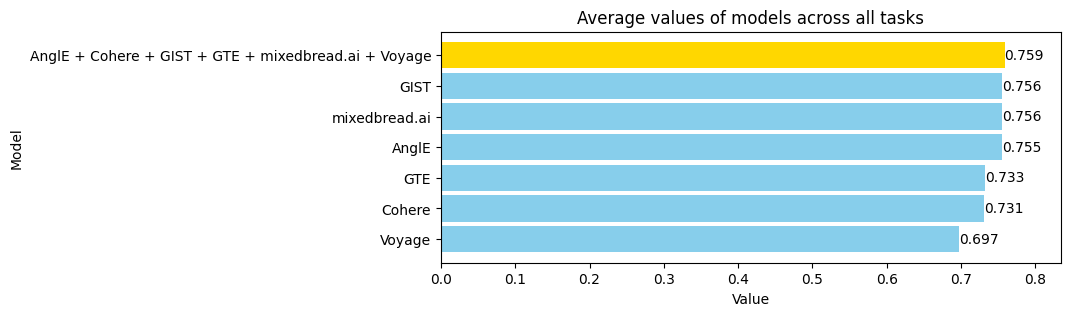

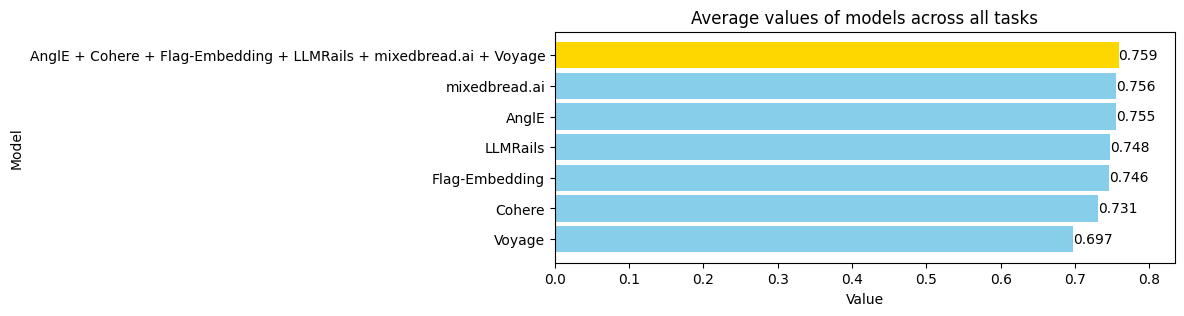

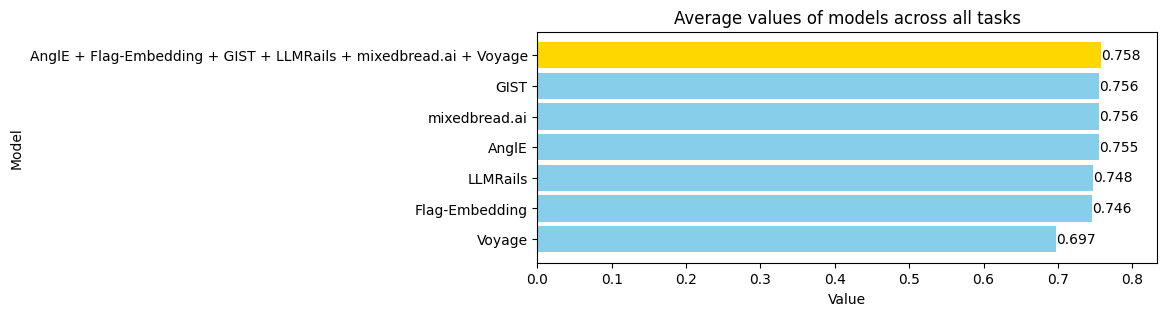

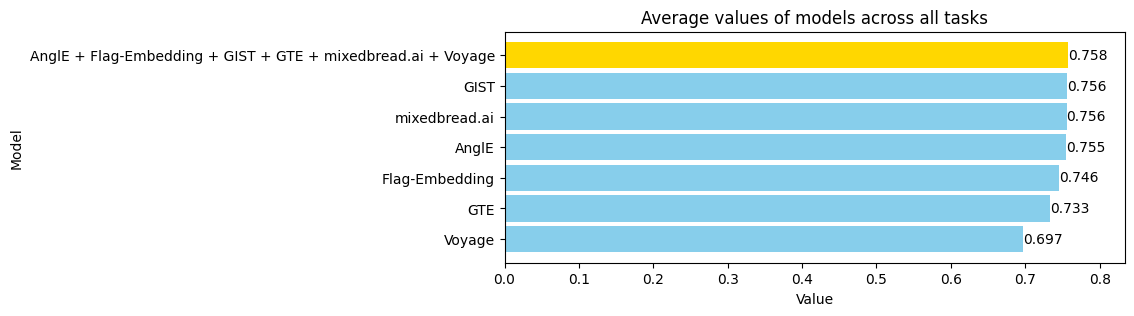

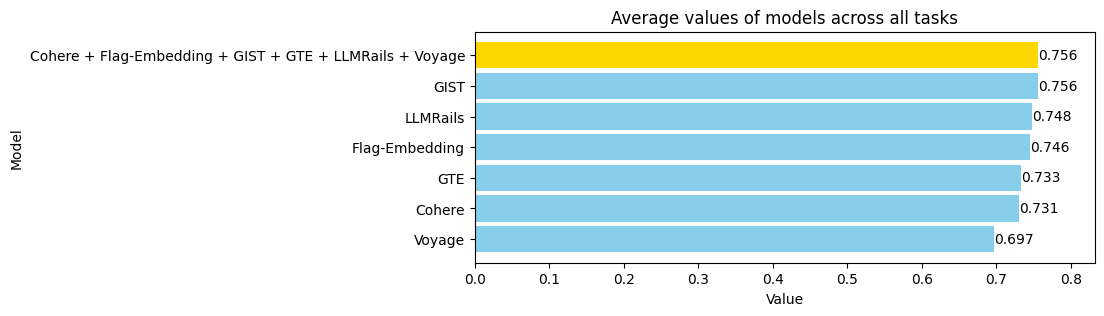

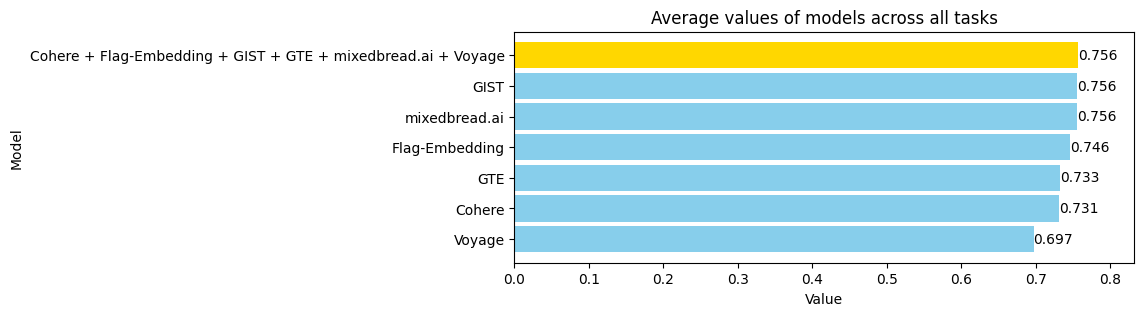

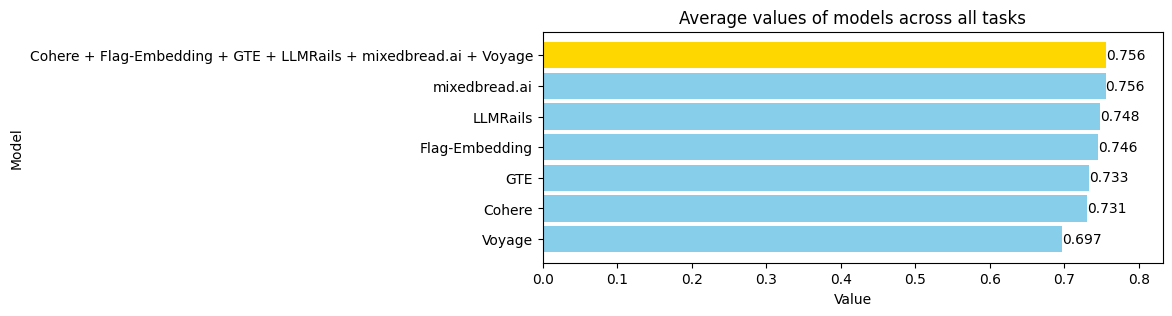

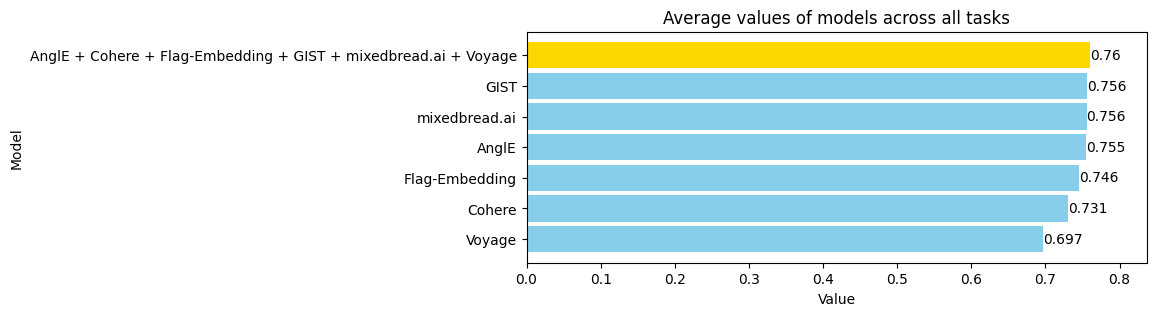

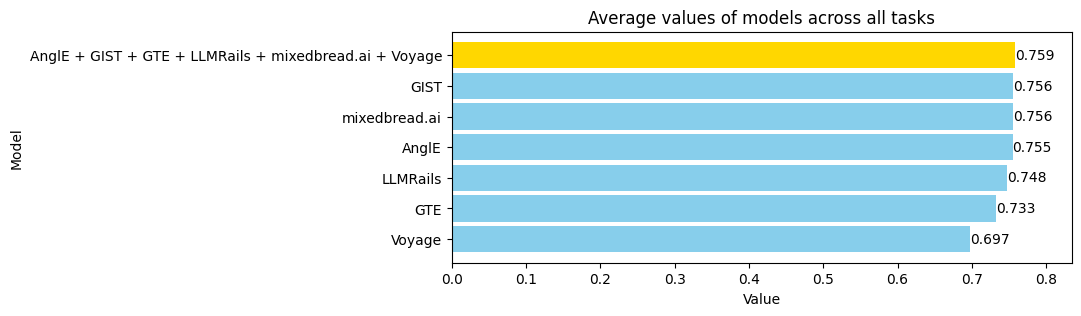

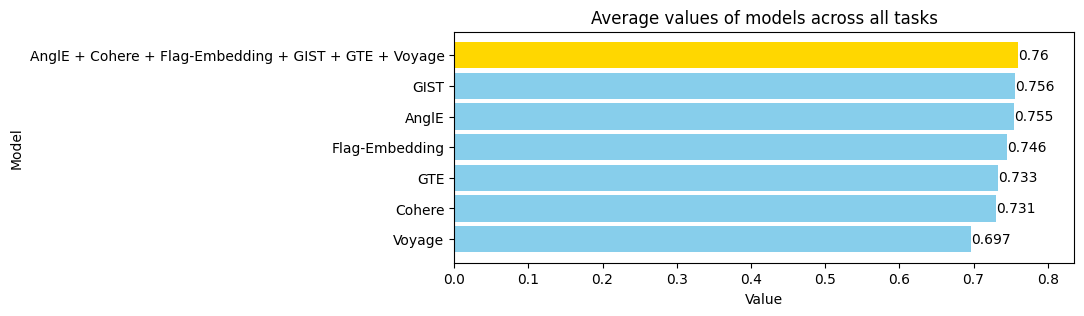

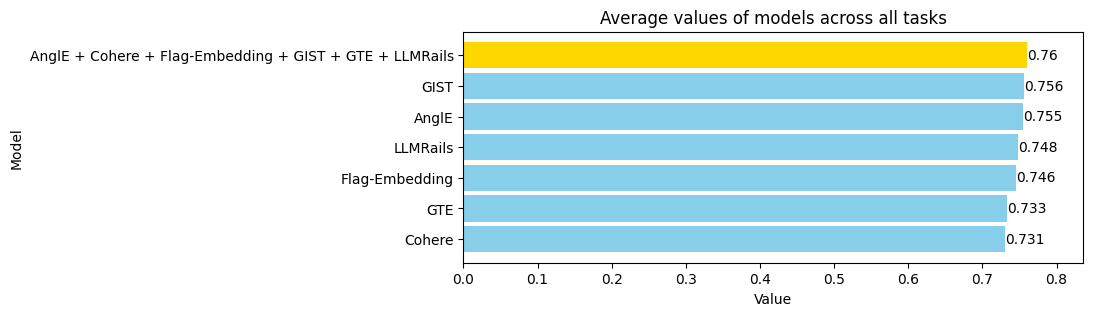

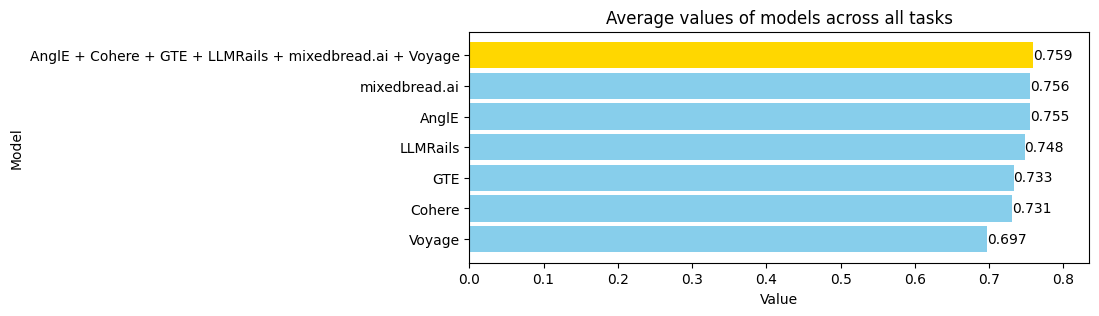

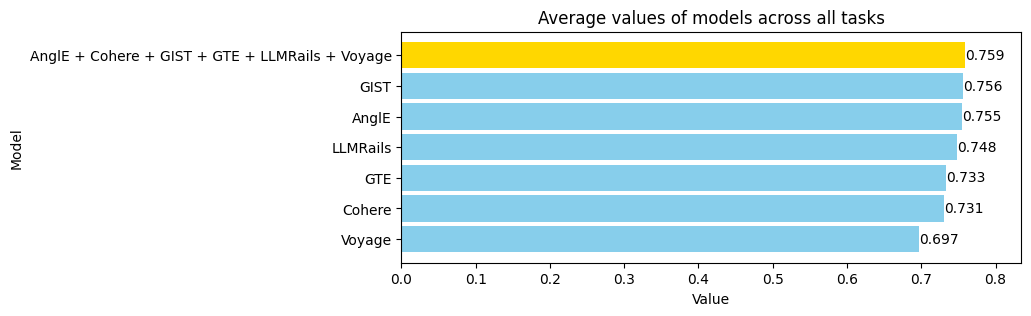

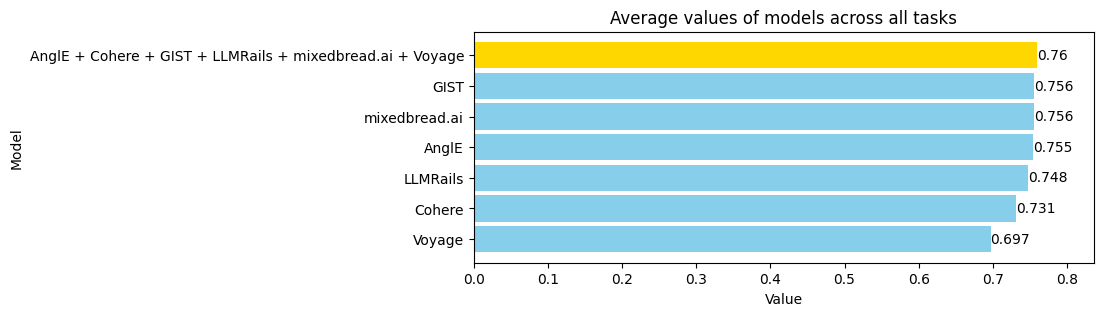

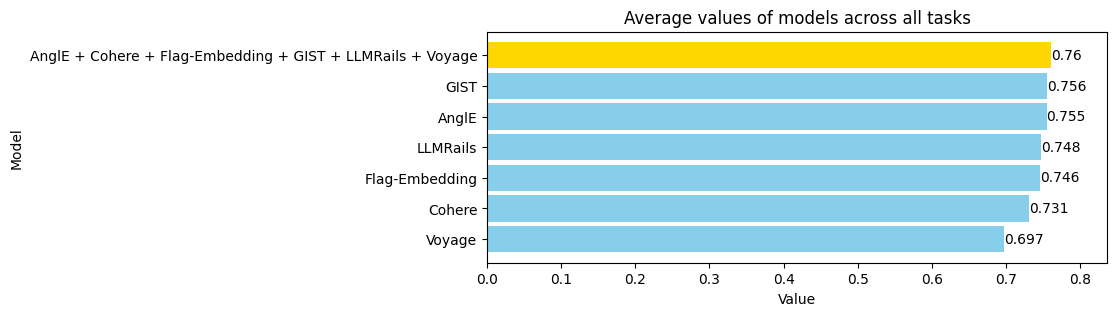

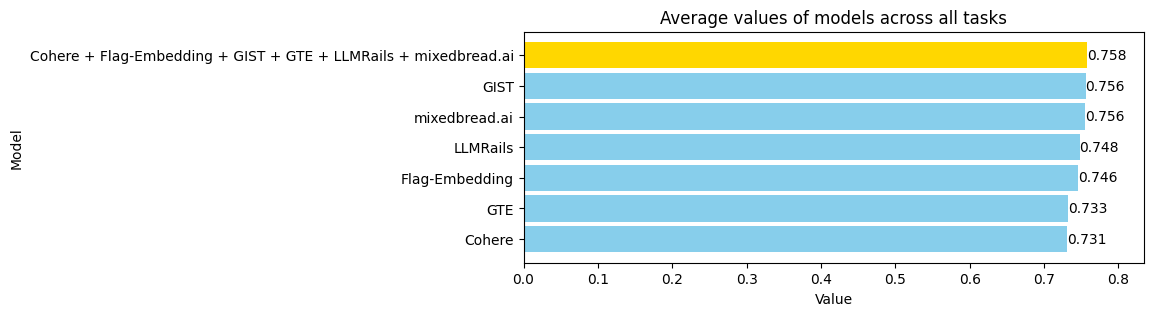

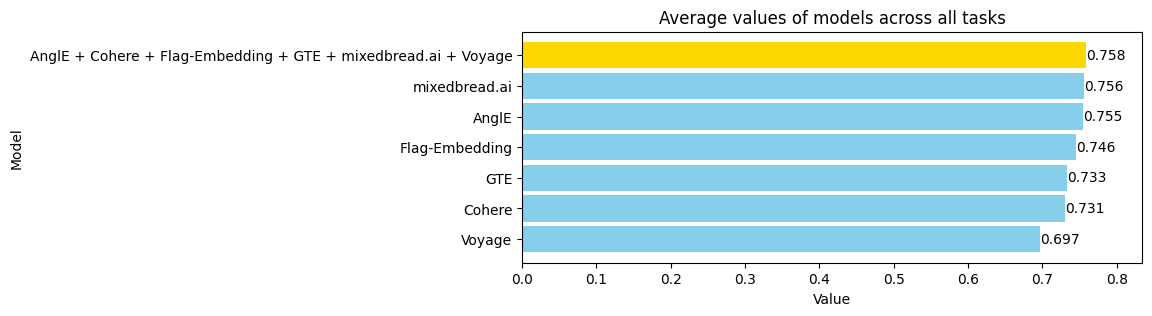

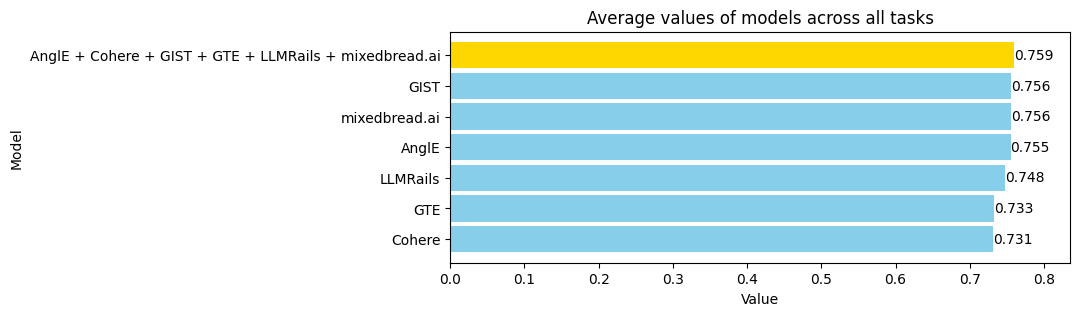

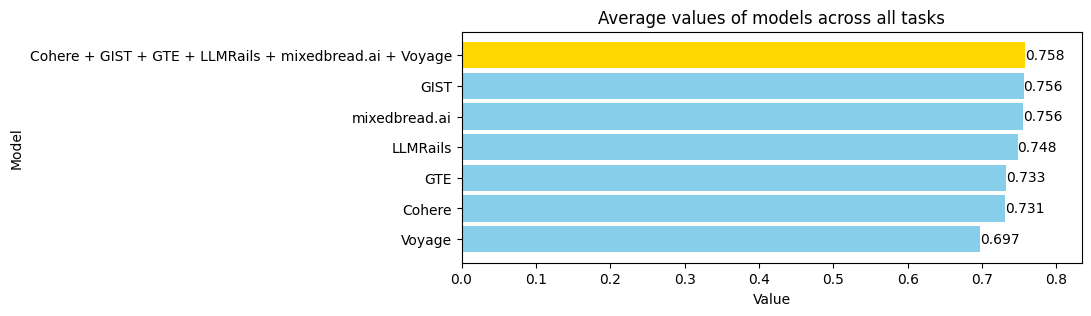

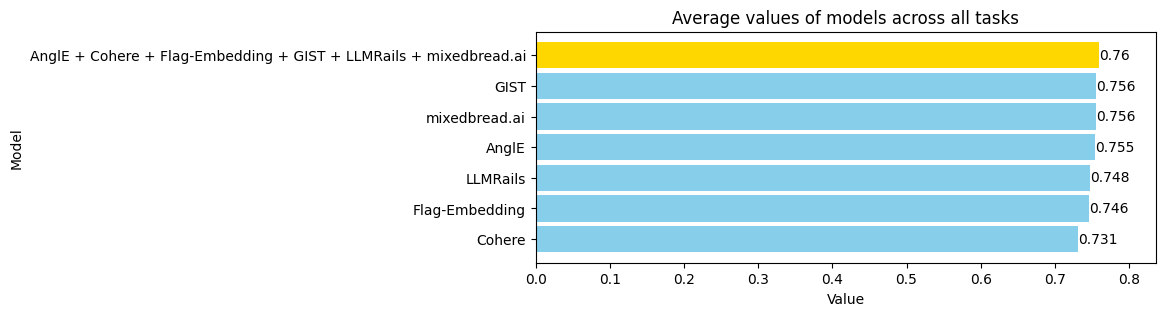

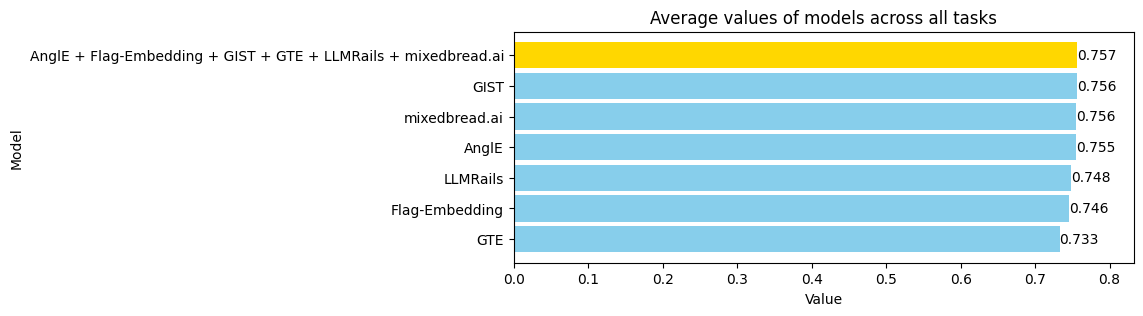

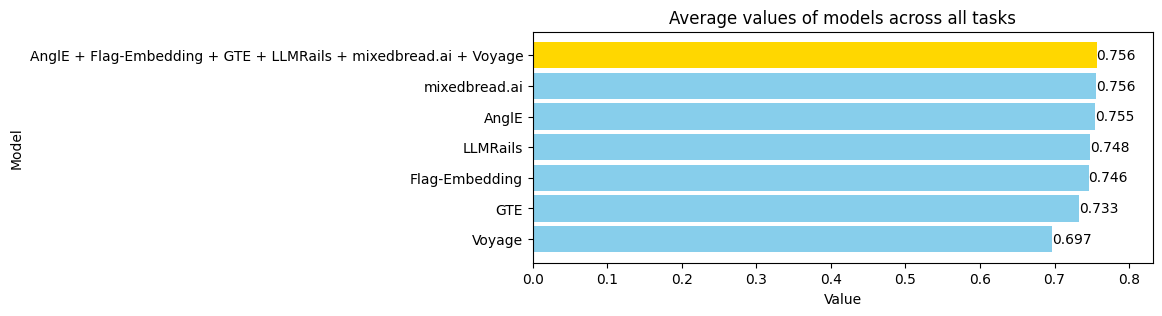

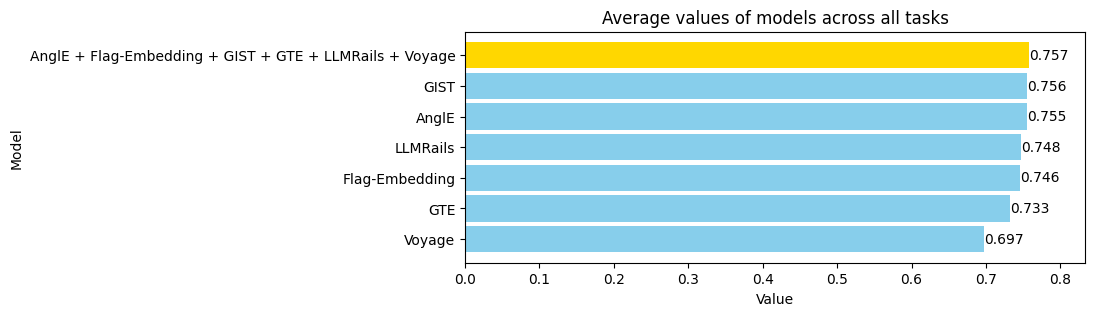

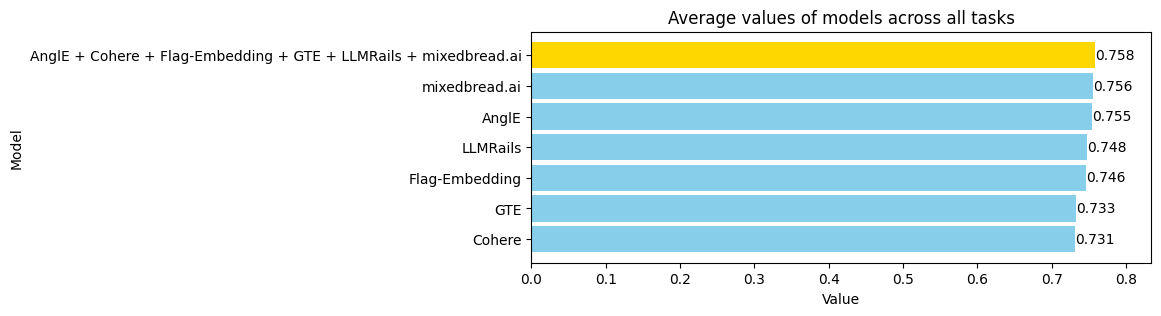

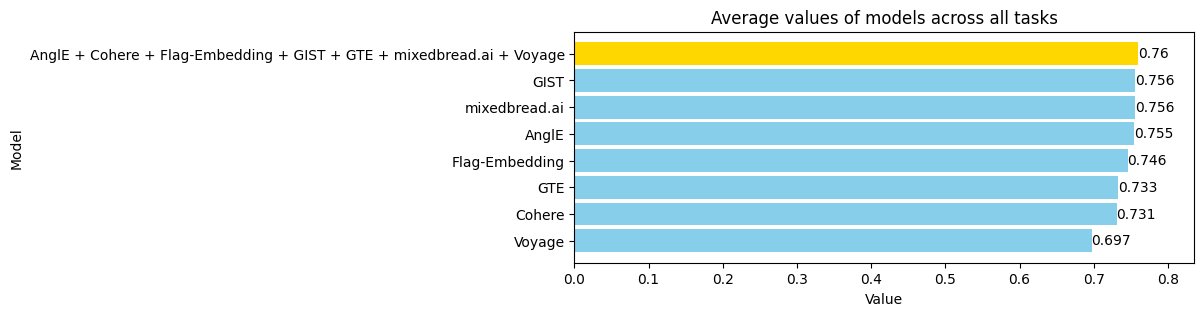

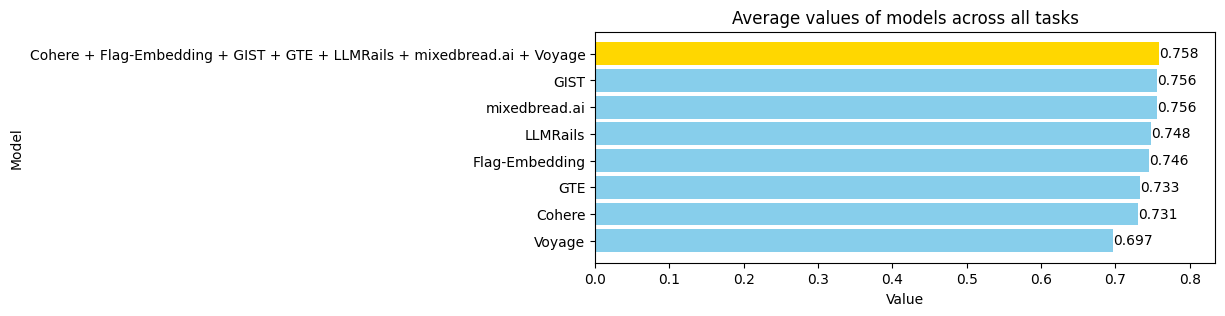

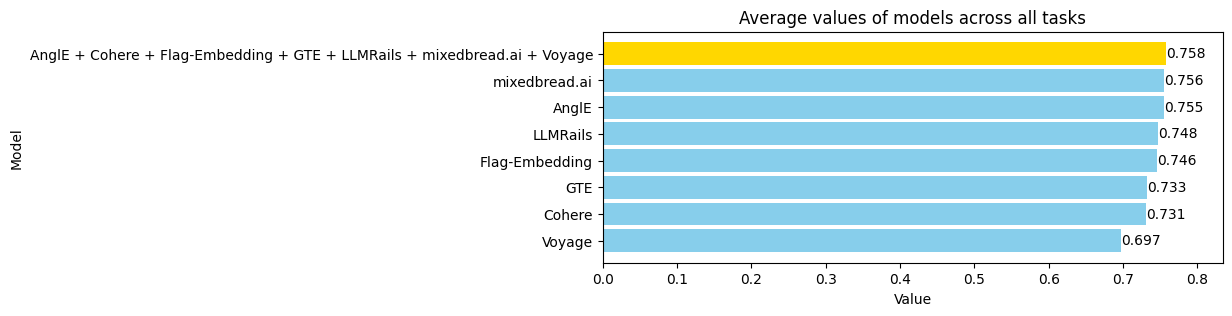

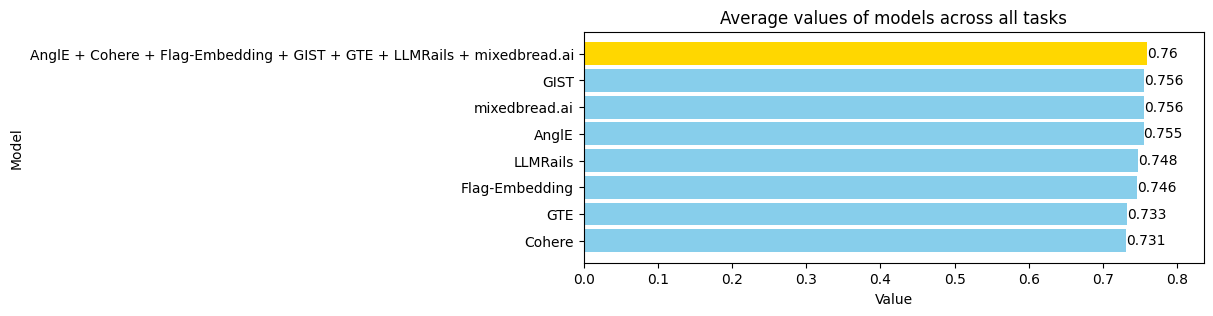

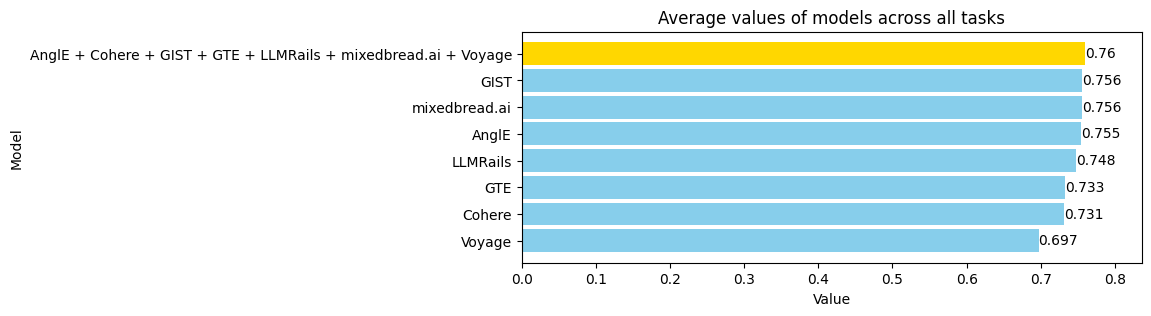

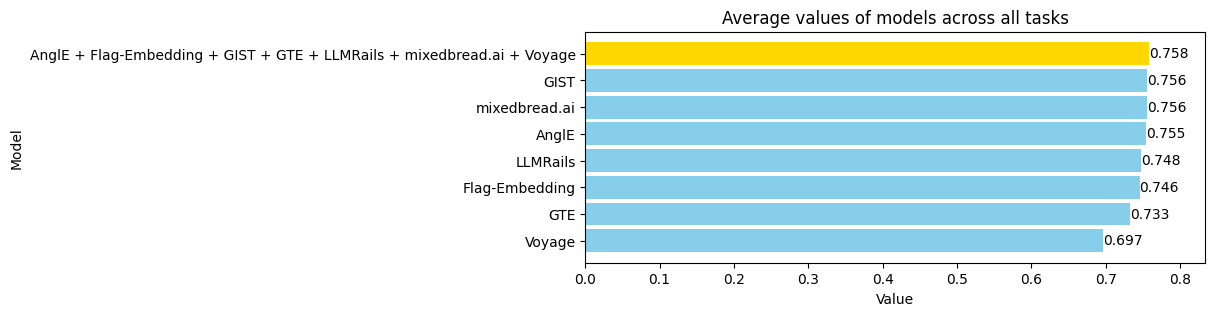

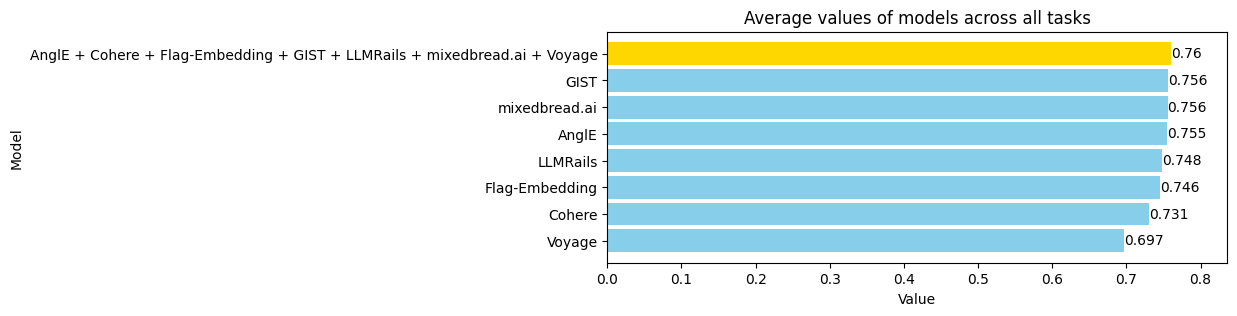

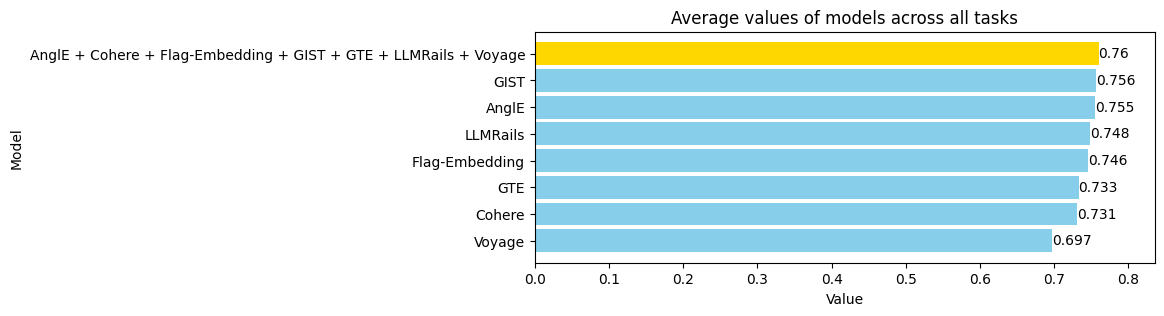

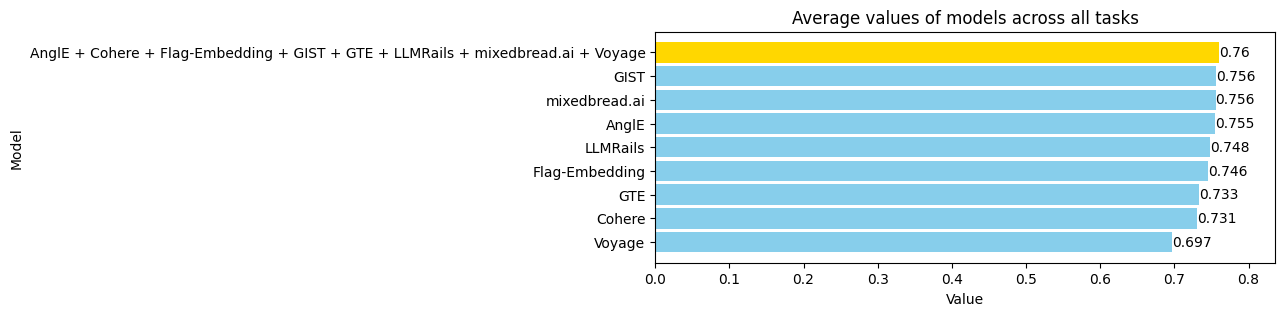

In [13]:
def plot_all_models(df):
    average_values = df.groupby(['model'])['value'].mean().reset_index()

    model_list = average_values['model'].tolist()
    value_list = average_values['value'].tolist()

    combined = sorted(zip(model_list, value_list), key=lambda x: x[1])
    model_list, value_list = zip(*combined)

    combined_model_list = []
    colours = []

    group_spacing = 0.05
    bar_height = 0.3
    y_pos = 0
    y_positions = []

    for model in model_list:
        # define color based on if it's concat model or not
        colours.append('gold' if '$' in model else 'skyblue')
        y_positions.append(y_pos)
        y_pos += (bar_height + group_spacing)

        # replace model code with full name
        # if '$' in model:
        #     lst = model.split('$')
        #     lst = [MODEL_LIST.get(l, l) for l in lst]
        #     combined_model_list.append(' + '.join(lst))
        # else:
        #     combined_model_list.append(MODEL_LIST.get(model, model))
        combined_model_list.append(get_model_name(model))

    plt.figure(figsize=(8, 3))
    bars = plt.barh(y_positions, value_list, color=colours, height=bar_height)
    plt.xlabel('Value')
    plt.ylabel('Model')
    plt.title(f'Average values of models across all tasks')
    plt.yticks(y_positions, combined_model_list)
    
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(), 3), va='center', ha='left')

    plt.xlim(0, max(value_list) * 1.1)
    plt.show()

    task_scores = list(zip(combined_model_list, value_list))

    return task_scores

"""The below code lets you plot all models on the same bar graph (not recommended as there are too many models)"""
# def plot_all_models(df_list):
#     scores = []
#     y_pos = 0
#     y_positions = []
#     all_model_names = []
#     all_values = []
#     all_colours = []

#     for df in df_list:
#         average_values = df.groupby(['model'])['value'].mean().reset_index()

#         model_list = average_values['model'].tolist()
#         value_list = average_values['value'].tolist()

#         combined = sorted(zip(model_list, value_list), key=lambda x: x[1])
#         model_list, value_list = zip(*combined)

#         combined_model_list = []
#         colours = []

#         group_spacing = 0.05
#         bar_height = 0.3

#         for model in model_list:
#             # define color based on if it's concat model or not
#             colours.append('gold' if '$' in model else 'skyblue')
#             y_positions.append(y_pos)
#             y_pos += (bar_height + group_spacing)

#             # replace model code with full name
#             if '$' in model:
#                 lst = model.split('$')
#                 lst = [MODEL_LIST.get(l, l) for l in lst]
#                 combined_model_list.append(' + '.join(lst))
#             else:
#                 combined_model_list.append(MODEL_LIST.get(model, model))
        
#         all_model_names.extend(combined_model_list)
#         all_values.extend(value_list)
#         all_colours.extend(colours)

#         task_scores = list(zip(combined_model_list, value_list))
#         y_pos += 0.5
#         scores.append(task_scores)
    
#     plt.figure(figsize=(10, 50))
#     bars = plt.barh(y_positions, all_values, color=all_colours, height=bar_height)
#     plt.xlabel('Value')
#     plt.ylabel('Model')
#     plt.title(f'Average values of models across all tasks')
#     plt.yticks(y_positions, all_model_names)
    
#     for bar in bars:
#         plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(), 3), va='center', ha='left')

#     plt.xlim(0, max(all_values) * 1.1)
#     plt.show()

#     return scores


scores = []
for dataframe in df_list:
    score = plot_all_models(dataframe)
    scores.append(score)

# scores = plot_all_models(df_list)

## Improvement of concatenated models

The cell below prints a table of the improvement of the score of the concatenated model from the average of the scores of the models it is made up by. Each score of the base model comes from the average of its scores on the MTEB tasks.

The table is ordered to show the concat-models with the best improvement at the top.

In [14]:
generate_table(scores, "Improvement over best base-model when concatenated (%)")

81.78137651821862% of concat-models performed better than their best base model
+------------------+----------------------------------------------------------------------------------+--------------------------------------------------------+
| Number of models |                                      Models                                      | Improvement over best base-model when concatenated (%) |
+------------------+----------------------------------------------------------------------------------+--------------------------------------------------------+
|        2         |                                   Cohere + GTE                                   |                   0.8227222222222164                   |
|        4         |                     Cohere + Flag-Embedding + GTE + LLMRails                     |                   0.7636666666666625                   |
|        4         |                   Cohere + Flag-Embedding + LLMRails + Voyage                    |            

## Scatter graph of improvement over best model against stack size

The spearman rank correlation coefficient is 0.30996830117063257
The spearman rank correlation coefficient between stack-size and average improvement per stack-size is 0.9642857142857145

The pearson correlation coefficient is 0.29179599190163985
The pearson correlation coefficient between stack-size and average improvement per stack-size is 0.9623354792940564


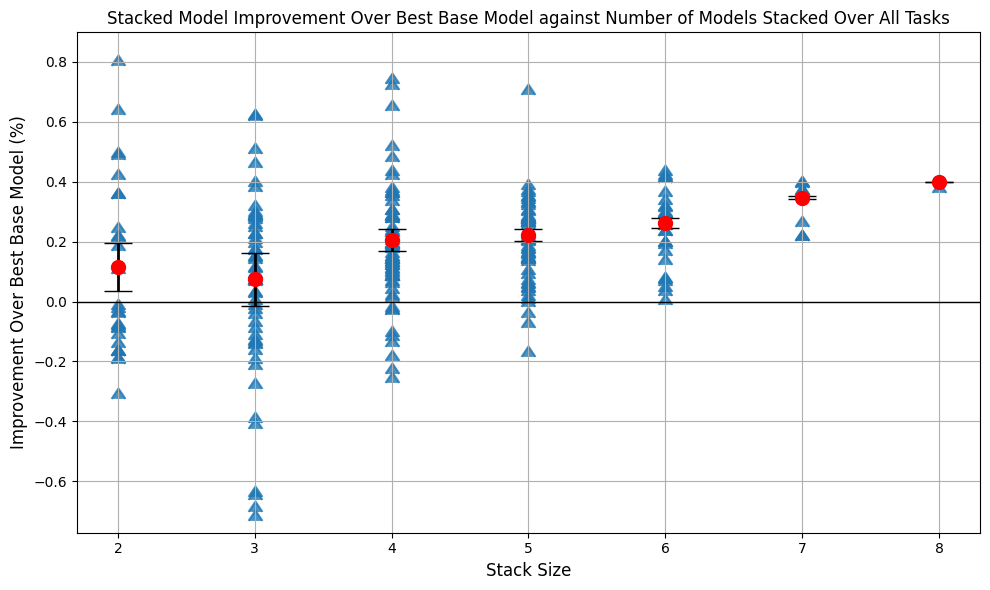

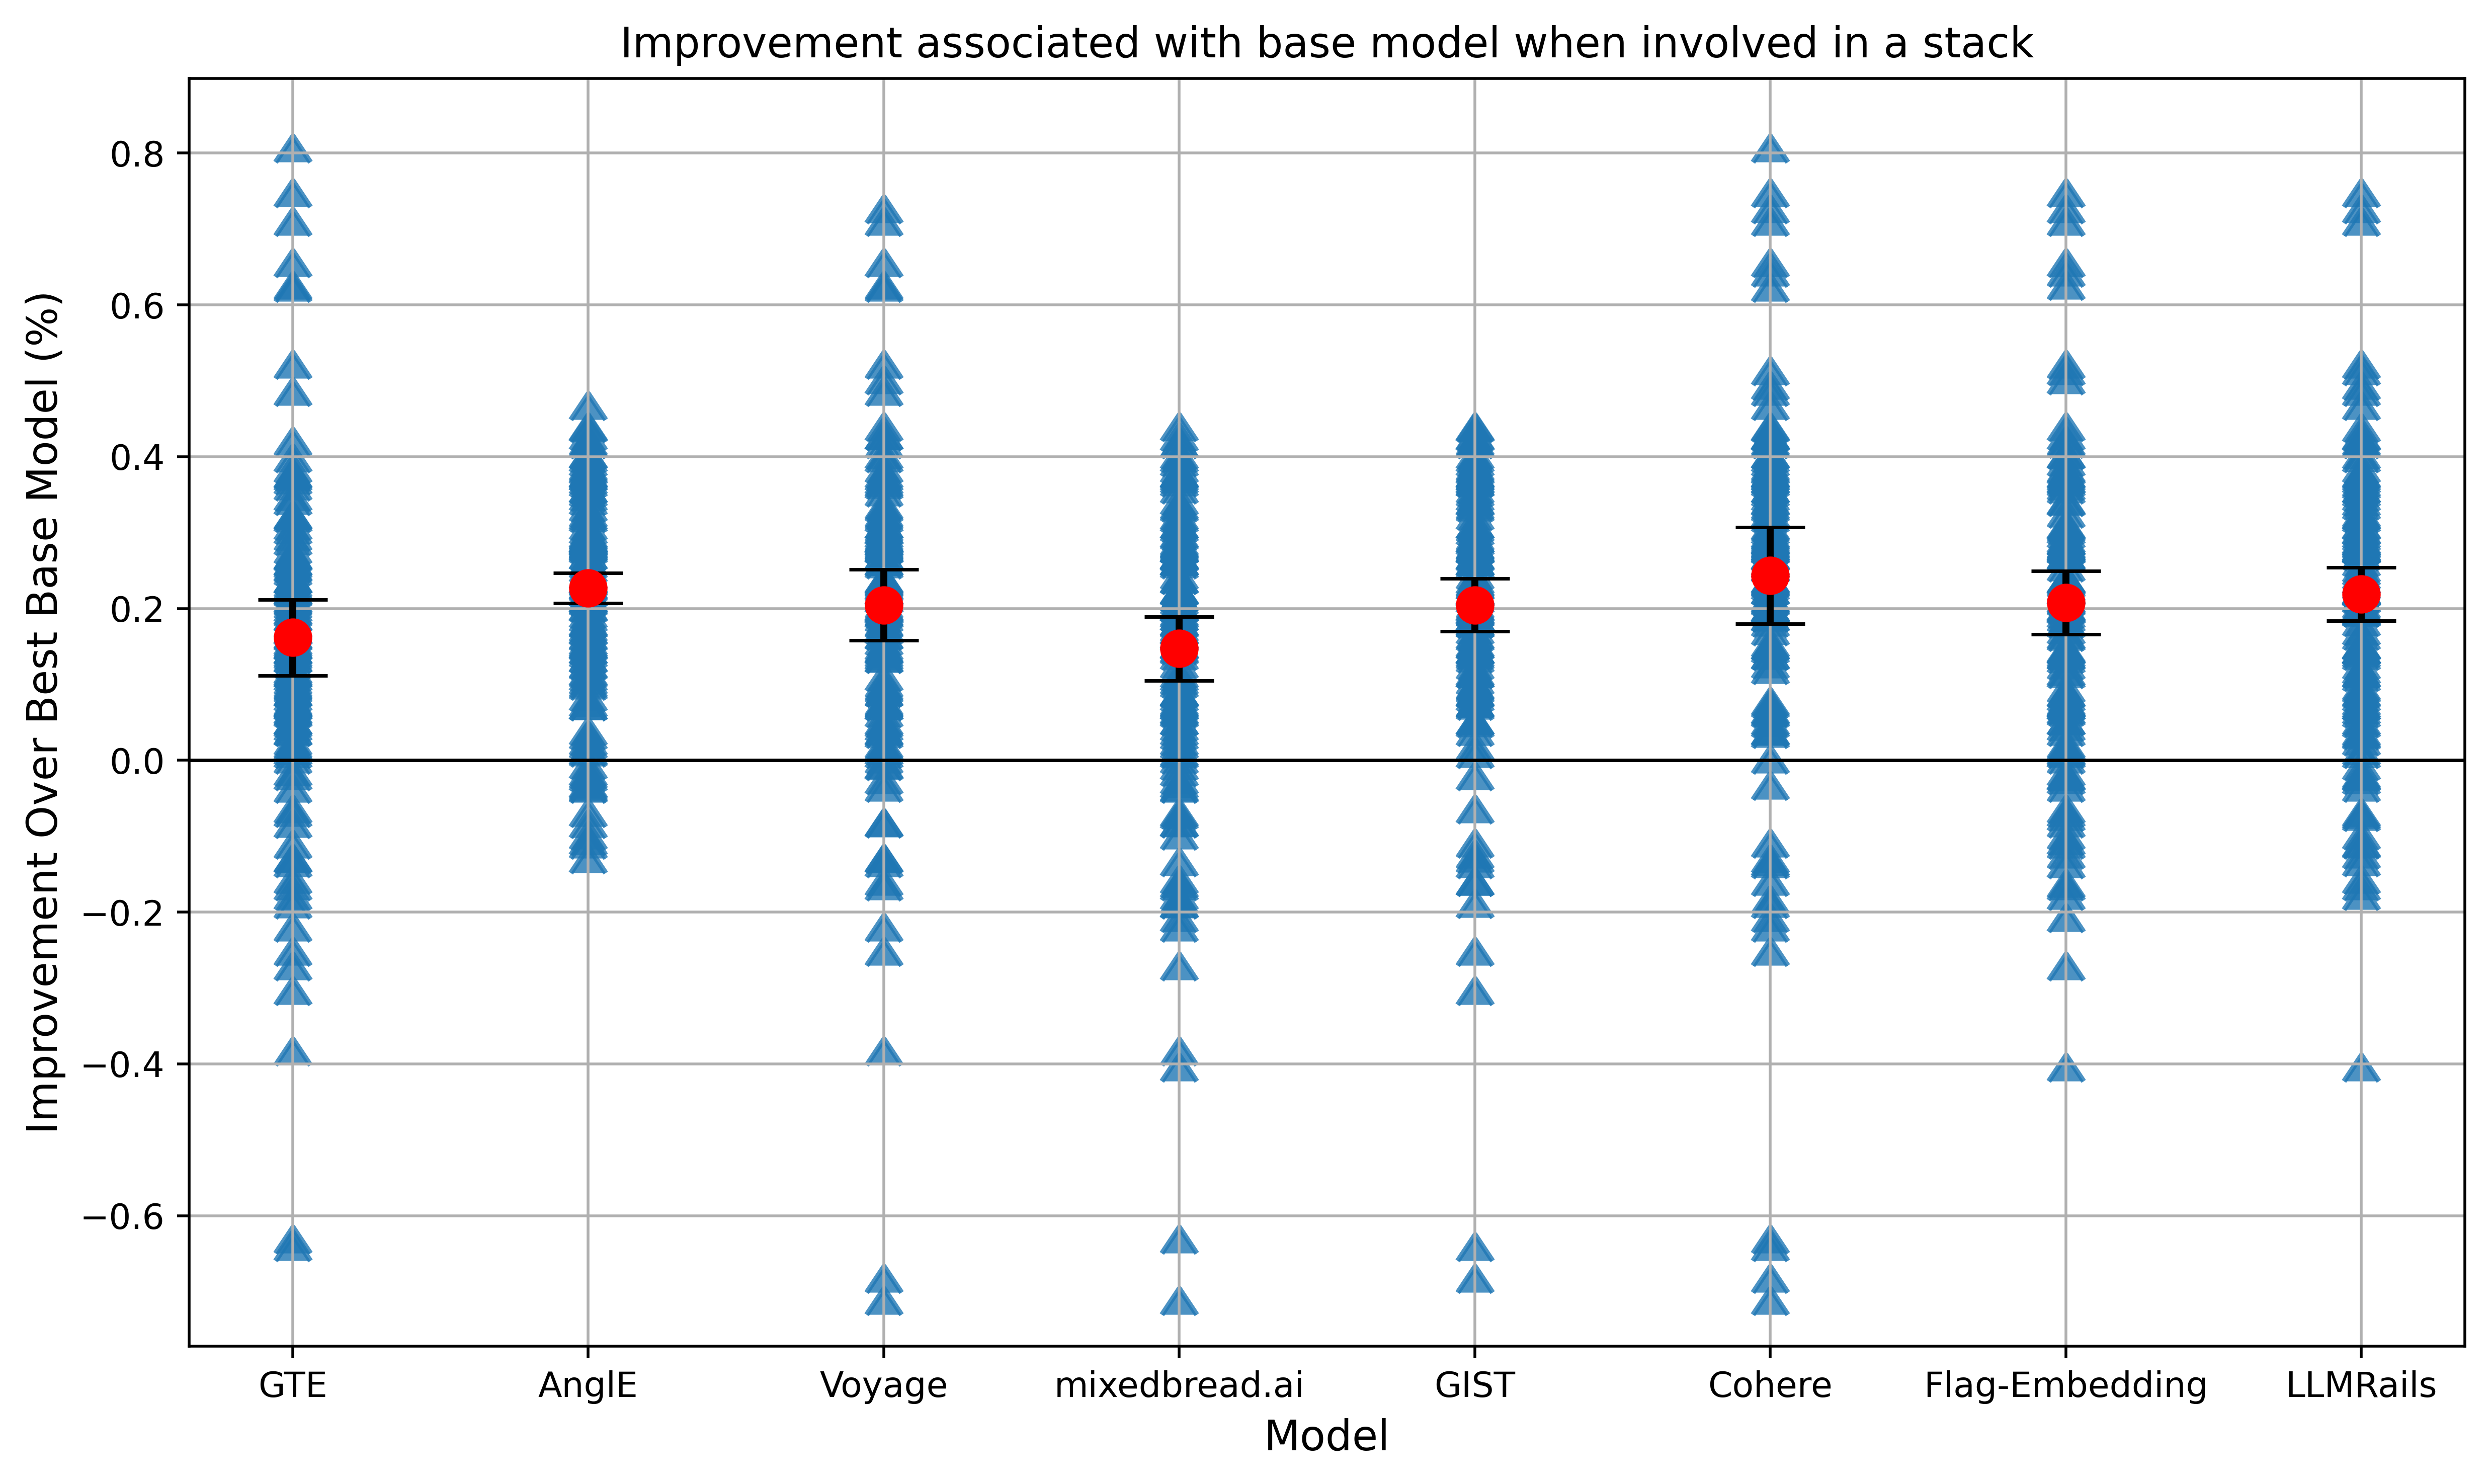

In [50]:

from collections import defaultdict
import scipy.stats as stats

x = []
y = []
averages = defaultdict(list)

model_x = []
improvement_for_model = []
model_averages = defaultdict(list)


for concat_model_list in scores:
    improvement = 0
    for model, score in concat_model_list:  
        if '+' in model:
            stack_size = model.count('+') + 1
            x.append(stack_size)
            best_base = max(filter(lambda a: a[0] != model, concat_model_list), key=lambda x: x[1])[1]
            improvement = (score - best_base) * 100
            y.append(improvement)

            averages[stack_size].append(improvement)
    for model, score in concat_model_list:  
        if '+' not in model:
            model_x.append(model)
            improvement_for_model.append(improvement)

            model_averages[model].append(improvement)


average_improvements = {size: np.mean(vals) for size, vals in averages.items()}
variance_improvements = {size: np.var(vals) for size, vals in averages.items()}


model_average_improvements = {model: np.mean(vals) for model, vals in model_averages.items()}
model_variance_improvements = {model: np.var(vals) for model, vals in model_averages.items()}

plt.figure(figsize=(10, 6))

plt.scatter(x, y, s=100, marker=6, alpha=0.8)
# edgecolors='w'

for size, avg in average_improvements.items():
    plt.errorbar(size, avg, yerr=variance_improvements[size], fmt='o', color='red', ecolor='black', elinewidth=2, capsize=10, markersize=10)


print(f"The spearman rank correlation coefficient is {stats.spearmanr(x, y)[0]}")
print(f"The spearman rank correlation coefficient between stack-size and average improvement per stack-size is {stats.spearmanr(list(average_improvements.keys()), list(average_improvements.values()))[0]}\n")

print(f"The pearson correlation coefficient is {stats.pearsonr(x, y)[0]}")
print(f"The pearson correlation coefficient between stack-size and average improvement per stack-size is {stats.pearsonr(list(average_improvements.keys()), list(average_improvements.values()))[0]}")

plt.title('Stacked Model Improvement Over Best Base Model against Number of Models Stacked Over All Tasks')
plt.xlabel("Stack Size", fontsize=12)
plt.ylabel('Improvement Over Best Base Model (%)', fontsize=12)

plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout() 
plt.show() 

plt.figure(figsize=(10, 6), dpi=500)

# plt.scatter(model_x, improvement_for_model, alpha=0.6, edgecolors='w', s=100)
plt.scatter(model_x, improvement_for_model, s=100, marker=6, alpha=0.8)

for size, avg in model_average_improvements.items():
    # plt.errorbar(size, avg, yerr=model_variance_improvements[size], fmt='o', color='red', ecolor='black', elinewidth=2, capsize=5)
    plt.errorbar(size, avg, yerr=model_variance_improvements[size], fmt='o', color='red', ecolor='black', elinewidth=2, capsize=10, markersize=10)
    

plt.title('Improvement associated with base model when involved in a stack')
plt.xlabel("Model", fontsize=12)
plt.ylabel('Improvement Over Best Base Model (%)', fontsize=12)

plt.grid(True)
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout() 

plt.show() 


## Internal MTEB leaderboard

The cell below prints a table of scores per task for each base-model and concat-model. The table is in order of highest to lowest average scores for all the MTEB tasks.

In [116]:
from prettytable import PrettyTable


def generate_table_all(df):
    task_list = sorted(df['task'].unique().tolist())
    table = PrettyTable(["Model name", "Dimension", 'Average value'] + task_list)
    models = {}
    for _, row in df.iterrows():
        model = row['model']
        task = row['task']
        value = row['value']

        if model not in models:
            models[model] = {}
        
        if task not in models[model]:
            models[model][task] = [1, value]
        else:
            models[model][task][0] += 1
            models[model][task][1] += value

    for model, task_dict in models.items():
        model_name = model
        if '$' in model:
            lst = model.split('$')
            lst = [MODEL_LIST.get(l, l) for l in lst]
            model_name = ' + '.join(lst)
            
        row = [model_name, (model.count('$')+1)*1024]
        sorted_vals = sorted(task_dict.items(), key=lambda x: x[0])

        sums = 0
        count = 0
        for task, val in sorted_vals:
            sums += val[1]
            count += val[0]

        average = sums/count

        i = 0
        vals = []
        for task_name, val in sorted_vals:
            count, value = val
            if task_name != task_list[i]:
                vals.append(0)
                i+= 1
            i += 1
            vals.append(value/count)

        vals = [np.round(val,3) for val in vals]
        table.add_row(row + [np.round(average, 5)] + vals)

    table.reversesort = True
    table.sortby = 'Average value'

    return table

table = generate_table_all(df)
print(table)

+----------------------------------------------------------------------------------+-----------+---------------+----------------+------------+--------------------+-----------+-----------+-------+
|                                    Model name                                    | Dimension | Average value | Classification | Clustering | PairClassification | Reranking | Retrieval |  STS  |
+----------------------------------------------------------------------------------+-----------+---------------+----------------+------------+--------------------+-----------+-----------+-------+
|         AnglE + Cohere + Flag-Embedding + GIST + mixedbread.ai + Voyage          |    6144   |    0.76034    |     0.726      |   0.524    |       0.788        |   0.647   |   0.704   | 0.846 |
|                         AnglE + Cohere + GIST + LLMRails                         |    4096   |    0.76033    |     0.732      |   0.524    |        0.79        |   0.646   |   0.699   | 0.845 |
|            AnglE +

## Performance of similar vs dissimilar embeddings when concatenated

In [90]:
"""Generate a list of lists where each sub list contains a concat-model and its base models"""
def generate_model_groups_names(df):
    all__models = df['model'].unique().tolist()
    concat_models = []
    for model in all__models:
        if '$' in model:
            concat_models.append(model)

    model_group_lists = []
    for model in concat_models:
        lst = model.split('$')
        lst.append(model)
        model_group_lists.append(lst)

    return model_group_lists

"""Get the average cosine similarity between two models for all datapoints in a particular task"""
def get_cosine_similarity_for_task(model_name1, model_name2, task_name):

    # get average cosine similarity between two models for all datapoints in all tasks
    embeddings1: datasets.Dataset = datasets.load_from_disk(f"data/{model_name1}/{task_name}")
    embeddings2: datasets.Dataset = datasets.load_from_disk(f"data/{model_name2}/{task_name}")

    ds = datasets.concatenate_datasets([embeddings1, embeddings2], axis=1)
    df = ds.to_pandas()
    df.columns = [model_name1, model_name2]
    
    avg_similarity = 0
    count = 0
    for _, row in df.iterrows():
        count += 1
        embedding1 = row[model_name1]
        embedding2 = row[model_name2]
        similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
        avg_similarity += similarity

    return avg_similarity/count

"""Get the average cosine similarity between two models for all datapoints over all tasks"""
def get_cosine_similarity(model_name1, model_name2):
    # iterate through every task
    dfs = []
    for task in TASK_LIST:
        # get average cosine similarity between two models for all datapoints in all tasks
        embeddings1: datasets.Dataset = datasets.load_from_disk(f"data/{model_name1}/{task}")
        embeddings2: datasets.Dataset = datasets.load_from_disk(f"data/{model_name2}/{task}")

        ds = datasets.concatenate_datasets([embeddings1, embeddings2], axis=1)
        df = ds.to_pandas()
        df.columns = [model_name1, model_name2]
        dfs.append(df)
    
    df_combined = pd.concat(dfs)
    
    avg_similarity = 0
    count = 0
    for _, row in df_combined.iterrows():
        count += 1
        embedding1 = row[model_name1]
        embedding2 = row[model_name2]
        similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
        avg_similarity += similarity

    return avg_similarity/count

"""Get the average performance/value for each model and return it as a dictionary"""
def get_average_values(df):
    concat_model_average_value = {}
    average_values = df.groupby(['model'])['value'].mean().reset_index()

    model_list = average_values['model'].tolist()
    value_list = average_values['value'].tolist()

    for model, value in zip(model_list, value_list):
        concat_model_average_value[model] = value
    
    return concat_model_average_value

def get_average_values_for_task(df):
    concat_model_average_value = {}
    average_values_all_tasks = df.groupby(['model', 'task'])['value'].mean().reset_index()['task'==task]
    average_values = average_values_all_tasks[average_values_all_tasks['task'] == 'STS']

    model_list = average_values['model'].tolist()
    value_list = average_values['value'].tolist()

    for model, value in zip(model_list, value_list):
        concat_model_average_value[model] = value
    
    return concat_model_average_value

model_group_lists = generate_model_groups_names(df)

embedding_pair_cosine_similarity = {}
for task in TASK_LIST:
    concat_model_average_value_task = get_average_values_for_task(df, task)
    all_similarities = []
    average_value = []

    for group in model_group_lists:
        concat_model = ""
        new_group = []
        for model in group:
            if '$' in model:
                concat_model = model
            else:
                new_group.append(model)

        all_pairs = list(itertools.combinations(new_group, 2))
        average_cosine_similarity = 0

        for pair in all_pairs:
            pair = tuple(sorted(pair))
            pair_similarity = 0

            if pair in embedding_pair_cosine_similarity:
                if task in embedding_pair_cosine_similarity[pair]:
                    pair_similarity = embedding_pair_cosine_similarity[pair][task]
                else:
                    pair_similarity = get_cosine_similarity_for_task(pair[0], pair[1], task)
                    embedding_pair_cosine_similarity[pair][task] = pair_similarity
            else:
                pair_similarity = get_cosine_similarity_for_task(pair[0], pair[1], task)
                embedding_pair_cosine_similarity[pair] = {task: pair_similarity}
            
            average_cosine_similarity += pair_similarity
        
        average_cosine_similarity /= len(all_pairs)
        all_similarities.append(average_cosine_similarity)
        average_value.append(concat_model_average_value_task[concat_model])

    plt.plot(all_similarities, average_value)
    plt.xlabel(f'Average cosine similarity of base model pairs in concat-model for task {task}') 
    plt.ylabel('Average performance of concat-model')

In [ ]:
all_similarities = []
average_value = []
embedding_pair_cosine_similarity = {}

model_group_lists = generate_model_groups_names(df)
concat_model_average_value = get_average_values(df)

for group in model_group_lists:
    concat_model = ""
    new_group = []
    for model in group:
        if '$' in model:
            concat_model = model
        else:
            new_group.append(model)

    all_pairs = list(itertools.combinations(new_group, 2))
    average_cosine_similarity = 0

    for pair in all_pairs:
        pair = tuple(sorted(pair))
        pair_similarity = 0

        if pair in embedding_pair_cosine_similarity:
            pair_similarity = embedding_pair_cosine_similarity[pair]
        else:
            pair_similarity = get_cosine_similarity(pair[0], pair[1])
            embedding_pair_cosine_similarity[pair] = pair_similarity
        
        average_cosine_similarity += pair_similarity
    
    average_cosine_similarity /= len(all_pairs)
    all_similarities.append(average_cosine_similarity)
    average_value.append(concat_model_average_value[concat_model])

plt.plot(all_similarities, average_value)
plt.xlabel(f'Average cosine similarity of base model pairs in a concat-model over all tasks') 
plt.ylabel('Average performance of concat-model')

## Visualise PCA results

### Make PCA dataframes

In [10]:
# directory = 'results'

# # Get all the .csv file paths in the directory
# file_paths = glob.glob(directory + '/*.csv')

# dataframes = [pd.read_csv(file_path) for file_path in file_paths]
# df_pca = pd.concat(dataframes, ignore_index=True)
# df_pca.dropna(subset=['value'], inplace=True)

In [51]:
# get all the directories in the pca results directory
directories = [f"results_pca/{name}" for name in os.listdir("results_pca") if (f"results_pca/{name}")]
dimension_df_dict = {}

# for each directory, get all the .csv files in the directory and concatenate them into one dataframe
# then drop all rows with NaN values in the 'value' column
# then add the dataframe to the dictionary with the dimension as the key
for directory in directories:
    file_paths = glob.glob(directory + '/*.csv')
    print(directory)
    dataframes = [pd.read_csv(file_path) for file_path in file_paths]
    df_pca = pd.concat(dataframes, ignore_index=True)
    df_pca.dropna(subset=['value'], inplace=True)
    
    # add a column to the dataframe that shows the number of models in the concat-model
    df_pca['stack_size'] = df_pca['model'].apply(lambda x: x.count('$') + 1)
    # remove the basic huggingface model
    df_pca = df_pca[df_pca['model'] != 'basic_huggingface']
    # round the value column to 5 decimal places
    df_pca['value'] = df_pca['value'].apply(lambda x: round(x, 5))

    dimension = int(re.findall(r'\d+', directory)[0])
    dimension_df_dict[dimension] = df_pca

# we are left with a dictionary of dimension: dataframe pairs.


results_pca/256
results_pca/768
results_pca/896
results_pca/1024
results_pca/512


In [52]:
# the following dictionary is a nested dictionary with the following structure:
# model_dim_task_dataset_dict = {
#     model1: {
#         dim1: {
#             task1: {
#                 dataset1: value,
#                 dataset2: value,
#                 ...
#             },
#             task2: {
#                 dataset1: value,
#                 dataset2: value,
#                 ...
#             },
#             ...
#         },
#         ...
#     },
#     ...
# }

model_dim_task_dataset_dict = {}

# list of all models and tasks
list_of_models = dimension_df_dict[1024]['model'].unique()
list_of_dimensions = sorted(list(dimension_df_dict.keys()))

# initialise the dictionary
model_dim_task_dataset_dict = {model: {dim: None for dim in list_of_dimensions} for model in list_of_models}

# for each model we've done pca on, and gotten the results for
for model in list_of_models:
    # for each dimension that we've reduced the model to
    for dim in list_of_dimensions:
        # get the current dataframe from the previous dict
        curr_df = dimension_df_dict[dim][dimension_df_dict[dim]['model']==model]
        # we get the list of tasks that were tested for that dimension
        list_of_tasks = curr_df['task'].unique()
        task_dict = {}
        # for each task that was tested
        for t in list_of_tasks:
            # get the list of datasets that were tested for that task            
            datasets_list = curr_df[curr_df['task'] == t]['dataset'].unique()
            # initialise a dictionary for the dataset: value pairs and add it to task dictionary
            # print(model, dim)
            task_dict[t] = {dataset: curr_df.loc[(curr_df['model']==model) & (curr_df['dataset']==dataset)]['value'].iloc[0] for dataset in datasets_list}
        
        # add the task dictionary to the model-dimension dictionary
        model_dim_task_dataset_dict[model][dim] = task_dict.copy()

        # if model == 'angle':
        #     print(dim)
        #     print(task_dict)

### Helper functions

In [53]:
"""
    Function to get the average task value given model, dimension and task
"""
def get_average_model_value_for_task(model, dim, task):
    # get the dictionary of datasets and values for the given model, dimension and task
    task_dict = model_dim_task_dataset_dict[model][dim][task]

    # get the values from the dictionary, summing and dividing by the number of values to get the average
    dataset_values = list(task_dict.values())
    return sum(dataset_values)/len(dataset_values)

"""
    Function to get the average value over all tasks given model, dimension
"""
def get_average_model_value(model, dim):
    # get the dictionary of datasets and values for the given model, dimension and task
    dim_dict = model_dim_task_dataset_dict[model][dim]
    all_vals = []
    for task in dim_dict:
        task_dict = dim_dict[task]
        curr_task_dataset_values = list(task_dict.values())
        all_vals += curr_task_dataset_values

    # get the values from the dictionary, summing and dividing by the number of values to get the average
    return sum(all_vals)/len(all_vals)

"""
    Function to return the best base model and value given a concat-model and dimension and a task
"""
def get_best_base_model_for_task(concat_model, dim, task):
    # split the concat-model into its base models
    base_models = concat_model.split('$')
    best_base_model = ""
    best_value = 0

    # iterate through all the base models
    for model in base_models:
        # get the average value for the base model for the task
        value = get_average_model_value_for_task(model, dim, task)
        # if the value is better than the current best value, update the best value and best base model
        if value > best_value:
            best_value = value
            best_base_model = model
        
    return best_base_model, best_value

"""
    Function to return the best base model and value over all tasks given a concat-model and dimension
"""
def get_best_base_model(concat_model, dim):
    # split the concat-model into its base models
    base_models = concat_model.split('$')
    best_base_model = ""
    best_value = 0

    # iterate through all the base models
    for model in base_models:
        # get the average value for the base model for all tasks
        value = get_average_model_value(model, dim)
        # if the value is better than the current best value, update the best value and best base model
        if value > best_value:
            best_value = value
            best_base_model = model

    return best_base_model, best_value

"""
    Function to return the original performance of a model given a model name over all tasks
"""
def get_original_model_performance(model):
    return df.loc[df['model']==model]['value'].mean()

"""
    Function to return the original performance of a model given a model name for a given task
"""
def get_original_model_performance_for_task(model, task):
    return df.loc[(df['model']==model) & (df['task']==task)]['value'].mean()

"""
    Function to return the best base model and value over all tasks given a concat-model
"""
def get_best_original_base_model(concat_model):
    base_models = concat_model.split('$')
    best_base_model = ""
    best_value = 0

    for model in base_models:
        # get the average value for the base model over all tasks
        value = get_original_model_performance(model)
        if value > best_value:
            best_value = value
            best_base_model = model

    return best_base_model, best_value


"""
    Function to return the best base model and value over all tasks given a concat-model and dimension
"""
def get_best_original_base_model_for_task(concat_model, task):
    base_models = concat_model.split('$')
    best_base_model = ""
    best_value = 0

    for model in base_models:
        # get the average value for the base model for a given task
        value = get_original_model_performance_for_task(model, task)
        if value > best_value:
            best_value = value
            best_base_model = model
    
    return best_base_model, best_value



### Plot a graph of the performance of a concat model against dimensions for every task

In [128]:
# for every task
for task in TASK_LIST:
    # for every model, plot a graph of the performance of the models against the dimension the model was reduced to
    for model in list_of_models:
        if '$' not in model:
            continue

        x = list_of_dimensions
        y = []
        y_base = []
        dont_plot = False
        # for every dimension
        for dim in list_of_dimensions:
            # get the dictionary of tasks and datasets for the given model and dimension
            dim_dict = model_dim_task_dataset_dict[model][dim]
            # if the task is not in the dictionary, don't plot the graph
            if task not in dim_dict:
                dont_plot = True
                break
                
            value = get_average_model_value_for_task(model, dim, task)
            y.append(value)

            _, best_base_value = get_best_base_model_for_task(model, dim, task)
            y_base.append(best_base_value)
        
        if dont_plot:
            continue
            
        plt.plot(x, y, label=model)
        plt.plot(x, y, label="Best base model")
        max_x = max(list_of_dimensions)
        min_x = min(list_of_dimensions)
        original_best_base_model_performance = get_best_original_base_model(model, task)[1]
        original_concat_model_performance = get_original_model_performance_for_task(model, task)
        plt.hlines(original_best_base_model_performance, xmin=min_x, xmax=max_x, linestyles='dashed', label='Performance of best base-model before PCA', colors='red')
        plt.hlines(original_concat_model_performance, xmin=min_x, xmax=max_x, linestyles='dashed', label='Performance of concat-model before PCA', colors='green')
        plt.title(f"Performance of models plotted against dimension for task: {task}")
        plt.xlabel("Dimensions")
        plt.ylabel("Performance")
        plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
        plt.show()


### Plot a graph of the performance of a concat model against dimensions over all tasks

In [ ]:
import textwrap
def wrap_labels(label, wrap_width):
    return textwrap.fill(label, wrap_width)

# for every model, plot a graph of the performance of the models against the dimension the model was reduced to
for model in list_of_models:
    # print("Test1")
    if '$' not in model:
        continue
    
    list_of_dimensions.sort()
    x = list_of_dimensions
    y = []
    y_base = []
    dont_plot = False
    # for every dimension
    for dim in list_of_dimensions:
        # get the dictionary of tasks and datasets for the given model and dimension
        dim_dict = model_dim_task_dataset_dict[model][dim]
        
        value = get_average_model_value(model, dim)
        y.append(value)

        _, best_base_value = get_best_base_model(model, dim)
        y_base.append(best_base_value)
    
    # print("Test1")
    if dont_plot:
        continue
    
    wrapped_label = wrap_labels(get_model_name(model), 30)

    # plt.plot(x, y, label=get_model_name(model))
    plt.plot(x, y, label=wrapped_label)
    plt.plot(x, y_base, label="Best base model")
    max_x = max(list_of_dimensions)
    min_x = min(list_of_dimensions)
    original_best_base_model_performance = get_best_original_base_model(model)[1]
    original_concat_model_performance = get_original_model_performance(model)

    plt.hlines(original_best_base_model_performance, xmin=min_x, xmax=max_x, linestyles='dashed', label='Best base-model before PCA', colors='red')
    plt.hlines(original_concat_model_performance, xmin=min_x, xmax=max_x, linestyles='dashed', label='Concat-model before PCA', colors='green')
    plt.title(f"Average performance of models over all tasks plotted against dimension")
    plt.xlabel("Dimensions")
    plt.ylabel("Performance")
    # plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.xticks(x, x)
    plt.legend(loc='lower right')
    plt.show()

### Plot a graph of performance against dimensions for all concat models

In [ ]:
# for every model, plot a graph of the performance of the models against the dimension the model was reduced to
for model in list_of_models:
    # print("Test1")
    if '$' not in model:
        continue
    
    list_of_dimensions.sort()
    x = list_of_dimensions
    y = []
    y_base = []
    dont_plot = False
    # for every dimension
    for dim in list_of_dimensions:
        # get the dictionary of tasks and datasets for the given model and dimension
        dim_dict = model_dim_task_dataset_dict[model][dim]
        
        value = get_average_model_value(model, dim)
        y.append(value)

        _, best_base_value = get_best_base_model(model, dim)
        y_base.append(best_base_value)
    
    # print("Test1")
    if dont_plot:
        continue
        
    plt.plot(x, y, label=get_model_name(model))
    max_x = max(list_of_dimensions)
    min_x = min(list_of_dimensions)
    original_best_base_model_performance = get_best_original_base_model(model)[1]
    original_concat_model_performance = get_original_model_performance(model)
    plt.title(f"Average performance of models over all tasks plotted against dimension")
    plt.xlabel("Dimensions")
    plt.ylabel("Performance")
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.show()

### Plot a graph of performance against dimensions for all stack sizes (average over all tasks)

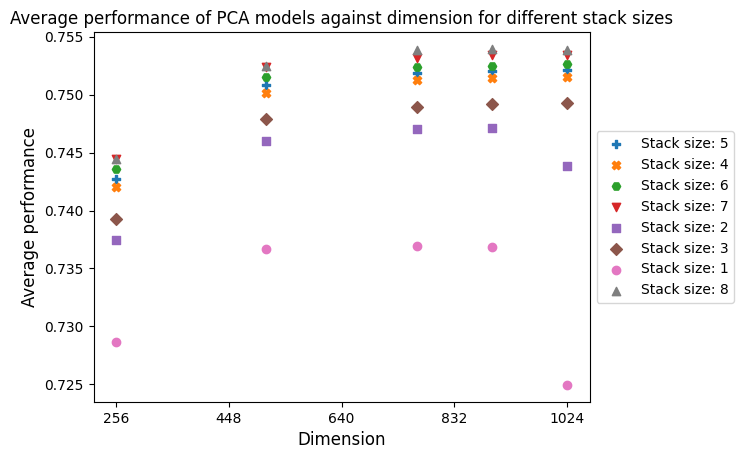

In [138]:
# the following dictionary is a nested dictionary with the following structure:
# model_dim_task_dataset_dict = {
#     stack_size: {
#         dim1: [ performance_sum, count ]
#         ...
#     },
#     ...
# }

dimension_x_y_dict = {}

for model_name, dim_dict in model_dim_task_dataset_dict.items():
    stack_size = model_name.count('$') + 1
    if stack_size not in dimension_x_y_dict:
        dimension_x_y_dict[stack_size] = {}

    for dim in dim_dict.keys():
        val = get_average_model_value(model_name, dim)
        if dim not in dimension_x_y_dict[stack_size]:
            dimension_x_y_dict[stack_size][dim] = [val, 1]
        else:
            dimension_x_y_dict[stack_size][dim][0] += val
            dimension_x_y_dict[stack_size][dim][1] += 1
    
    
for stack_size, dim_dict in dimension_x_y_dict.items():
    for dim, val in dim_dict.items():
        dim_dict[dim] = val[0]/val[1]

stack_size_marker = {
    1: 'o',
    2: 's',
    3: 'D',
    4: 'X',
    5: 'P',
    6: 'H',
    7: 'v',
    8: '^',
}

for stack_size, dim_dict in dimension_x_y_dict.items():
    x = list(dim_dict.keys())
    y = list(dim_dict.values())
    plt.scatter(x, y, label=f"Stack size: {stack_size}", marker=stack_size_marker[stack_size])
    plt.xticks(x, x)



plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Average performance", fontsize=12)
plt.title("Average performance of PCA models against dimension for different stack sizes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Plot a graph of improvement against dimensions for all stack sizes (average over all tasks)

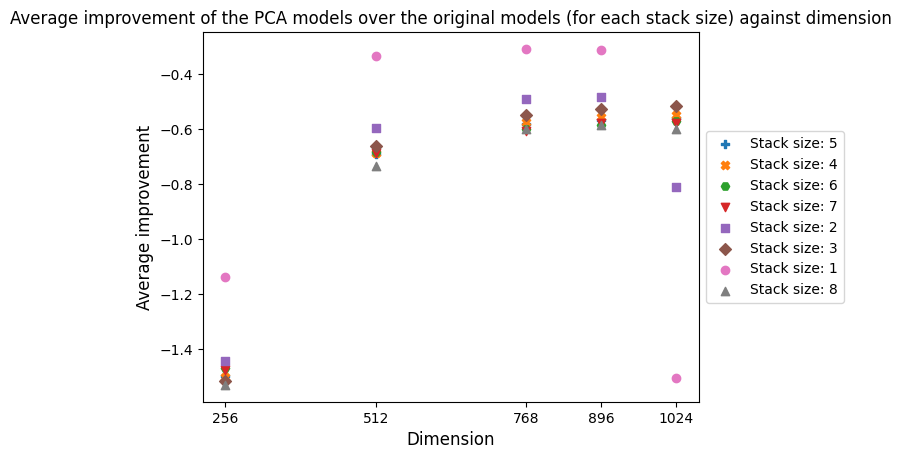

In [84]:
stack_size_value_dict = df.groupby(['stack_size'])['value'].mean().reset_index().to_dict()
stack_size_avg_performance_dict = {v: stack_size_value_dict['value'][k] for k, v in stack_size_value_dict['stack_size'].items()}

for stack_size, dim_dict in dimension_x_y_dict.items():
    for dim, val in dim_dict.items():
        dim_dict[dim] = (val - stack_size_avg_performance_dict[stack_size]) * 100

for stack_size, dim_dict in dimension_x_y_dict.items():
    x = list(dim_dict.keys())
    y = list(dim_dict.values())
    plt.scatter(x, y, label=f"Stack size: {stack_size}", marker=stack_size_marker[stack_size])
    plt.xticks(x, x)

plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Average improvement", fontsize=12)
plt.title("Average improvement of the PCA models over the original models (for each stack size) against dimension")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Does PCA work for anything

In [112]:
# the following dictionary is a nested dictionary with the following structure:
# model_dim_task_dataset_dict = {
#     model1: {
#         dim1: {
#             task1: {
#                 dataset1: value,
#                 dataset2: value,
#                 ...
#             },
#             task2: {
#                 dataset1: value,
#                 dataset2: value,
#                 ...
#             },
#             ...
#         },
#         ...
#     },
#     ...
# }
i = 0
j = 0
task_spread = {t: {i+1: [0, 0] for i in range(8)} for t in list(df_pca['task'].unique())}
# task_spread = {t for t in list(df_pca['task'].unique())}

for mdel in model_dim_task_dataset_dict.keys():
    stack_size = mdel.count('$') + 1
    for dim in model_dim_task_dataset_dict[mdel].keys():
        for task in model_dim_task_dataset_dict[mdel][dim].keys():
            pca_mdel = get_average_model_value_for_task(mdel, dim, task)
            before_pca_mdel = get_original_model_performance_for_task(mdel, task)

            if pca_mdel > before_pca_mdel:
                # print(f"Model {mdel} performs better after PCA than before PCA for task {task} and dimension {dim}")
                j += 1
                task_spread[task][stack_size][0] += 1
                # task_spread[task][0] += 1
            
            task_spread[task][stack_size][1] += 1
                
            i += 1

print(f"{j/i * 100}% of the models perform better after PCA than before PCA when comparing performance per task.\n")
print("Spread of models that perform better after PCA than before PCA for each task:")
# for task, vals in task_spread.items():
#     print(f"{task}: {np.round(vals[0]/vals[1] * 100, 3)}%")

for task, vals in task_spread.items():
    print(f"{task}:")
    for stack_size, vals in vals.items():
        print(f"Stack size {stack_size}: {np.round(vals[0]/vals[1] * 100, 3)}%")
    print("\n")

22.851536952256378% of the models perform better after PCA than before PCA when comparing performance per task.

Spread of models that perform better after PCA than before PCA for each task:
Classification:
Stack size 1: 32.5%
Stack size 2: 2.143%
Stack size 3: 0.357%
Stack size 4: 0.0%
Stack size 5: 0.0%
Stack size 6: 0.0%
Stack size 7: 0.0%
Stack size 8: 0.0%


Clustering:
Stack size 1: 20.0%
Stack size 2: 18.571%
Stack size 3: 15.0%
Stack size 4: 13.714%
Stack size 5: 12.5%
Stack size 6: 5.714%
Stack size 7: 5.0%
Stack size 8: 0.0%


PairClassification:
Stack size 1: 30.769%
Stack size 2: 33.571%
Stack size 3: 27.143%
Stack size 4: 32.571%
Stack size 5: 18.571%
Stack size 6: 14.286%
Stack size 7: 5.0%
Stack size 8: 0.0%


Reranking:
Stack size 1: 92.308%
Stack size 2: 91.429%
Stack size 3: 94.286%
Stack size 4: 91.429%
Stack size 5: 96.071%
Stack size 6: 90.0%
Stack size 7: 87.5%
Stack size 8: 80.0%


Retrieval:
Stack size 1: 38.462%
Stack size 2: 12.143%
Stack size 3: 6.071%
Stack 

In [135]:
average_values = df.groupby(['task', 'model'])['value'].mean().reset_index()
highest_values = average_values.loc[average_values.groupby('task')['value'].idxmax()]



In [137]:
pd.set_option('display.max_colwidth', None)
highest_values

task  \
162       Classification   
426           Clustering   
668   PairClassification   
1019           Reranking   
1276           Retrieval   
1288                 STS   

                                                                                model  \
162                                                                       cohere$gist   
426                                                      cohere$gist$gte-large$voyage   
668                                        cohere$flag-embedding$llmrails$mixed-bread   
1019                                                      llmrails$mixed-bread$voyage   
1276                                                                  llmrails$voyage   
1288  angle$cohere$flag-embedding$gist$gte-large$llmrails$mixed-bread$voyage-transfer   

         value  
162   0.737470  
426   0.530665  
668   0.795030  
1019  0.653550  
1276  0.712895  
1288  0.859459

In [124]:
average_values_pca = df_pca.groupby(['task', 'model'])['value'].mean().reset_index()
highest_values_pca = average_values_pca.loc[average_values_pca.groupby('task')['value'].idxmax()]

In [125]:
highest_values_pca

task                                          model  \
161       Classification                                    cohere$gist   
487           Clustering                          gist$gte-large$voyage   
667   PairClassification          cohere$flag-embedding$llmrails$voyage   
984            Reranking     flag-embedding$llmrails$mixed-bread$voyage   
1115           Retrieval        angle$flag-embedding$mixed-bread$voyage   
1320                 STS  angle$cohere$gist$llmrails$mixed-bread$voyage   

         value  
161   0.733883  
487   0.522805  
667   0.794650  
984   0.656750  
1115  0.702460  
1320  0.837264

In [134]:
df[df['model'].str.contains('transfer')]

model                task  \
10229  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10264  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10202  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10216  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10207  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10206  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10205  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10204  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10203  angle$cohere$flag-embedding$gist$gte-large$llm...                 STS   
10150  angle$cohere$flag-embedding$gist$gte-large$llm...      Classification   
10160  angle$cohere$flag-embedding$gist$gte-large$llm...      Classification   
10169  angle$cohere$flag-embedding$gist$gte-large$llm...          Clustering   
10180  angle$cohere$flag-embedding$gist$gte-large$llm...  PairClassification   
10182  angle$cohere$flag-embedding$gist$gte-large$llm...           Reranking   
10186  angle$cohere$flag-embedding$gist$gte-large$llm...           Retrieval   
10198  angle$cohere$flag-embedding$gist$gte-large$llm...           Retrieval   
10159  angle$cohere$flag-embedding$gist$gte-large$llm...      Classification   
10174  angle$cohere$flag-embedding$gist$gte-large$llm...          Clustering   

                                  dataset language           metric    value  \
10229                               STS22       en  cosine_spearman  0.68686   
10264                        STSBenchmark       en  cosine_spearman  0.89960   
10202                              SICK-R       en  cosine_spearman  0.82835   
10216                               STS17    en-en  cosine_spearman  0.91617   
10207                               STS16       en  cosine_spearman  0.87432   
10206                               STS15       en  cosine_spearman  0.92291   
10205                               STS14       en  cosine_spearman  0.88411   
10204                               STS13       en  cosine_spearman  0.90867   
10203                               STS12       en  cosine_spearman  0.81414   
10150  AmazonCounterfactualClassification       en         accuracy  0.72254   
10160               EmotionClassification       en         accuracy  0.55815   
10169                  ArxivClusteringS2S       en        v_measure  0.42843   
10180                  TwitterSemEval2015       en               ap  0.78951   
10182               AskUbuntuDupQuestions       en              map  0.64883   
10186                             ArguAna       en       ndcg_at_10  0.62844   
10198                             SciFact       en       ndcg_at_10  0.74345   
10159             Banking77Classification       en         accuracy  0.83292   
10174                    RedditClustering       en        v_measure  0.58788   

       stack_size  
10229           8  
10264           8  
10202           8  
10216           8  
10207           8  
10206           8  
10205           8  
10204           8  
10203           8  
10150           8  
10160           8  
10169           8  
10180           8  
10182           8  
10186           8  
10198           8  
10159           8  
10174           8